## Supervised Learning
## Project: Song Popularity Estimator

In this Project, data will be collected directly from Spotify, a digital music streaming service, and utilize supervised learning models to predict song popularity. Spotify provides access to song data for developers. Data includes song popularity, artist popularity, and audio analysis such as loudness, tempo, key, mode, pitch, timbre, and so fourth. As we will be using python, 'spotipy', provided by Spotify will be utilized. We will implement various supervised models and choose best candidate that estimates song popularity. Our goal is to get and provide estimated popularity of a new song. 

____
## Single Data Exploration

First of all, lets get one of the songs information and explore the data. We will be utilizing spotipy to collect all the data. Song popularity, artist popularity, artist follower and audio analysis data such as loudness, tempo, key, mode, confidence, pitch and timbre will be explored. 

In order to access to the data provided by Spotify, we will use client credential for authorization and get access token. Run the code to get access token.

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import display
import numpy as np
# Using Client Credentials for authorization
client_credentials_manager = SpotifyClientCredentials(client_id="f2d11bfce2cf4bae8e096454ca4299ed",client_secret="0192b251aff04567a49d33d83287a254")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
# get access token for spotify
token = client_credentials_manager.get_access_token()

As we have gotten access token, we need to get necessary information regarding the track and artist. Track information includes unnecessary information such as available markets, external urls, and image of the track. We will only need track popularity, track name, track uri, artist name, artist popularity and artist followers.

In [324]:
# get basic artist information and song information
tracks = ["7BKLCZ1jbUBVqRi2FVlTVw"]
track_info = sp.tracks(tracks)
track_info1 = track_info['tracks'][0]
artist_uri = (track_info1['artists'][0]['uri'])
artist_name = (track_info1['artists'][0]['name'])
song_name = (track_info1['name'])
song_popularity = (track_info1['popularity'])
artist = sp.artist(artist_uri)
artist_popularity = artist['popularity']
artist_followers =(artist['followers']['total'])

Furthermore, run the below code to get audio analysis data

In [325]:
# get audio analysis data for the track
audio_analysis = sp.audio_analysis(track)
audio_section_data = audio_analysis['sections']
audio_segment_data = audio_analysis['segments']

retrying ...1secs
retrying ...2secs


Now, as we have gotten all the necessary data, lets take a look at all the data.

First, lets see artist and song information.

In [326]:
print("Song Information")
song_info = {"song_name":song_name,"song_uri":track,"song_popularity":song_popularity}
display(song_info)
print()
print("Artist Information")
artist_info = {"artist_name":artist_name,"artist_uri":artist_uri,"artist_popularity":artist_popularity\
              ,"artist_followers":artist_followers}
display(artist_info)

Song Information


{'song_name': 'Closer',
 'song_uri': '7BKLCZ1jbUBVqRi2FVlTVw',
 'song_popularity': 86}


Artist Information


{'artist_name': 'The Chainsmokers',
 'artist_uri': 'spotify:artist:69GGBxA162lTqCwzJG5jLp',
 'artist_popularity': 88,
 'artist_followers': 11203752}

Next, lets see audio analysis data. We will be using sectional data and segmental data from audio analysis. Run the code below the check the data obtained.

In [18]:
display(audio_analysis['sections'][0])

{'start': 0.0,
 'duration': 10.64051,
 'confidence': 1.0,
 'loudness': -20.173,
 'tempo': 95.149,
 'tempo_confidence': 0.411,
 'key': 8,
 'key_confidence': 0.321,
 'mode': 1,
 'mode_confidence': 0.673,
 'time_signature': 4,
 'time_signature_confidence': 1.0}

In [19]:
display(audio_analysis['segments'][0])

{'start': 0.0,
 'duration': 0.17914,
 'confidence': 0.0,
 'loudness_start': -60.0,
 'loudness_max_time': 0.0,
 'loudness_max': -60.0,
 'pitches': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'timbre': [0.0,
  171.13,
  9.469,
  -28.48,
  57.491,
  -50.067,
  14.833,
  5.359,
  -27.228,
  0.973,
  -10.64,
  -7.228]}

As we can see, there is duration of each data, both in sectional and segmental data. From sectional data, we will be using confidence, loudness, tempo, tempo confidence, key, key confidence, mode, mode confidence, time signature and time signature confidence.
From segmental data, we will be using pitches and timbre. 
As we can see both pitch and timbre data are in array. Pitch array implies dominance of 12 pitch classes from C, C#, D to B. Dominance is ranging from 0 to 1, where 1 is highest dominance and 0 is the opposite. 
Timbre represents quality of sound or musical note. As mentioned from Spotify, 'It is a complex notion also reffered to as sound color, texture, or tone quality, and is derived from the shape of a segment's specgtro-temporal surface, independently of pitch and loudness.' 
For further information, please visit: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/


Now, lets see how data changes through out the track. We will graph the confidence, loudness, tempo, tempo confidence, key, key confidence, mode and mode confidence with respect to time. As duration or time for each data differs, the length of each data is different. 

Run the codes below to check out the graphs.

Text(0.5,1,'Time vs Confidence for Closer by The Chainsmokers')

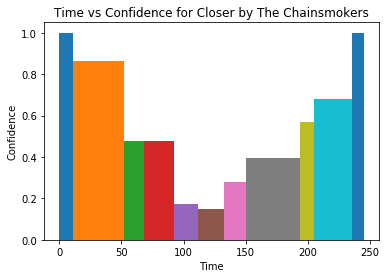

In [327]:
import matplotlib.pyplot as plt

for i in range(0,len(audio_section_data)):
    confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['confidence'],width =audio_section_data[i]['duration'])               

plt.xlabel("Time")
plt.ylabel("Confidence")
plt.title("Time vs Confidence for " + str(song_name)+" by " + str(artist_name))

Text(0.5,1,'Time vs Loudness for Closer by The Chainsmokers')

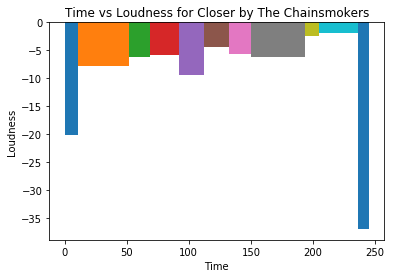

In [83]:
for i in range(0,len(audio_section_data)):
    loudness_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['loudness'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Loudness")
plt.title("Time vs Loudness for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Tempo for Closer by The Chainsmokers')

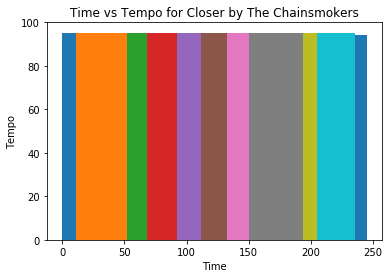

In [84]:
for i in range(0,len(audio_section_data)):
    tempo_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['tempo'],width =audio_section_data[i]['duration'])
    
plt.xlabel("Time")
plt.ylabel("Tempo")
plt.title("Time vs Tempo for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Tempo Confidence for Closer by The Chainsmokers')

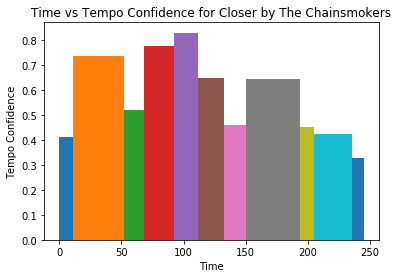

In [85]:
for i in range(0,len(audio_section_data)):
    tempo_confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['tempo_confidence'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Tempo Confidence")
plt.title("Time vs Tempo Confidence for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Key for Closer by The Chainsmokers')

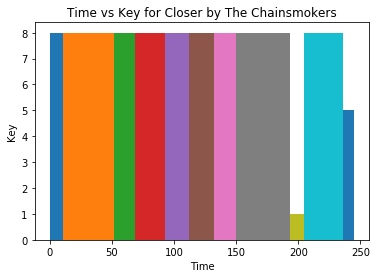

In [86]:
for i in range(0,len(audio_section_data)):
    key_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['key'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Key")
plt.title("Time vs Key for " + str(song_name)+" by " + str(artist_name))
   

Text(0.5,1,'Time vs Key Confidence for Closer by The Chainsmokers')

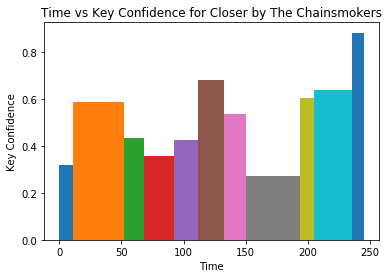

In [87]:
for i in range(0,len(audio_section_data)):
    key_confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['key_confidence'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Key Confidence")
plt.title("Time vs Key Confidence for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Mode for Closer by The Chainsmokers')

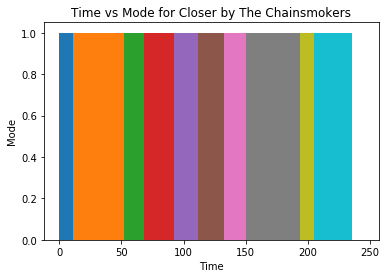

In [88]:
for i in range(0,len(audio_section_data)):
    mode_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['mode'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Mode")
plt.title("Time vs Mode for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Mode Confidence for Closer by The Chainsmokers')

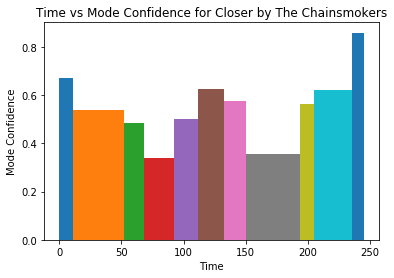

In [89]:
for i in range(0,len(audio_section_data)): 
    mode_confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['mode_confidence'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Mode Confidence")
plt.title("Time vs Mode Confidence for " + str(song_name)+" by " + str(artist_name))


Be note that tempo, key, and mode does not vary or only varies slightly for a short period of time. This is because as tempo, key or mode is usually constant through out the track.

____
## Import Dataset
Now we will import the dataset collected from Spotify. Genre of all the song data are EDM or EDM-POP. We have limited the genre as different genre would have different components that makes music popular. 

In [1]:
import pandas as pd
data = pd.read_csv("spotifydatafile.csv")
display(data.head())

track_name artist_name  \
0                    Frogbass - Original Mix      Snails   
1                   Pump This - Getter Remix      Getter   
2  Going Gorillas (Doctor P's Bananas Remix)    Doctor P   
3                       STOMP - Original Mix      Snails   
4                                      Alone  Marshmello   

                 track_id               artist_id  track_popularity  \
0  0HzkGXPcRlW1hRkaVHqxdm  2yT7X3Gg2S51DHz67FAYL6                45   
1  2YbJAWHkMOoh88GfHFYP3y  3QryVD03gGZOLQQXjy3EoA                25   
2  5JIRfXFuMCOVEALueIUeXp  0tgjwsn1Lpjj8kKEvWm0KQ                29   
3  0OqIyc5l7mGnDo7bho5VJG  2yT7X3Gg2S51DHz67FAYL6                32   
4  12mGwph2YzDIlChtq3EdXP  64KEffDW9EtZ1y2vBYgq8T                84   

   artist_popularity  artist_followers  confidence_mean  confidence_std  \
0                 55             86330         0.403243        0.271824   
1                 62            201978         0.528772        0.437708   
2                 49            176097         0.468465        0.380187   
3                 55             86330         0.471887        0.303001   
4                 90           9429980         0.706476        0.351465   

   confidence_kurtosis       ...        timbre_10_kurtosis  timbre_11_mean  \
0            -1.079708       ...                  3.890714      -13.882033   
1             3.131753       ...                  2.141111      -10.706984   
2             0.775991       ...                207.992583      -16.154033   
3            -1.016856       ...                  9.053980      -13.677807   
4            -0.779456       ...                 67.991451      -16.281398   

   timbre_11_std  timbre_11_iqr  timbre_11_kurtosis  timbre_12_mean  \
0      28.022220      26.550974            5.557516       -1.434159   
1      19.007453      16.015037           27.038076        6.503507   
2      35.798104      20.566850          461.145861        2.814578   
3      22.176813      24.962327           29.526707       -5.675537   
4      38.105996      19.987504          694.292855       -2.330784   

   timbre_12_std  timbre_12_iqr  timbre_12_kurtosis  timbre_entropy  
0      17.361067      19.522260            4.264414            -inf  
1      19.481074      17.311120            5.605190            -inf  
2      18.201007      21.586638            5.967477            -inf  
3      13.082367      11.970867           23.544235            -inf  
4      15.161742      13.403706           76.020202            -inf  

[5 rows x 135 columns]

## Data Exploration

First, we will explore the data distribution with histograms. We will check whether there is highly skewed data. Also, we will eliminate timbre_entropy, as all values are negative infinity. 

In [2]:
#Eliminate features that are not necessary for machine learning.
data1 = data[data.columns[4:-1]]
index = list(data1.dtypes.index)
display(data1.head())

track_popularity  artist_popularity  artist_followers  confidence_mean  \
0                45                 55             86330         0.403243   
1                25                 62            201978         0.528772   
2                29                 49            176097         0.468465   
3                32                 55             86330         0.471887   
4                84                 90           9429980         0.706476   

   confidence_std  confidence_kurtosis  loudness_mean  loudness_std  \
0        0.271824            -1.079708      -2.646263      1.157058   
1        0.437708             3.131753      -3.221914      4.559017   
2        0.380187             0.775991      -1.379139      2.219043   
3        0.303001            -1.016856      -3.126165      1.499101   
4        0.351465            -0.779456      -5.904486      5.012209   

   loudness_kurtosis  tempo_mean         ...          timbre_10_iqr  \
0           0.011863   90.115881         ...              24.000512   
1           5.288548  149.994531         ...              16.180088   
2           2.677295  100.046687         ...              19.020444   
3           0.581027  145.011152         ...              16.900722   
4           0.428284  142.124142         ...              20.104257   

   timbre_10_kurtosis  timbre_11_mean  timbre_11_std  timbre_11_iqr  \
0            3.890714      -13.882033      28.022220      26.550974   
1            2.141111      -10.706984      19.007453      16.015037   
2          207.992583      -16.154033      35.798104      20.566850   
3            9.053980      -13.677807      22.176813      24.962327   
4           67.991451      -16.281398      38.105996      19.987504   

   timbre_11_kurtosis  timbre_12_mean  timbre_12_std  timbre_12_iqr  \
0            5.557516       -1.434159      17.361067      19.522260   
1           27.038076        6.503507      19.481074      17.311120   
2          461.145861        2.814578      18.201007      21.586638   
3           29.526707       -5.675537      13.082367      11.970867   
4          694.292855       -2.330784      15.161742      13.403706   

   timbre_12_kurtosis  
0            4.264414  
1            5.605190  
2            5.967477  
3           23.544235  
4           76.020202  

[5 rows x 130 columns]

/Users/kibaekjeong/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


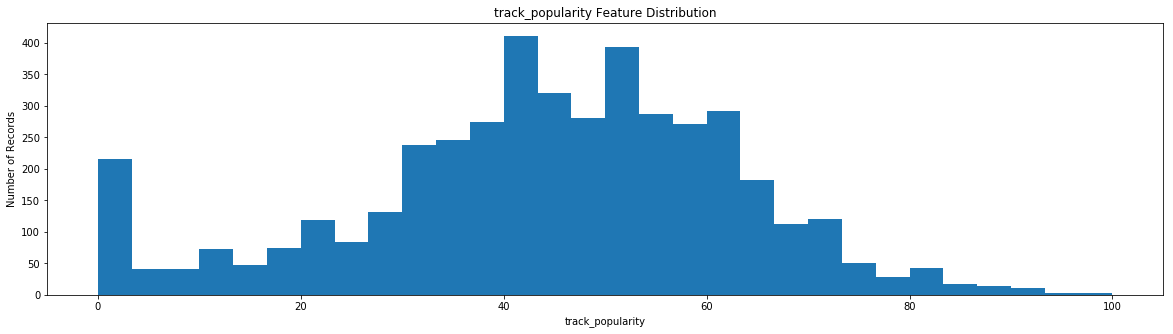

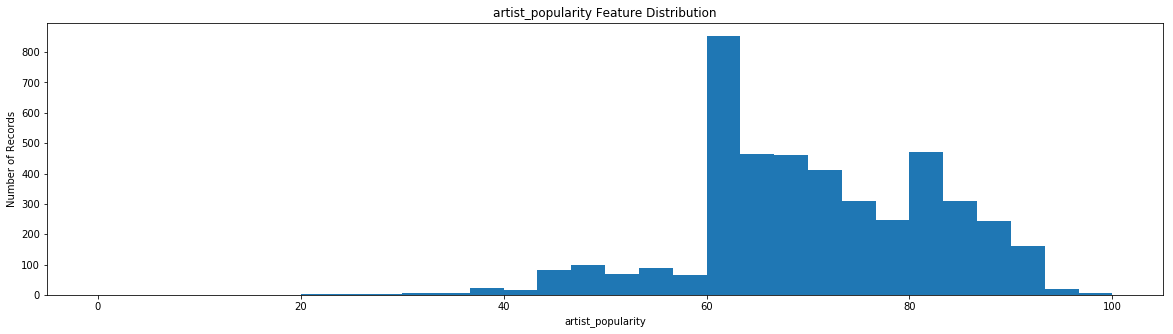

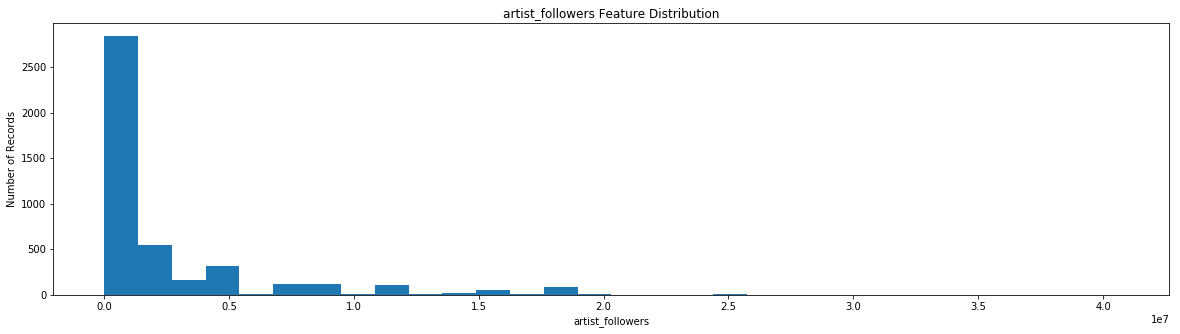

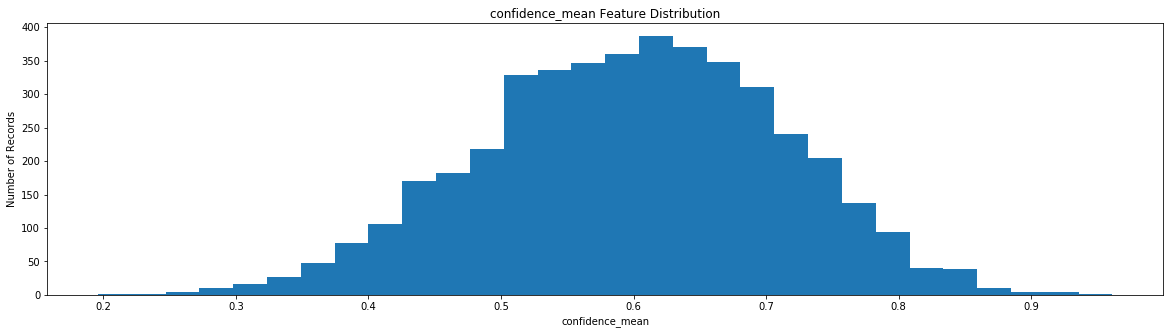

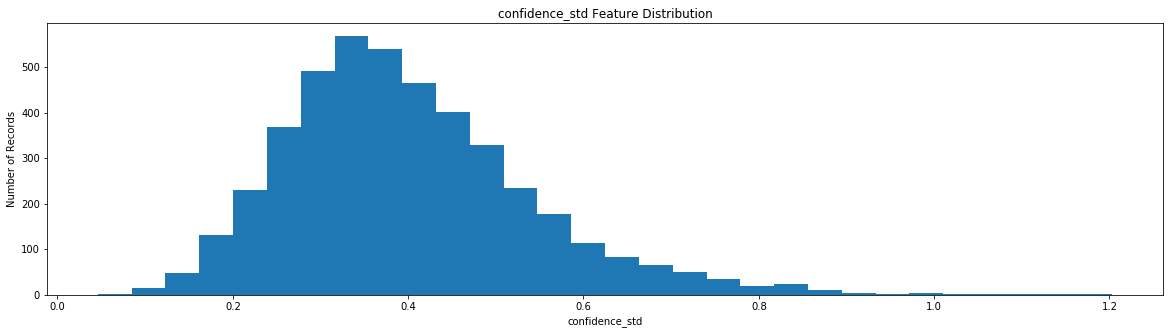

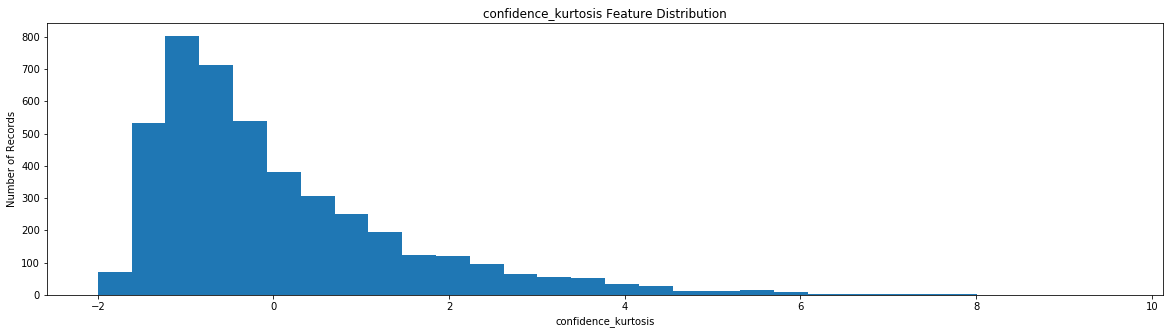

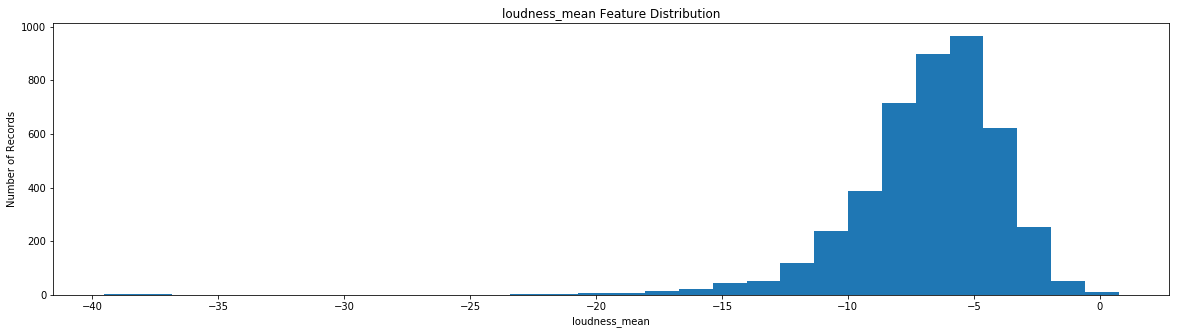

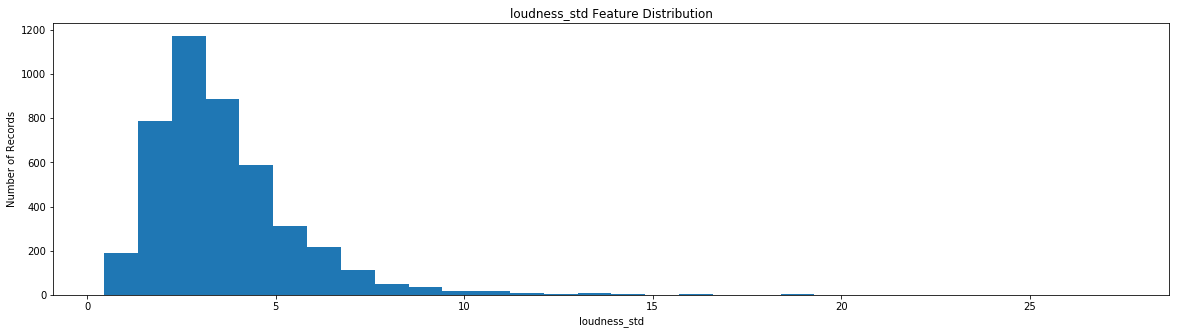

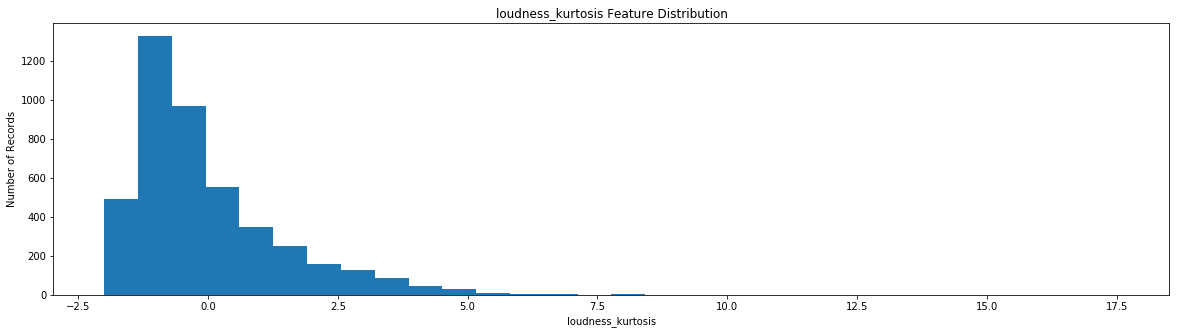

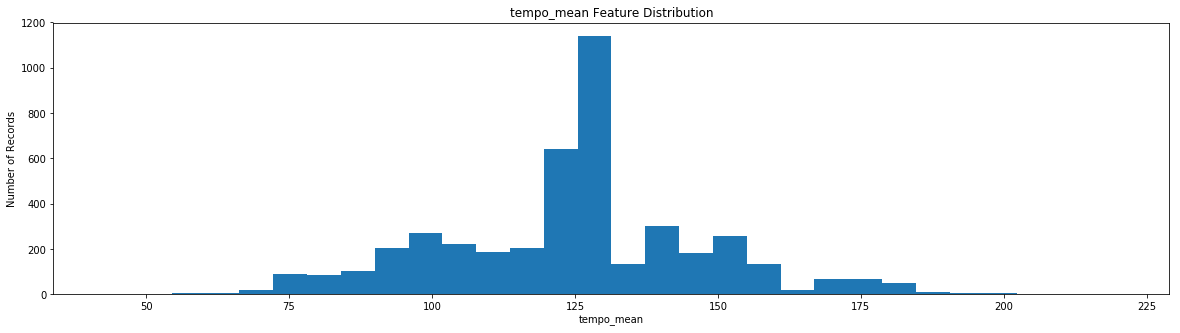

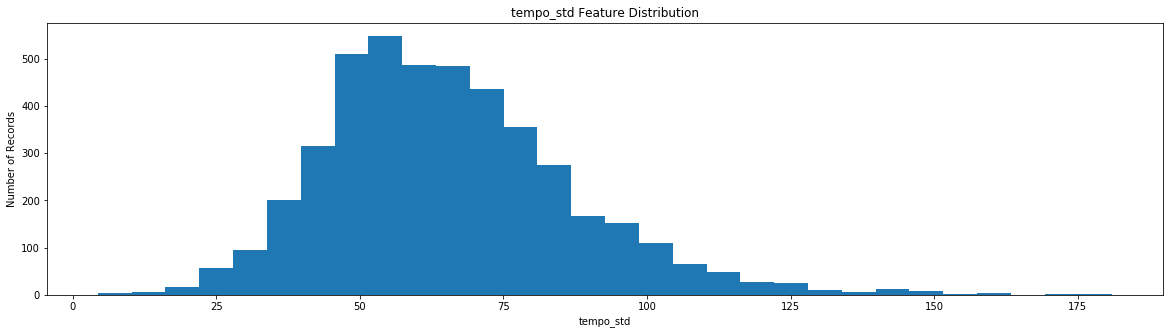

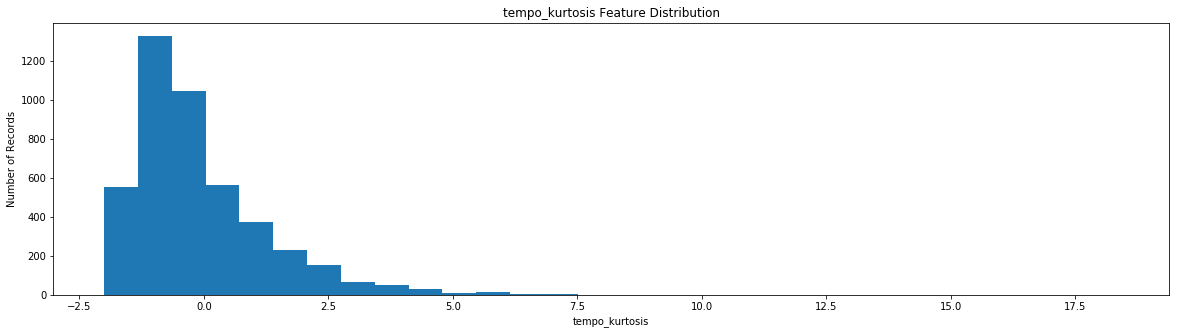

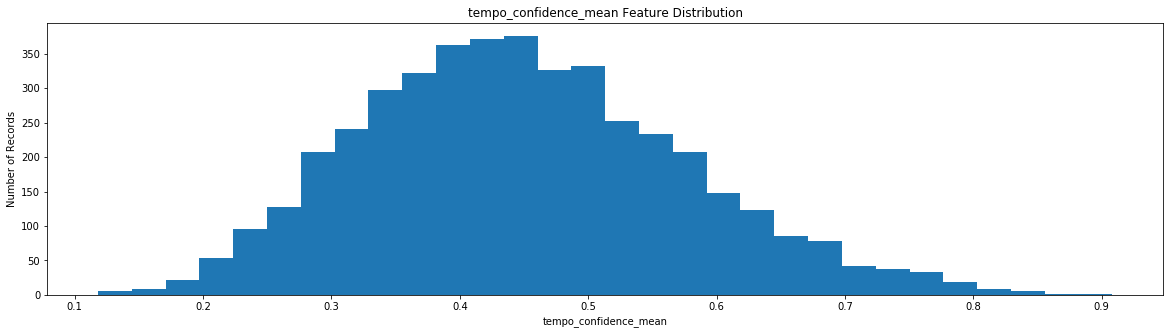

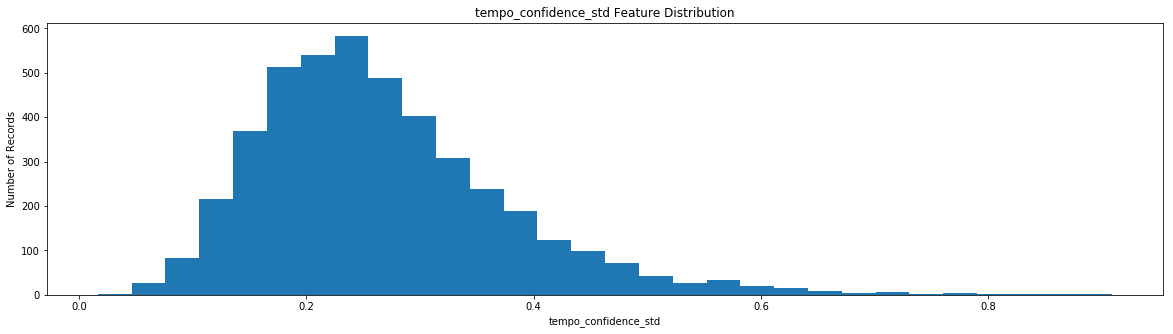

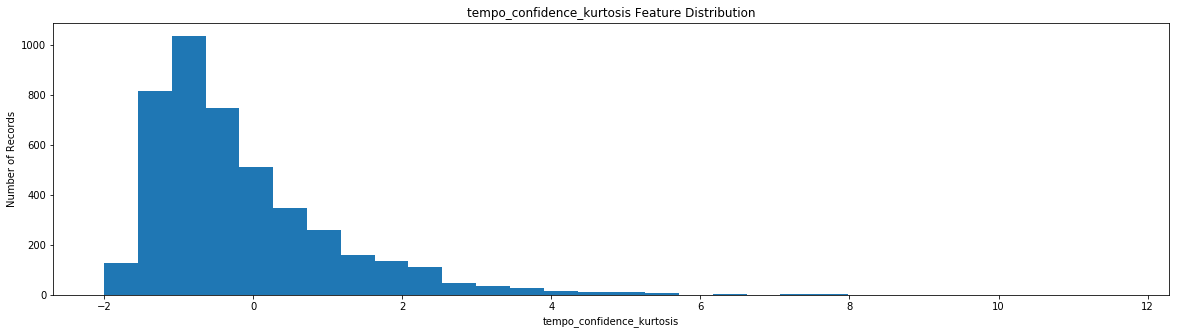

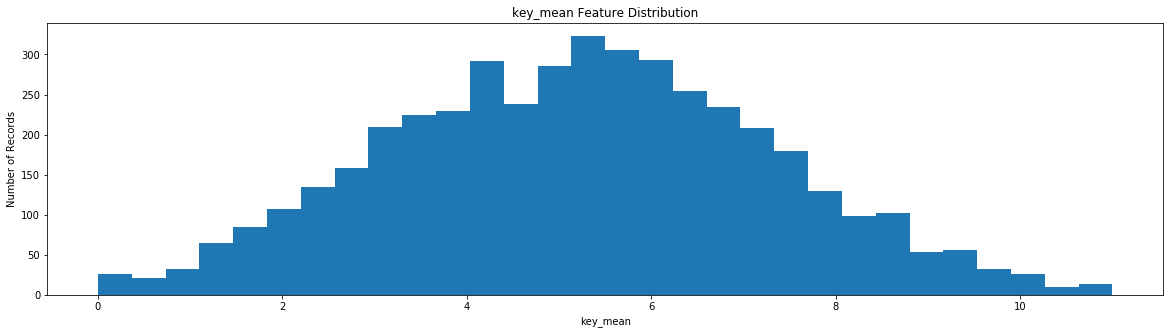

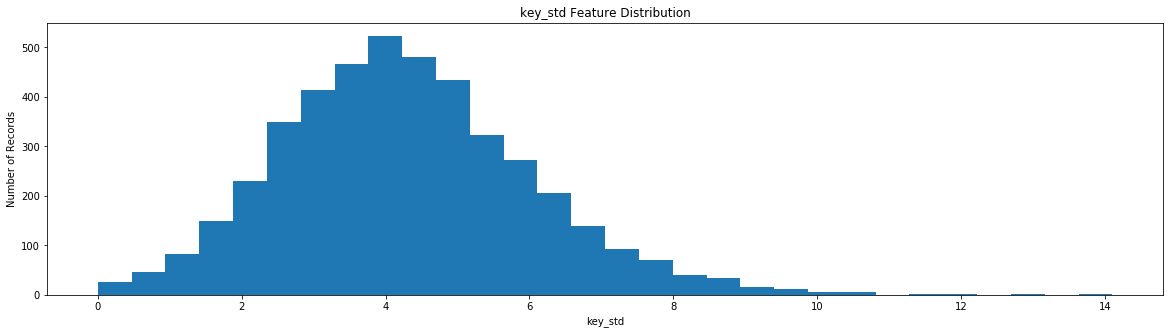

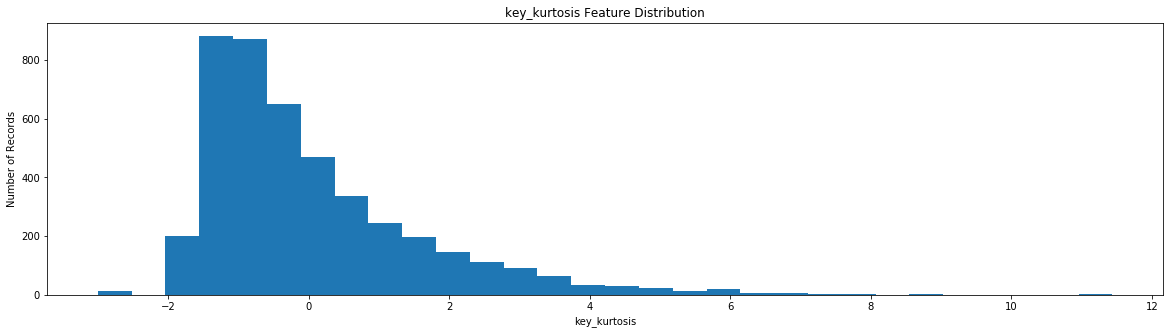

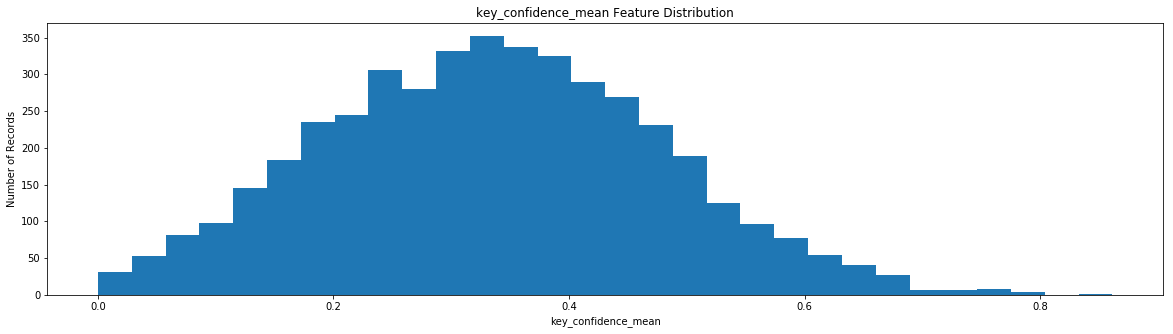

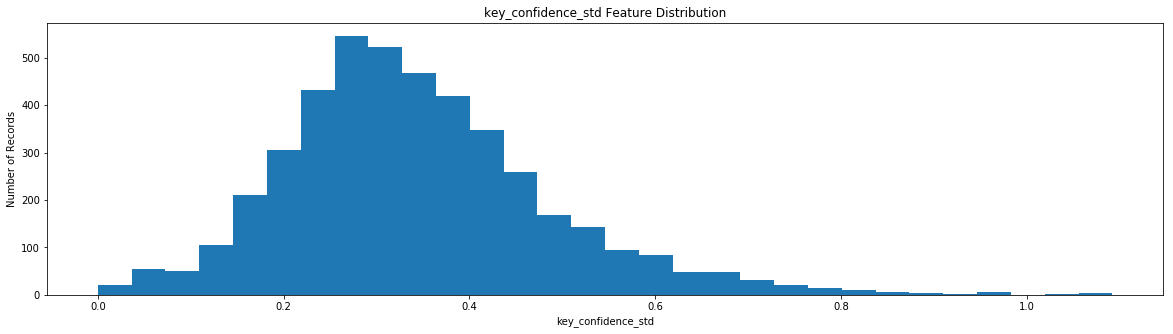

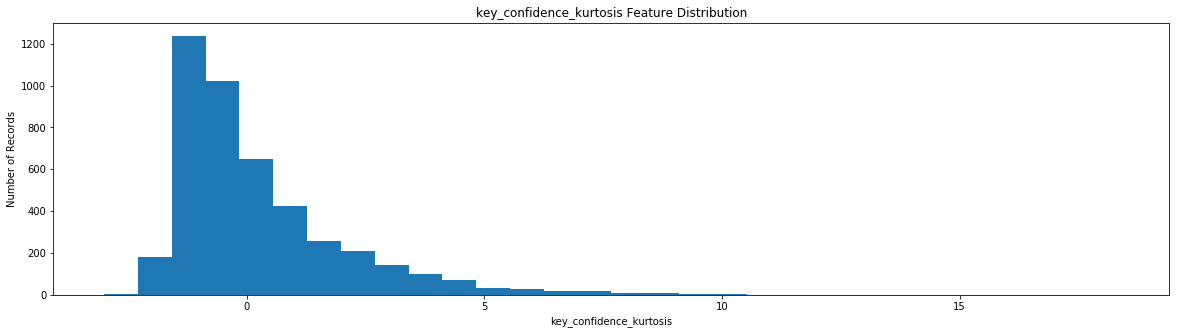

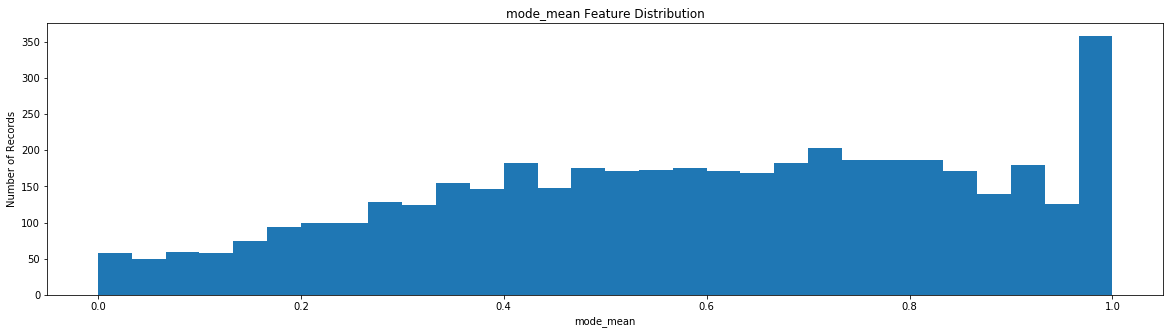

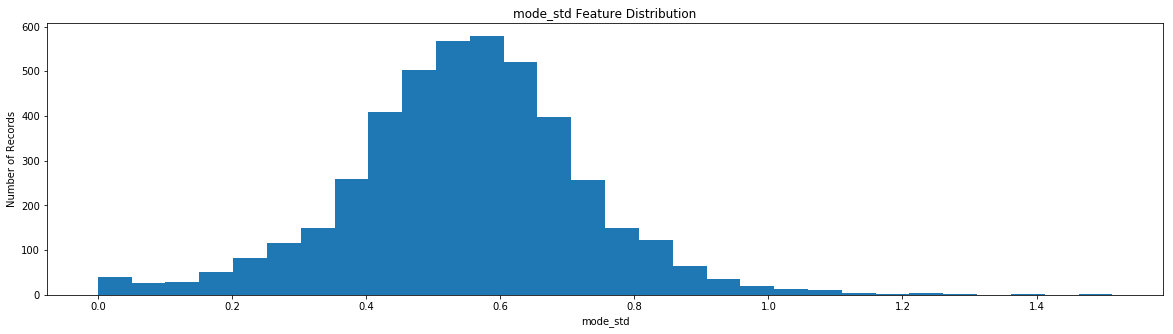

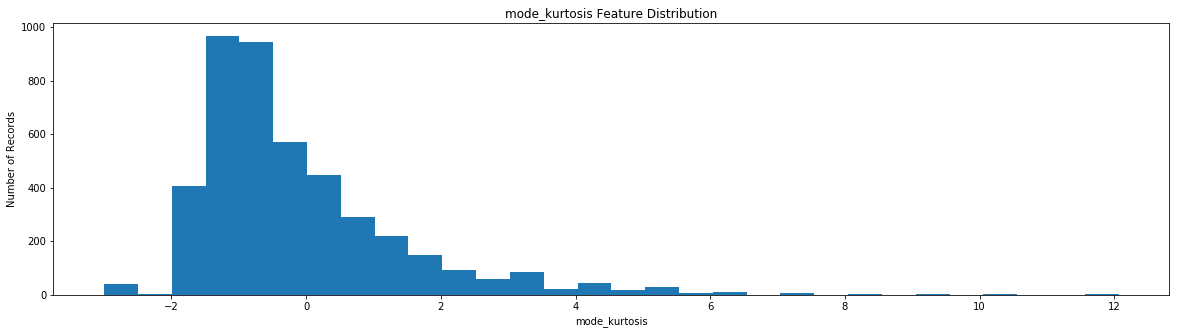

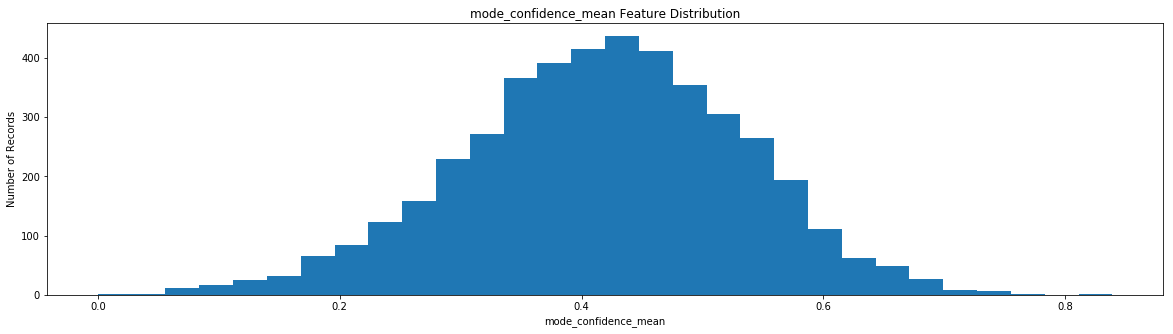

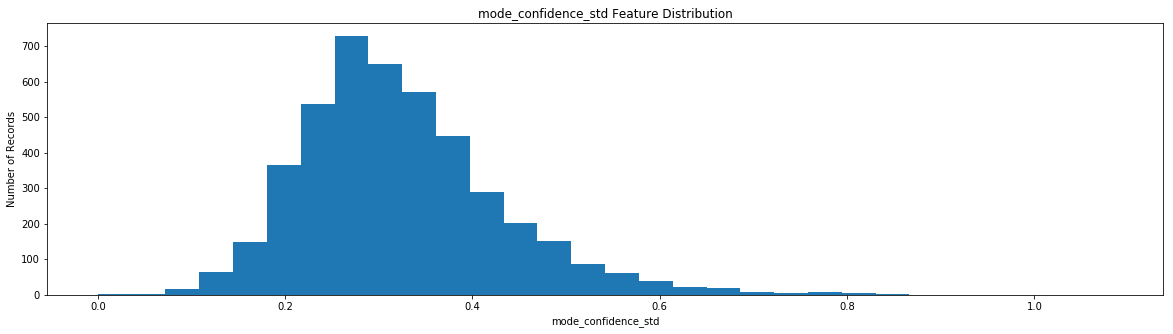

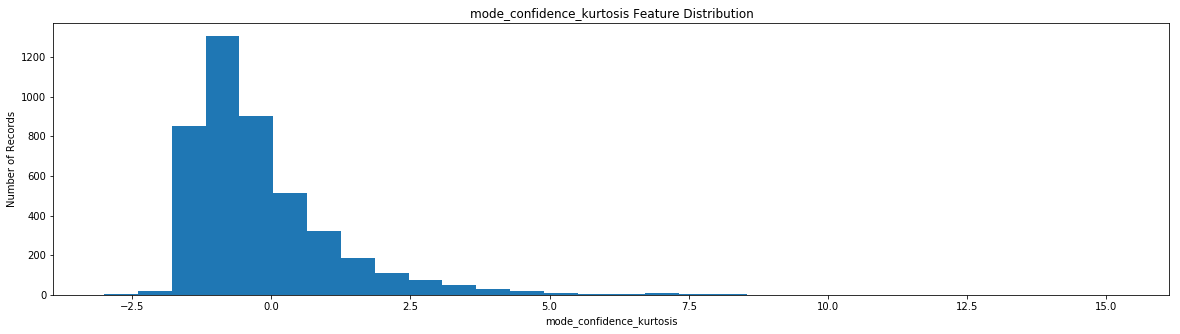

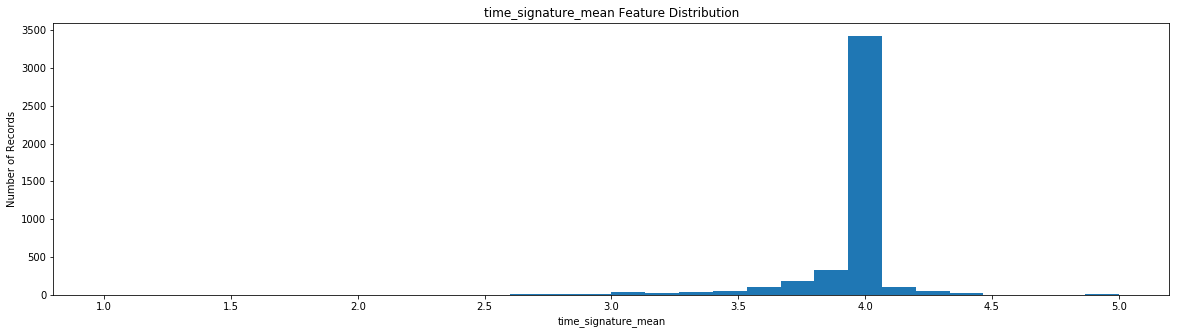

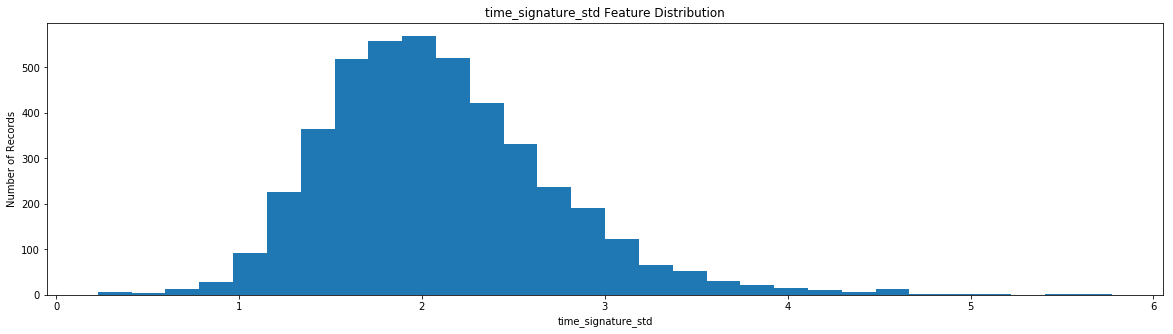

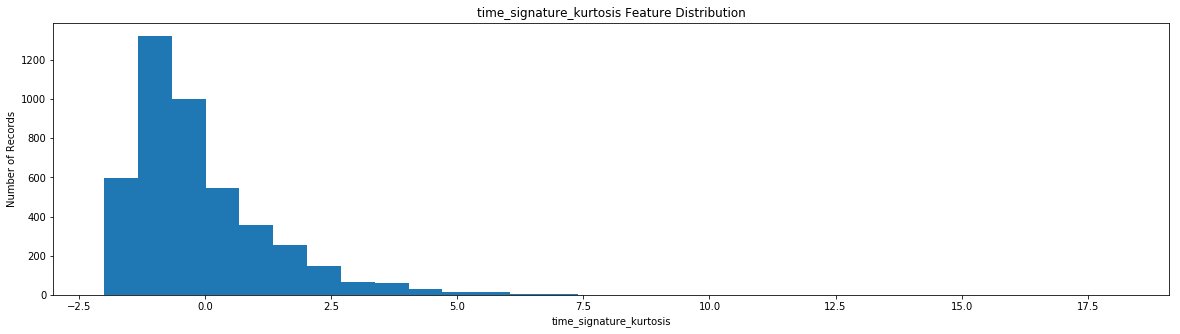

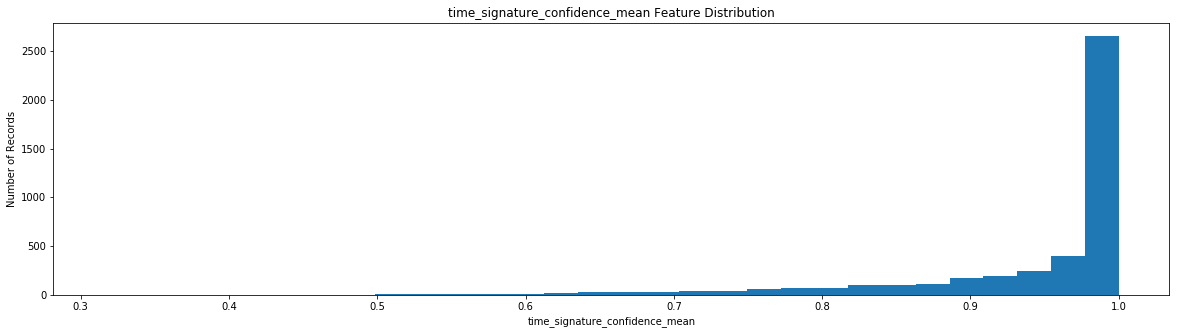

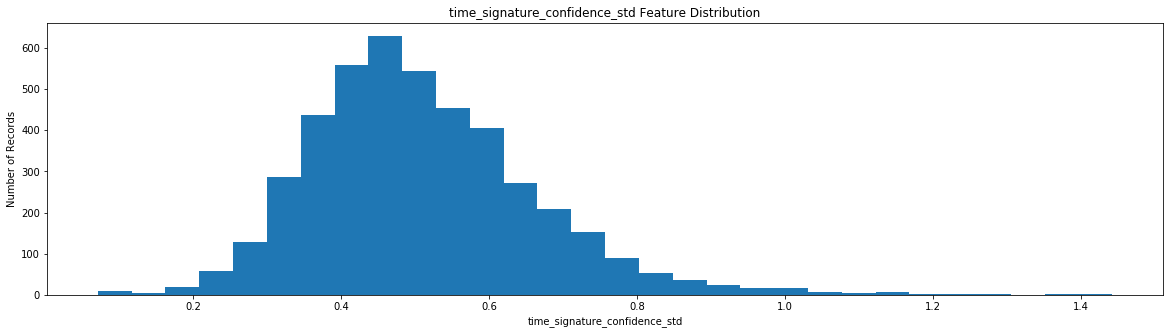

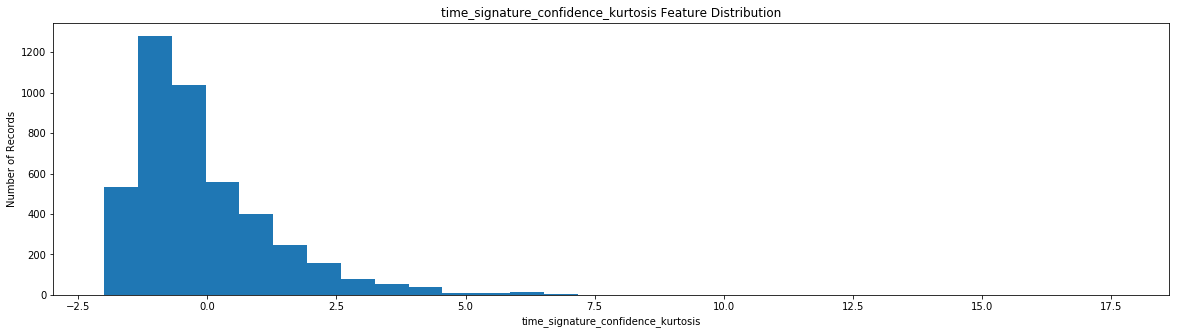

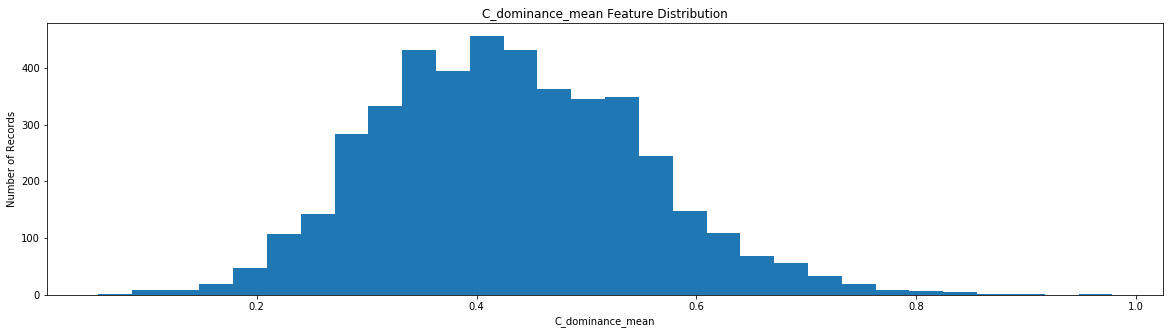

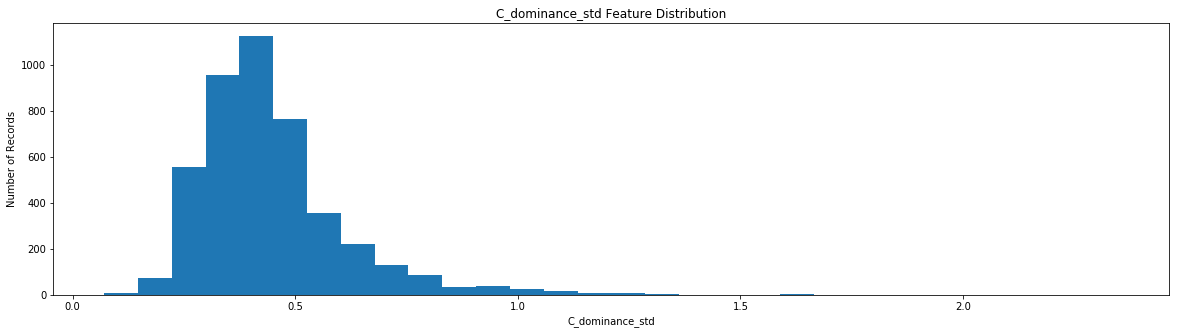

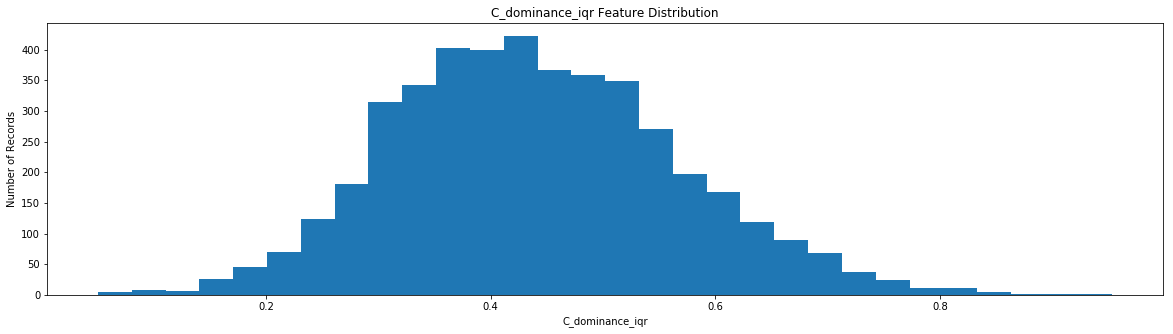

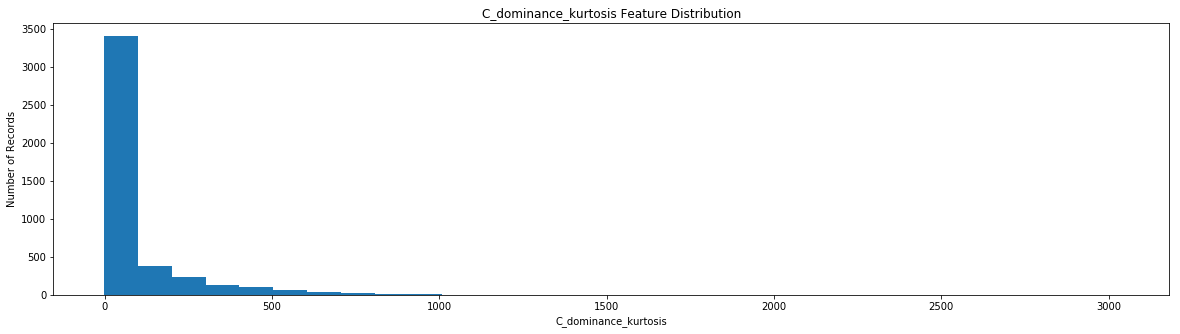

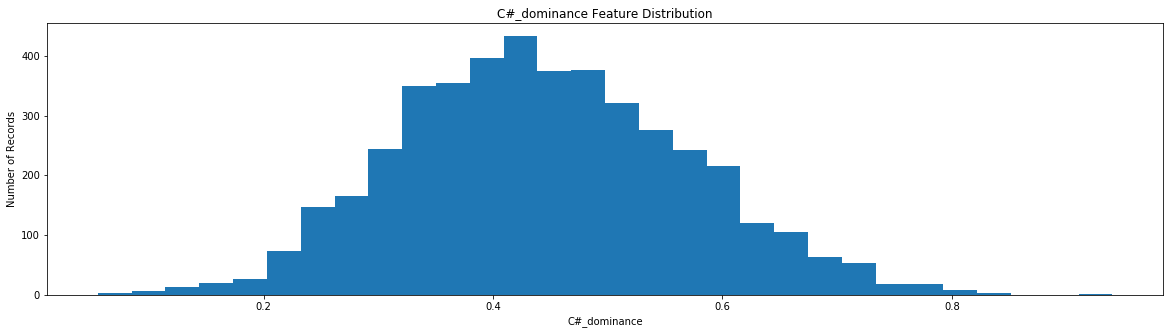

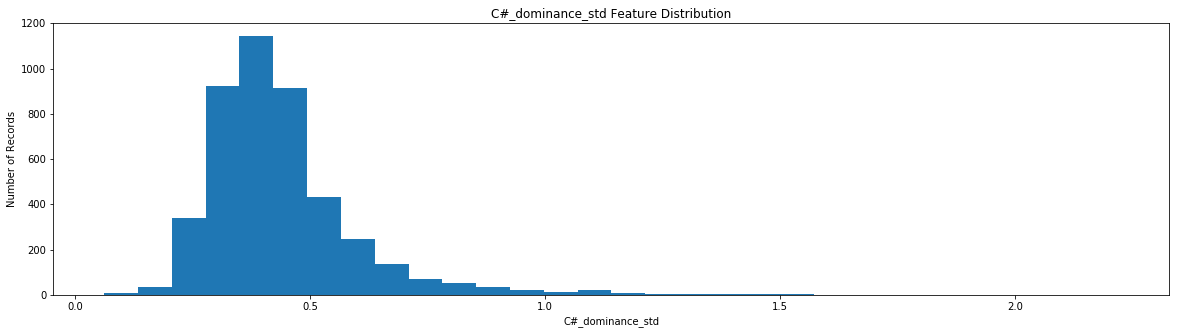

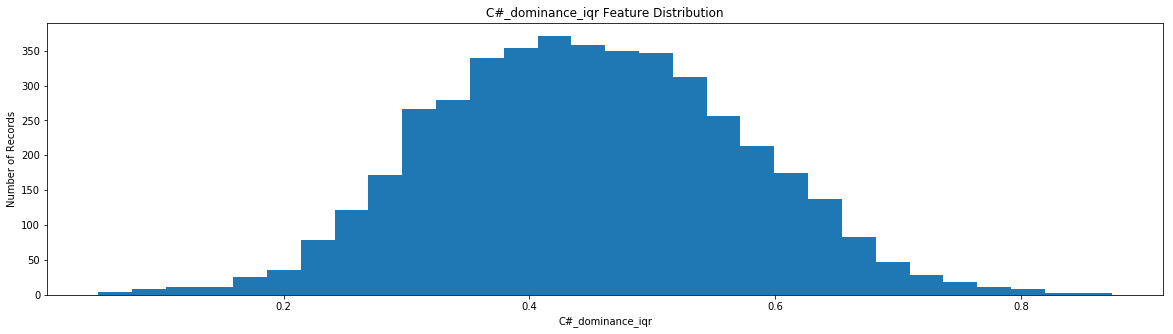

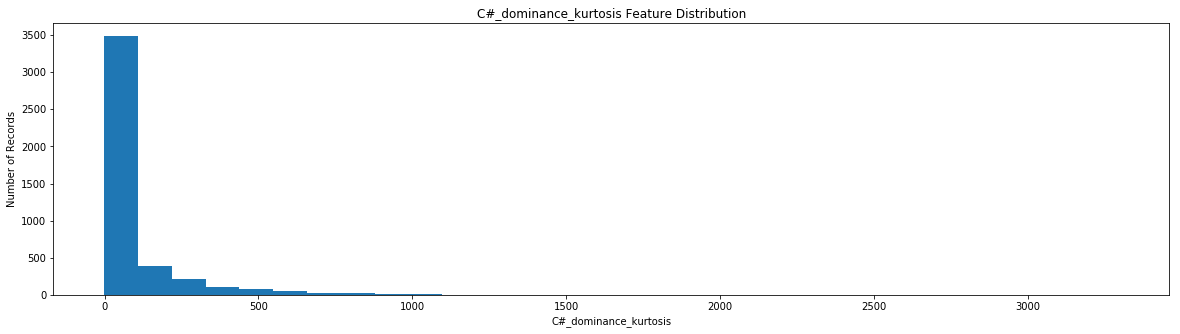

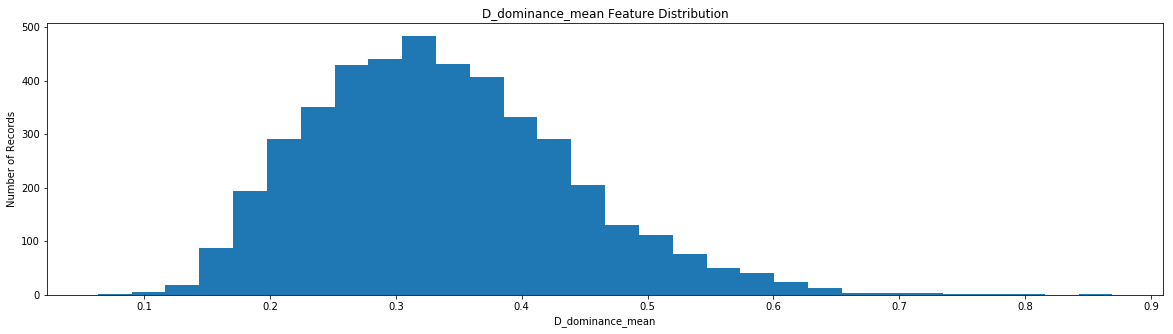

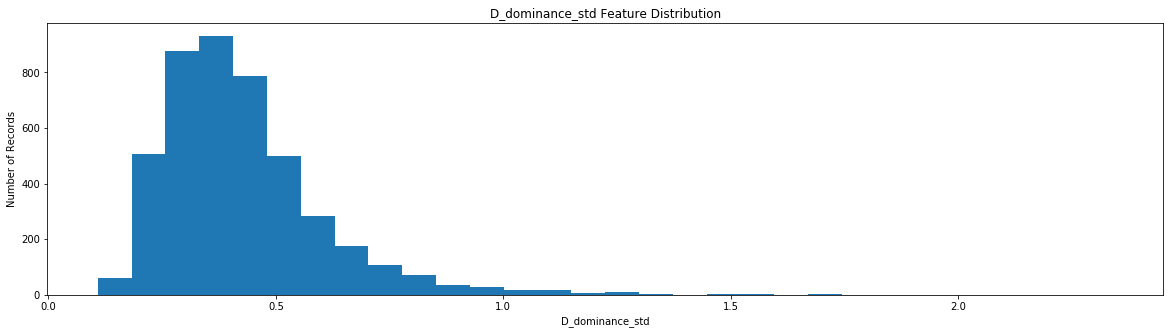

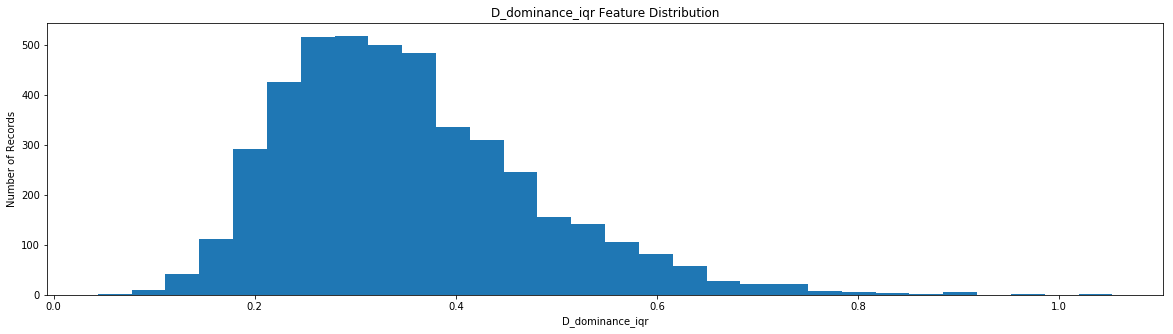

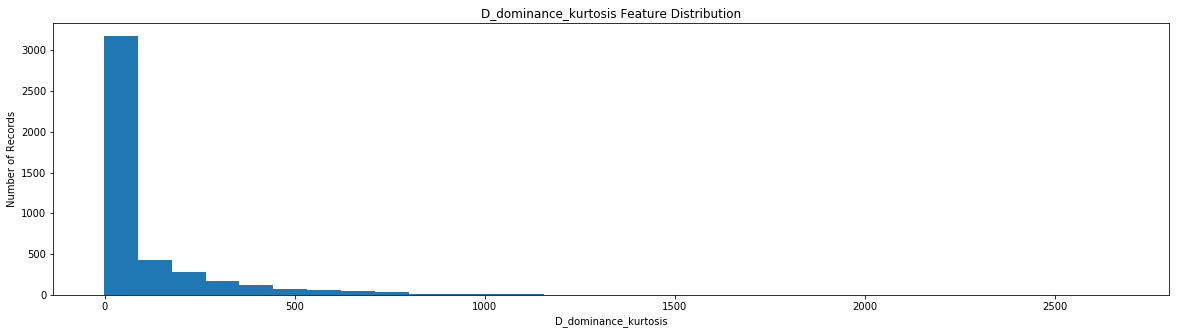

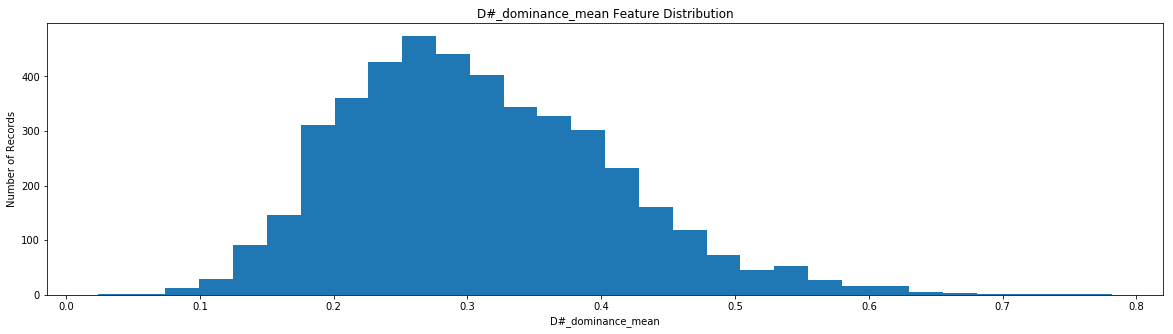

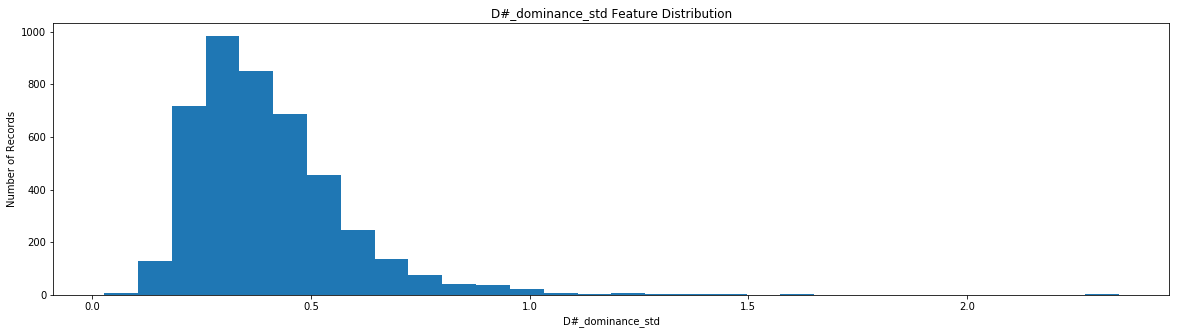

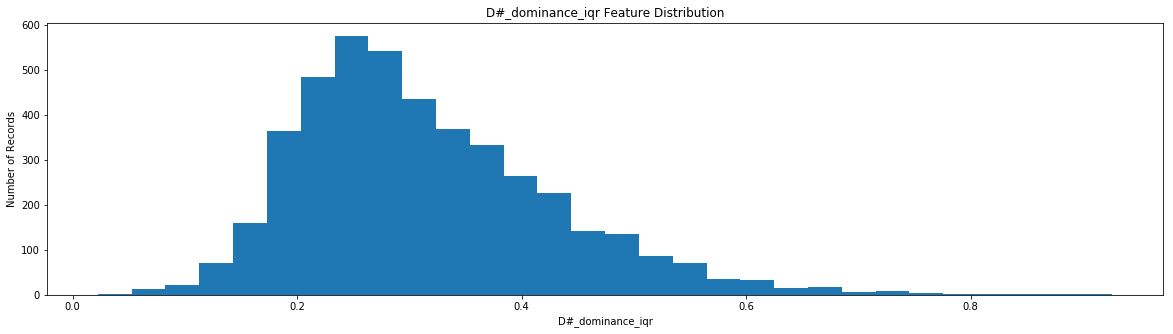

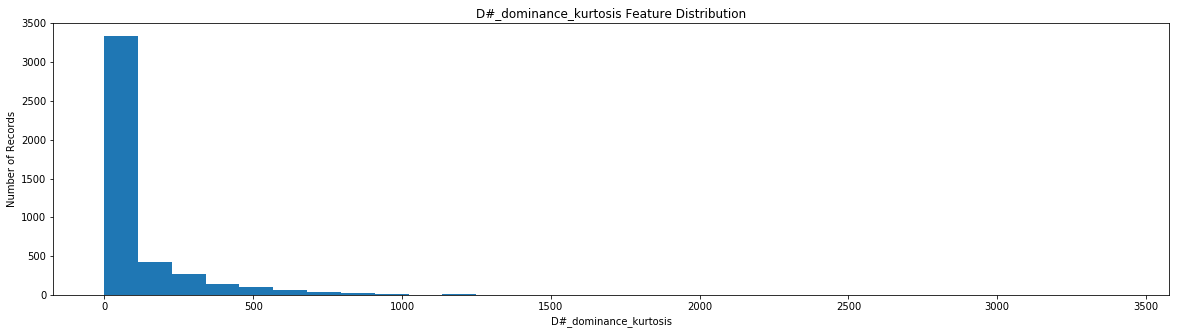

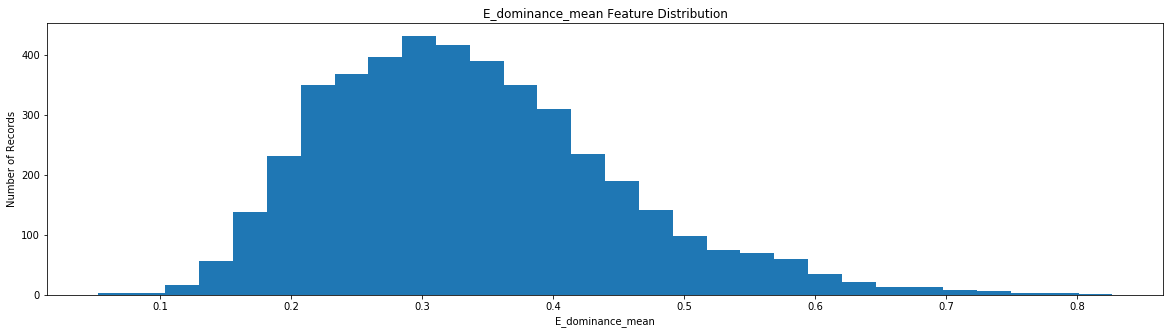

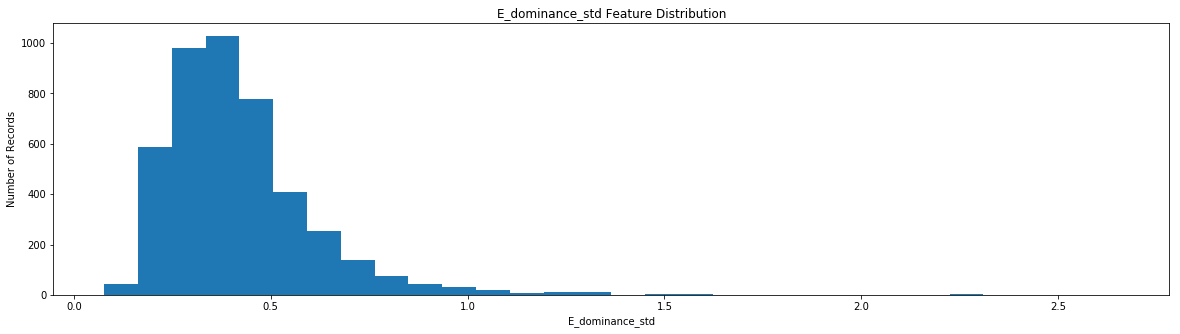

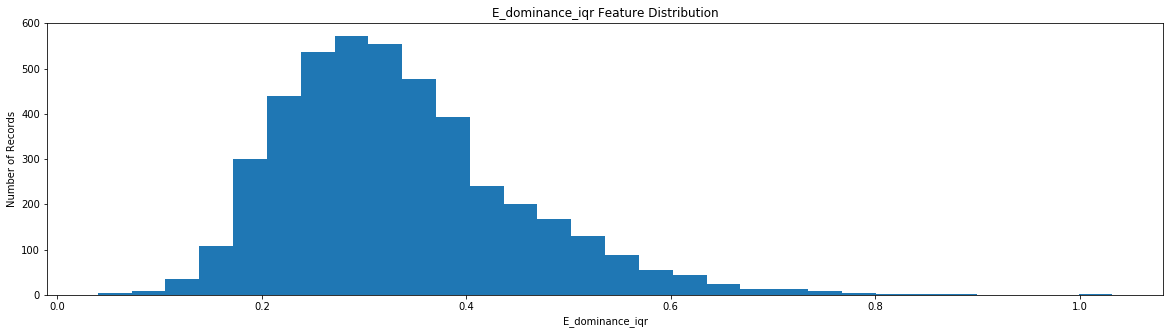

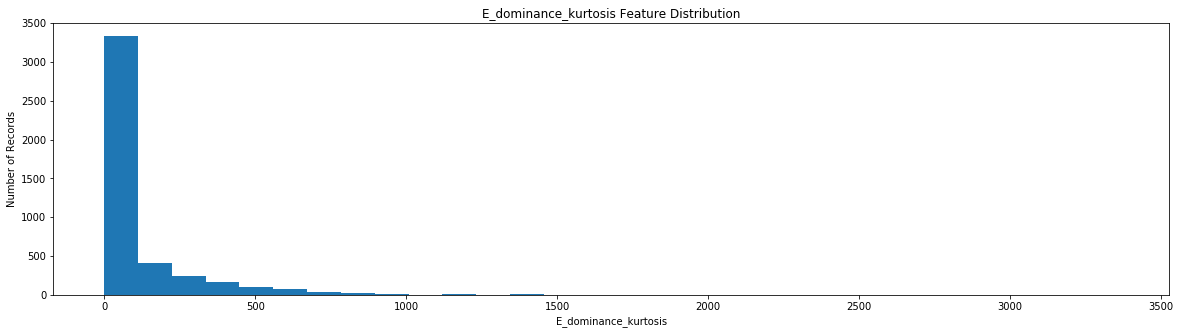

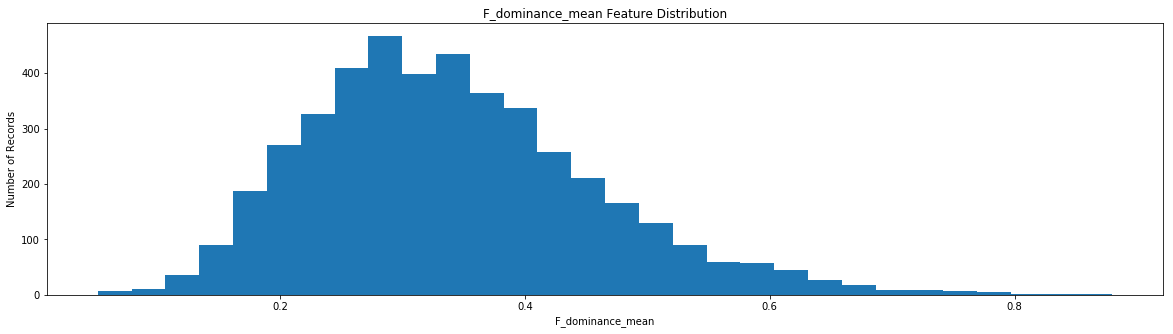

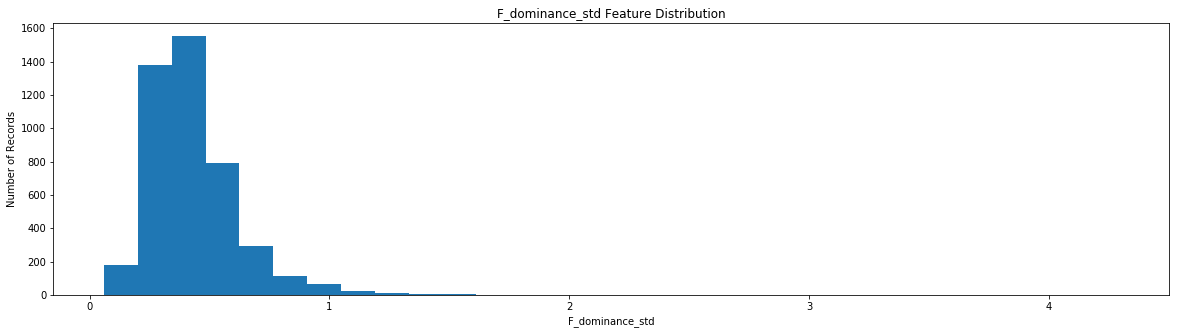

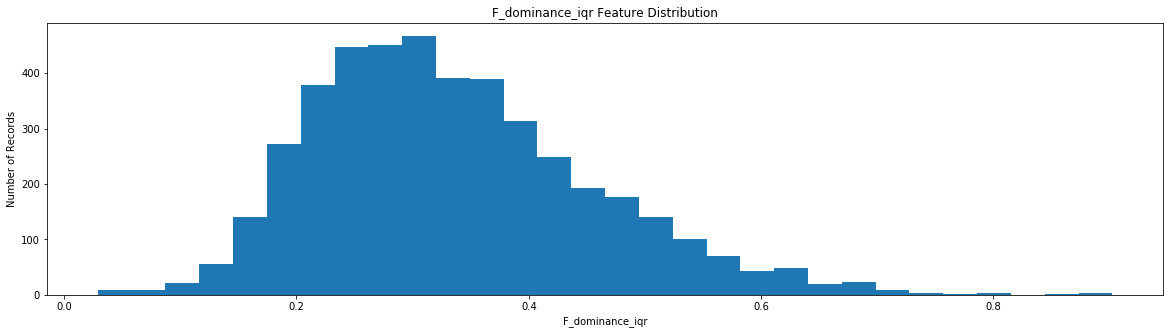

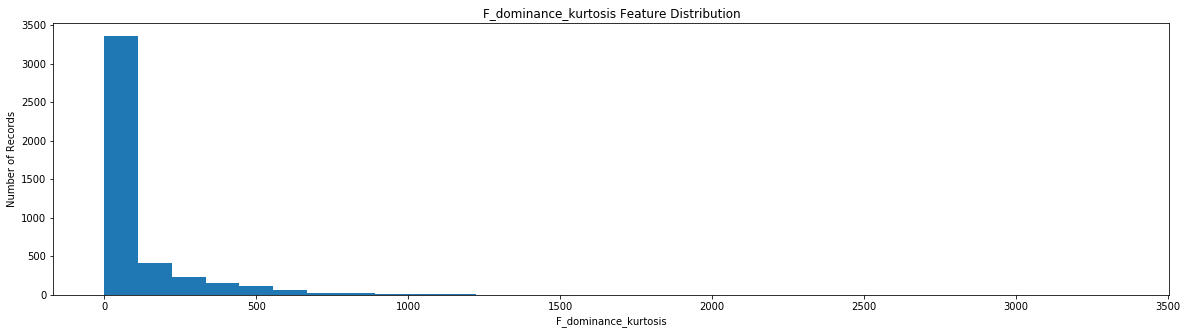

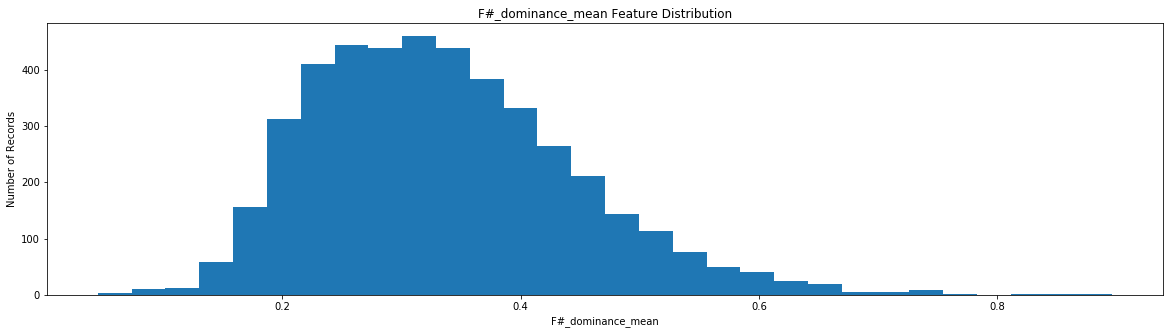

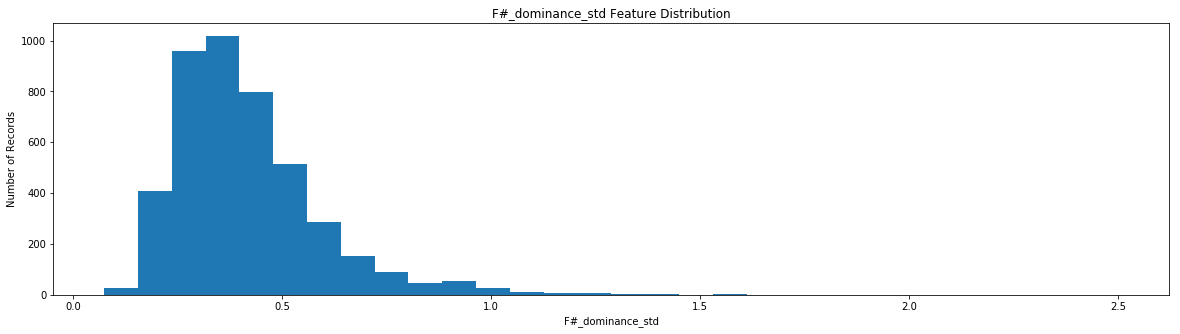

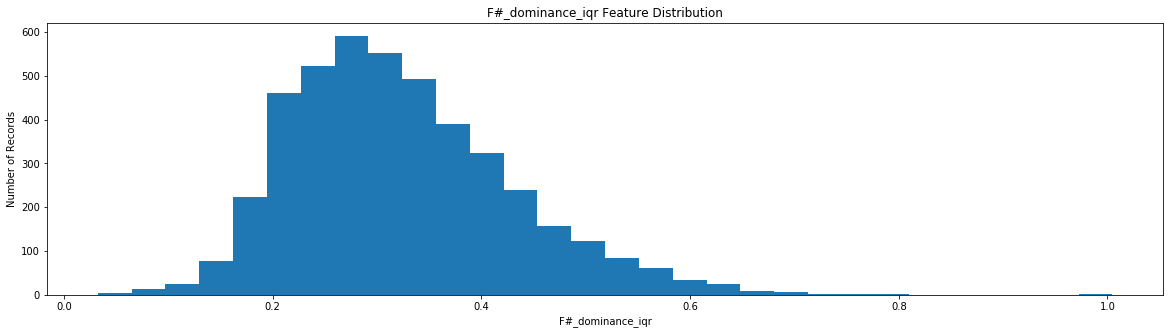

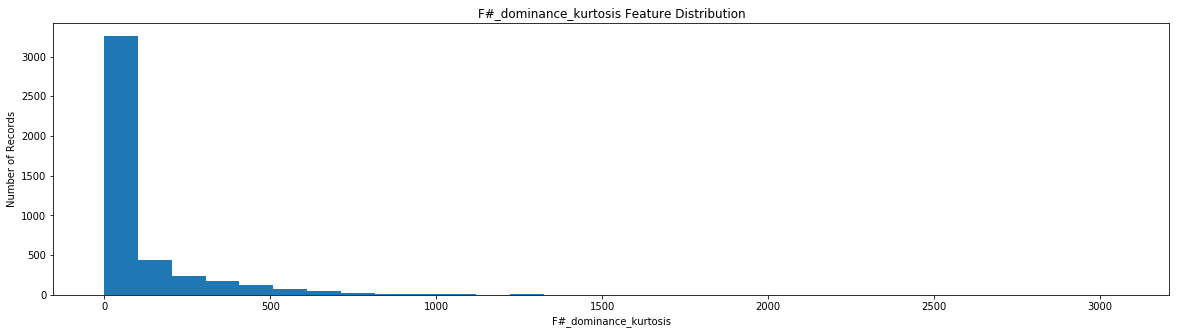

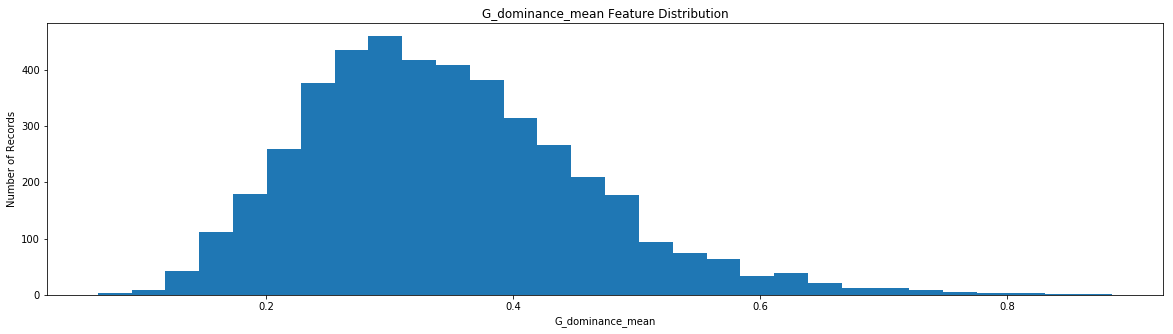

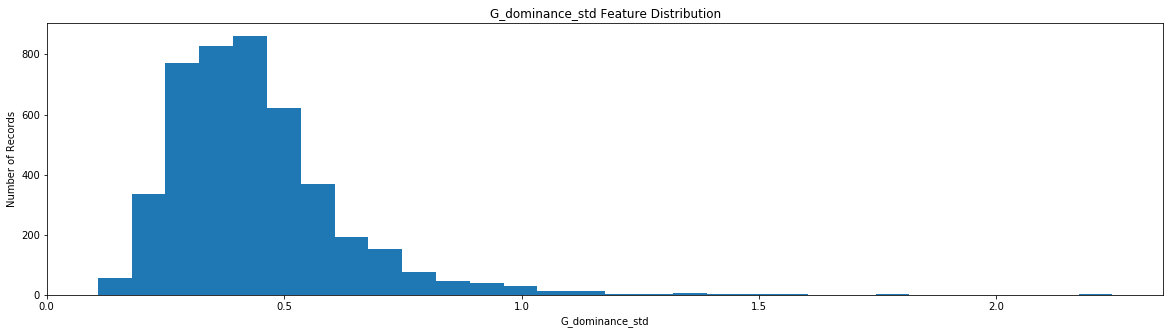

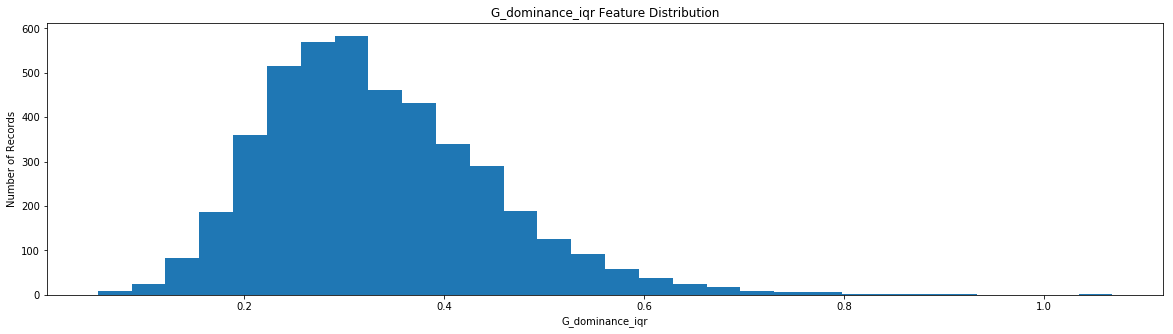

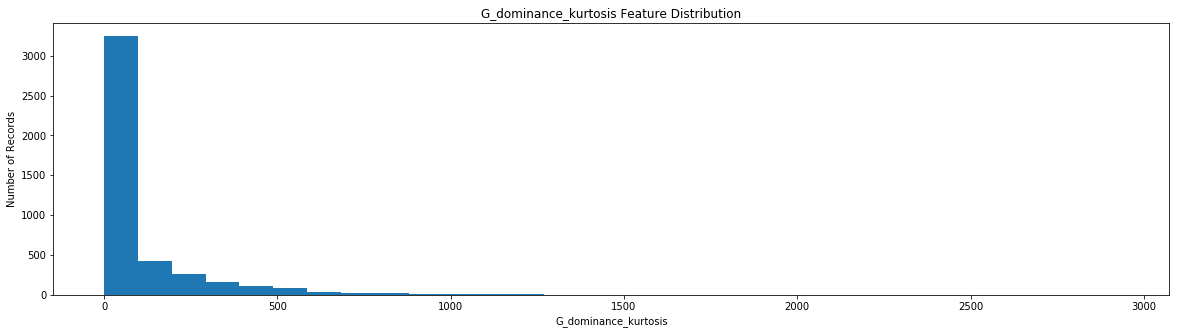

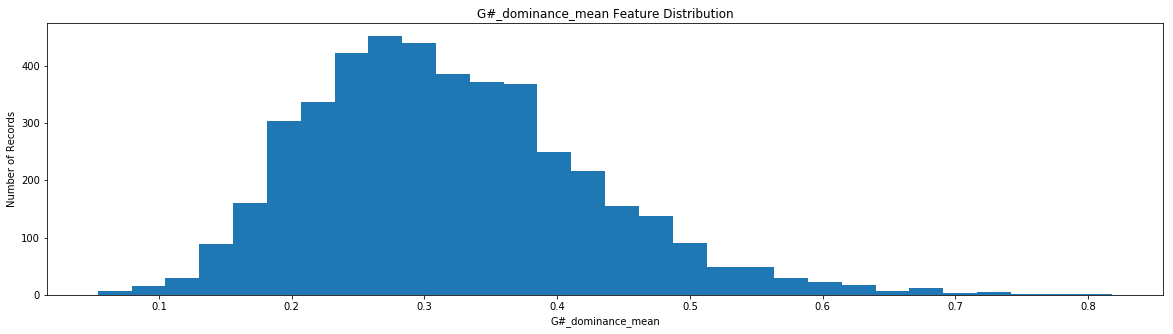

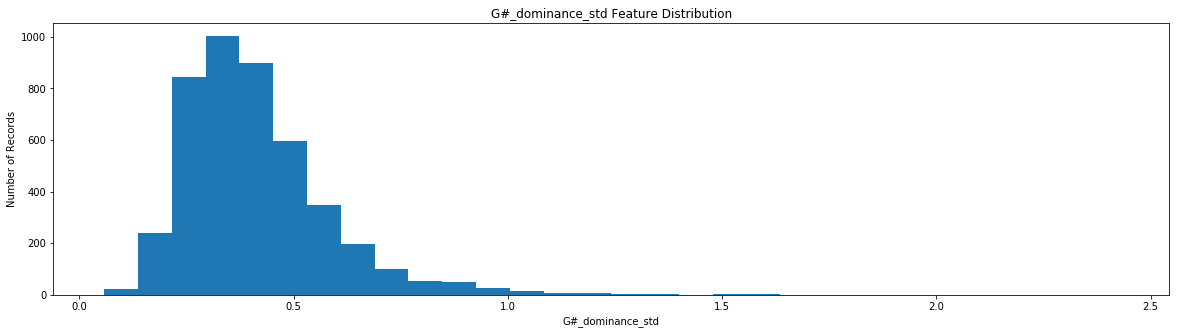

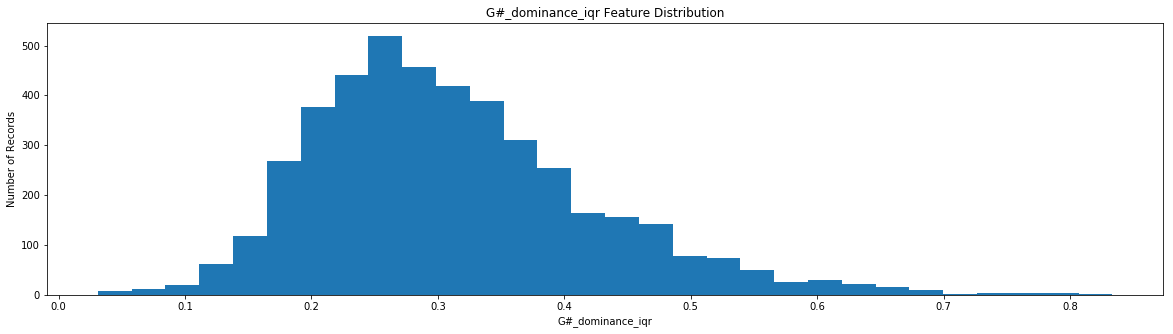

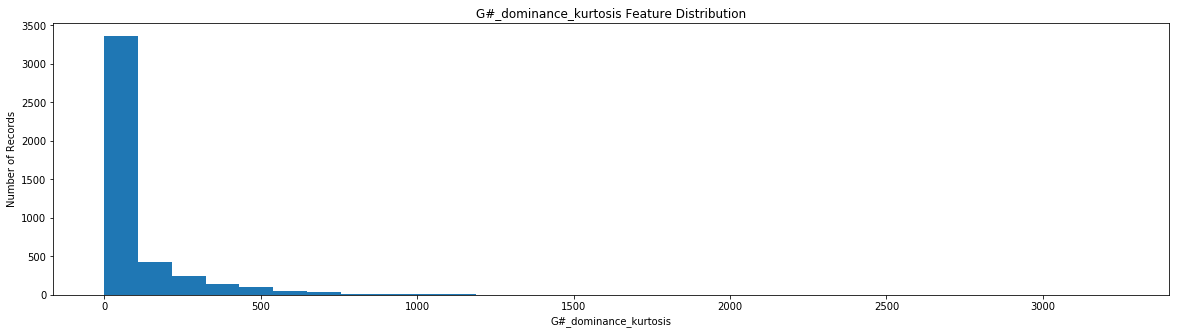

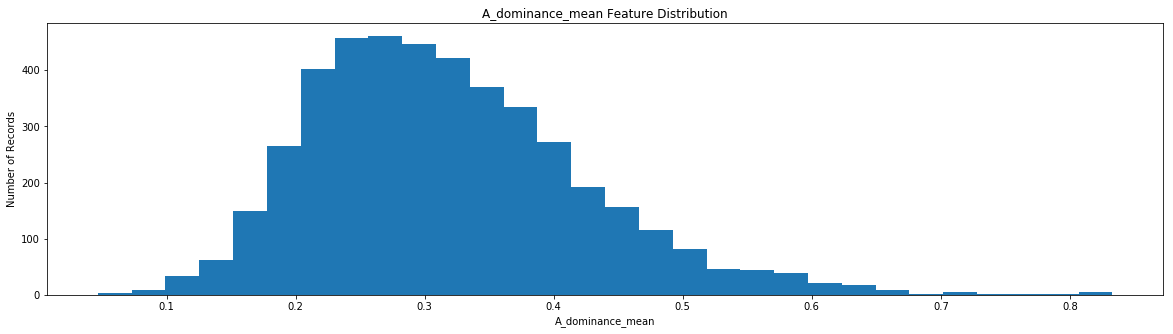

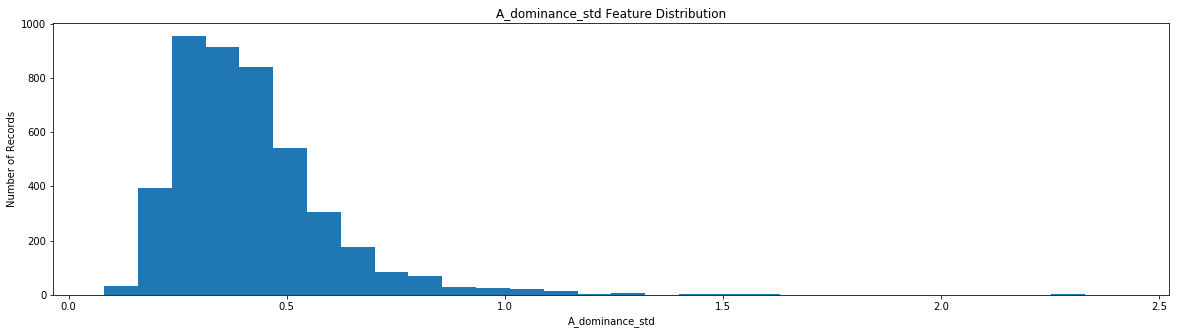

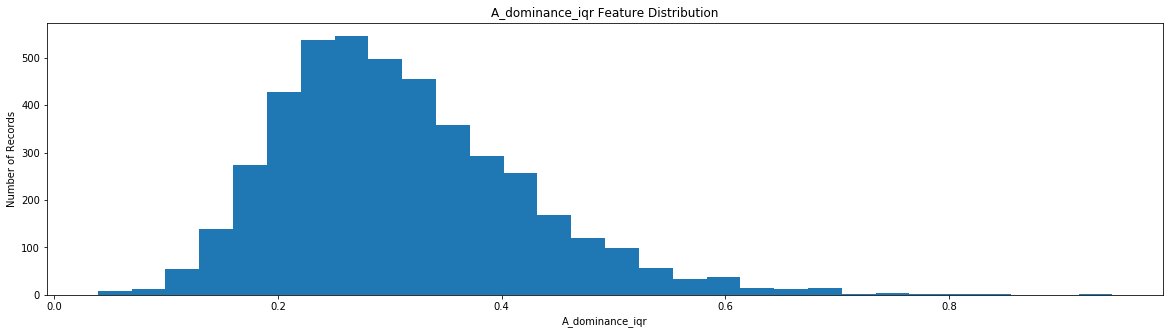

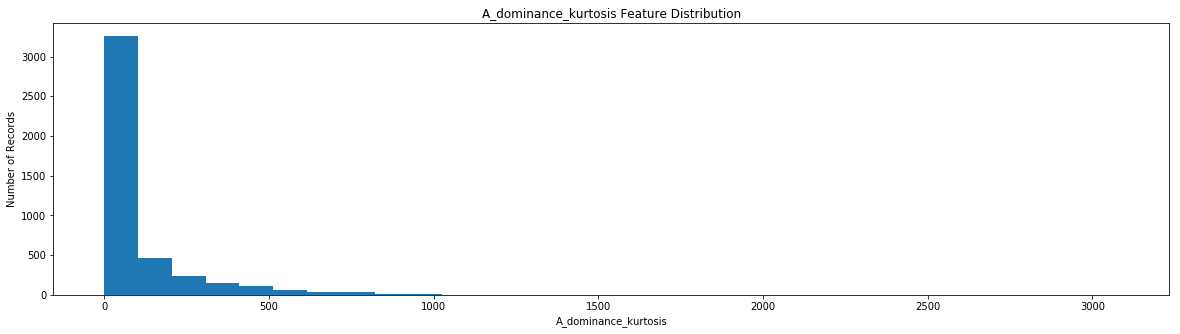

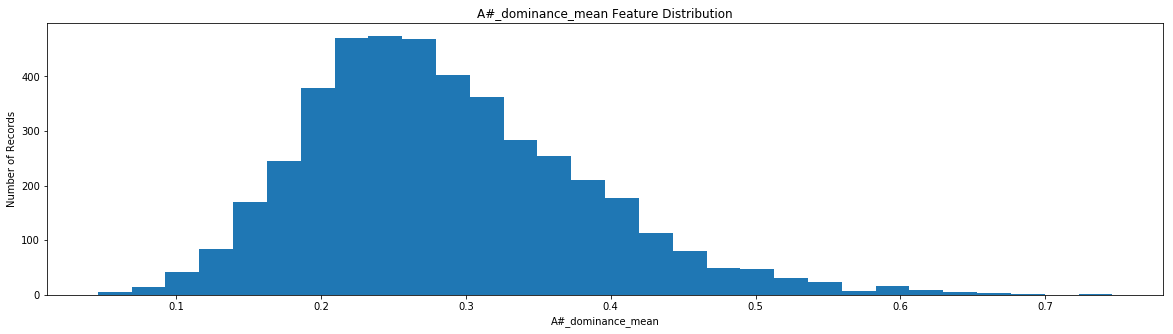

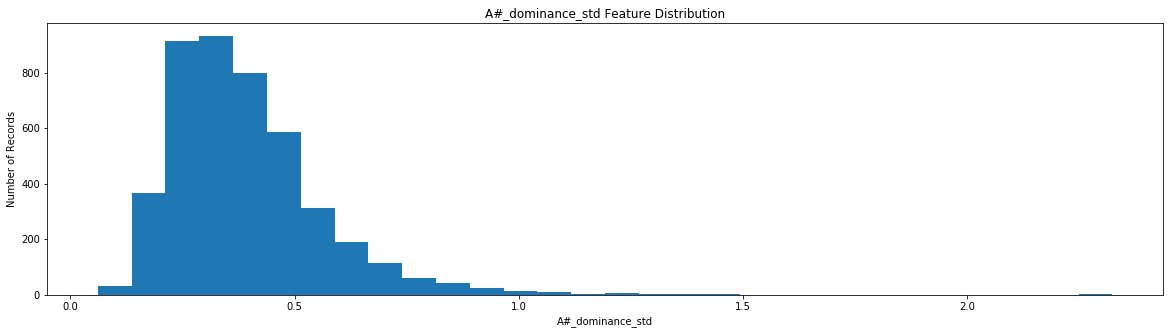

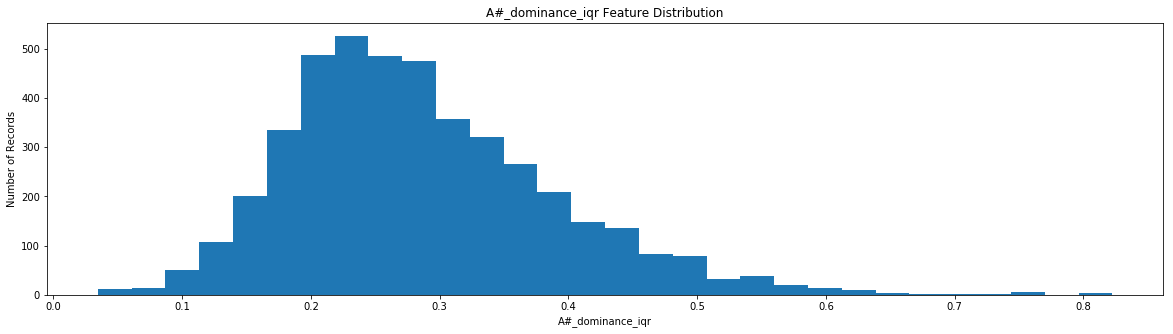

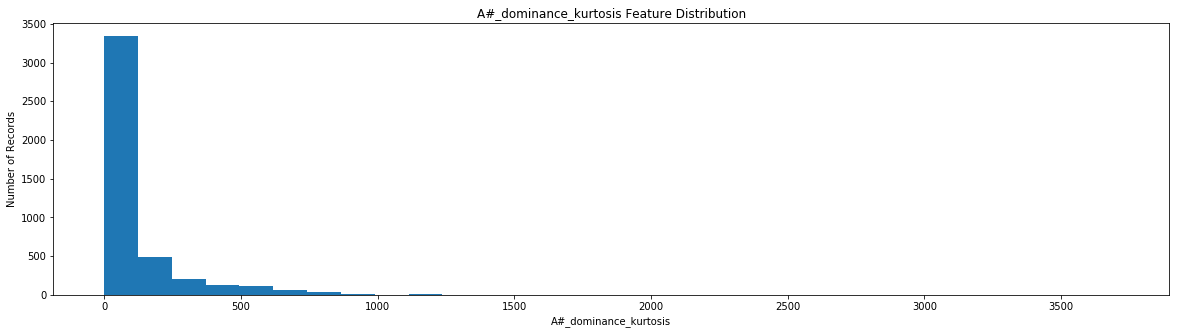

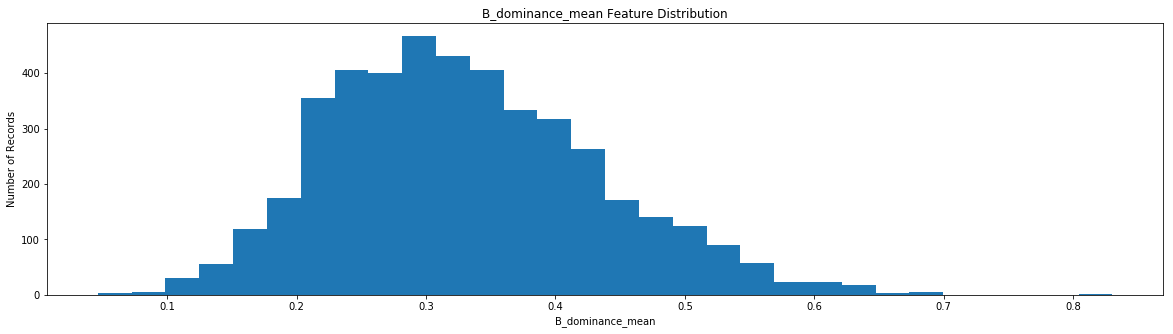

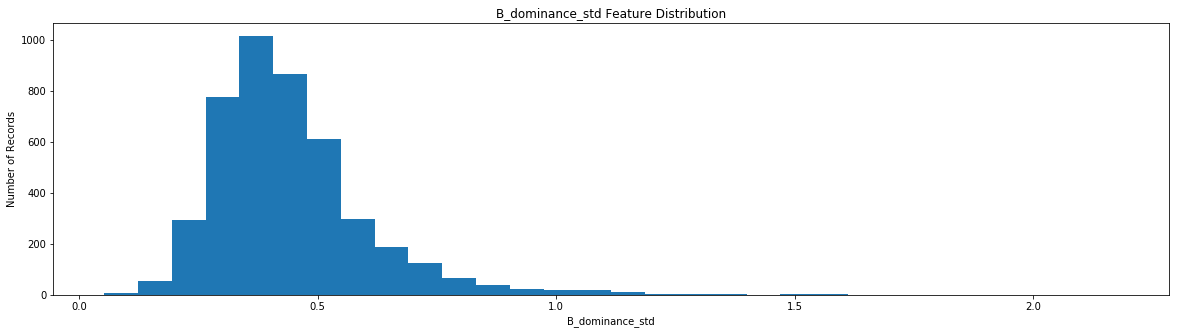

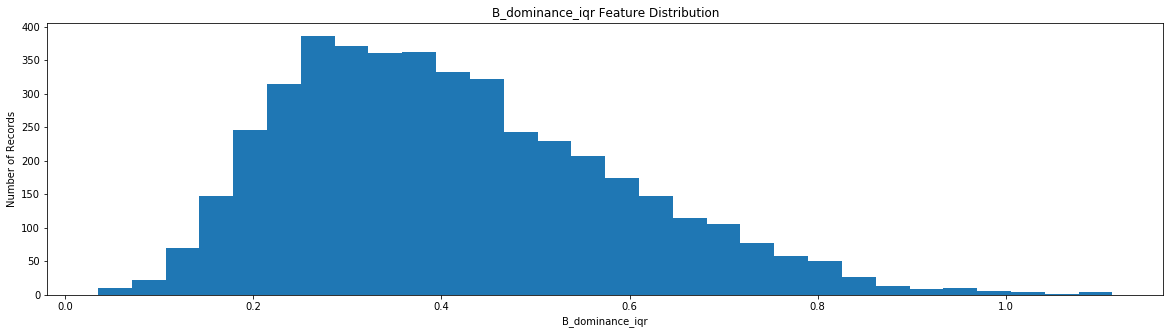

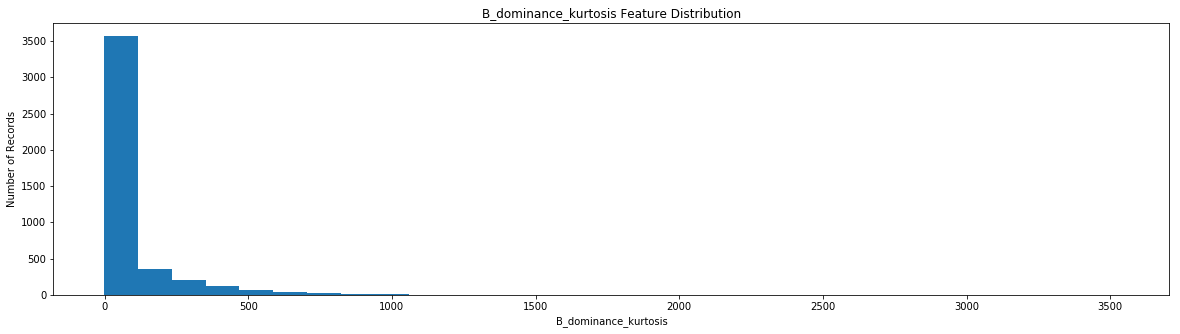

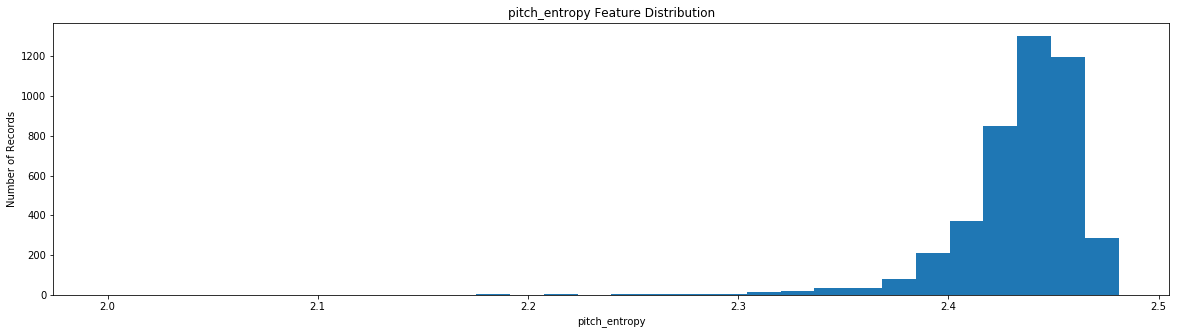

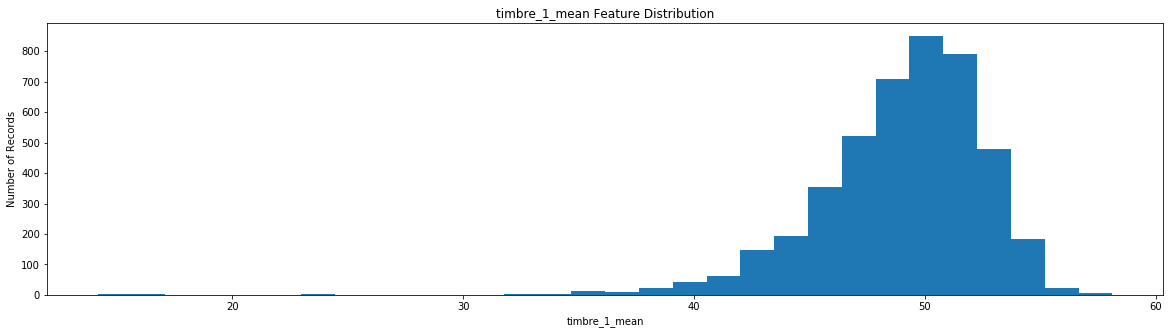

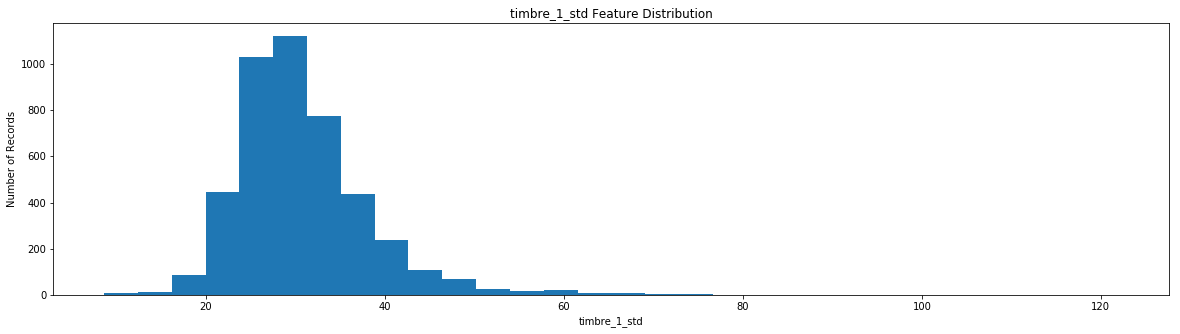

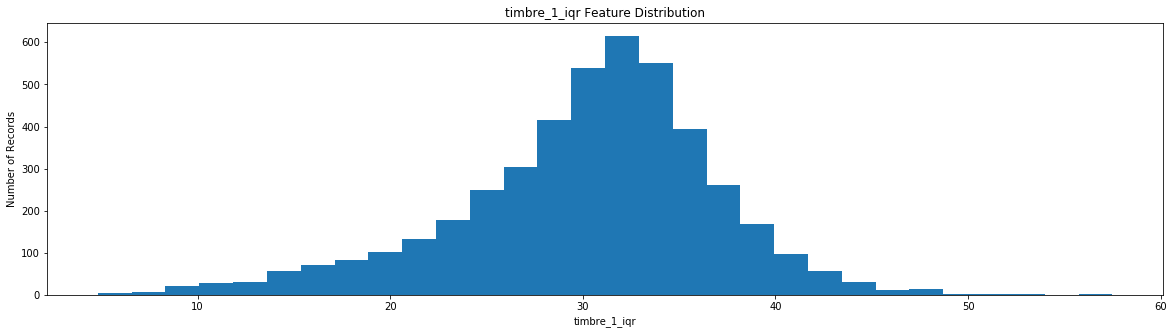

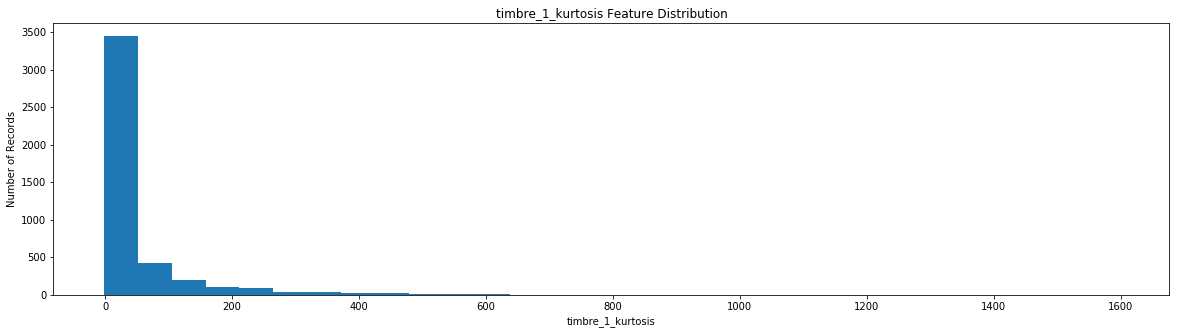

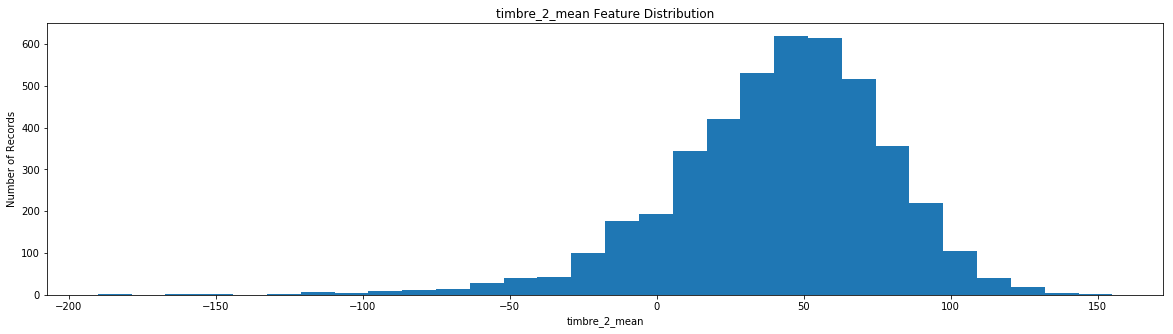

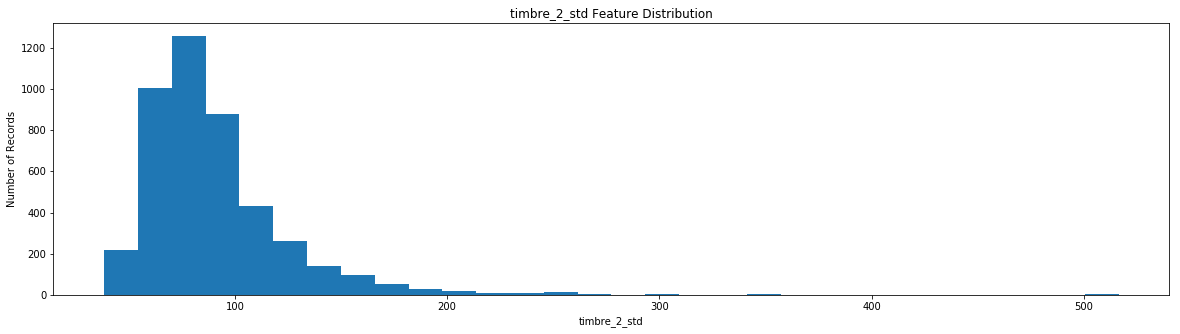

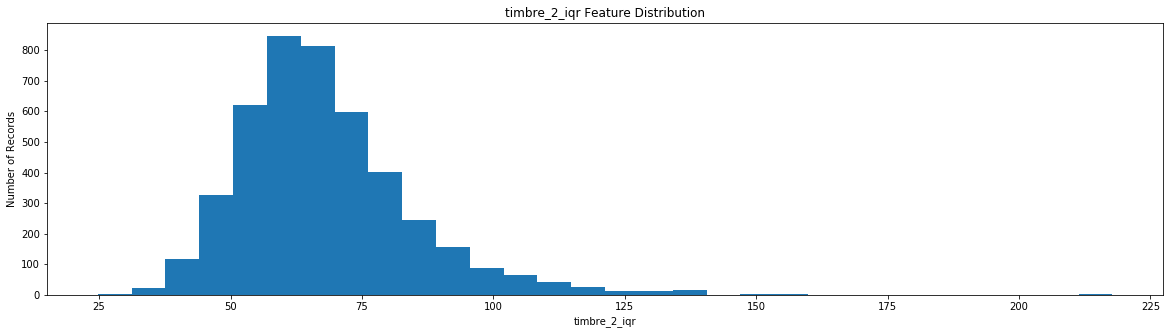

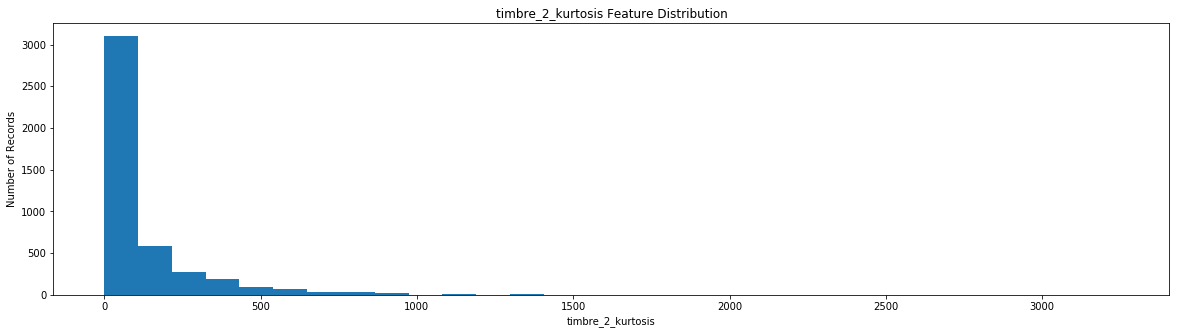

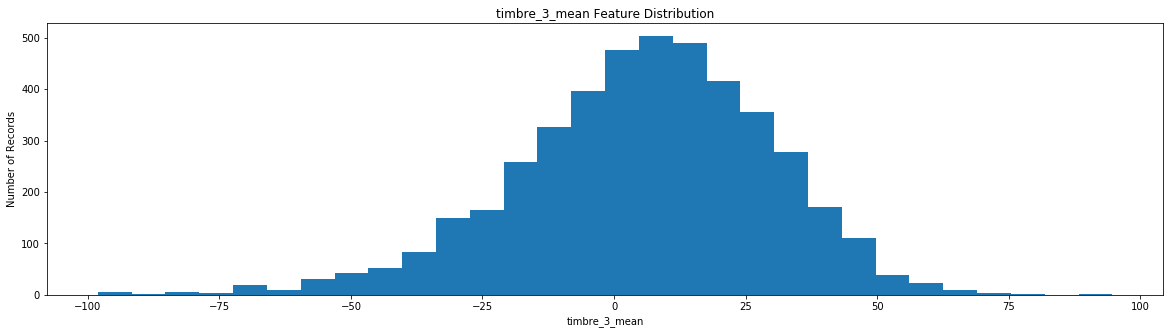

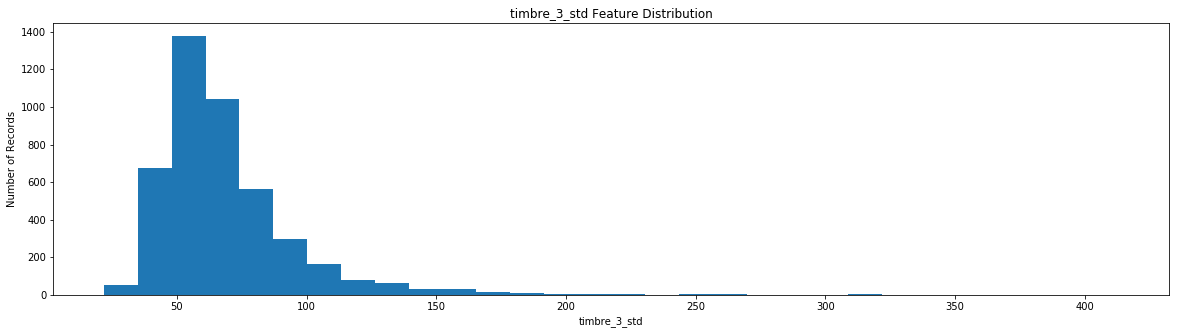

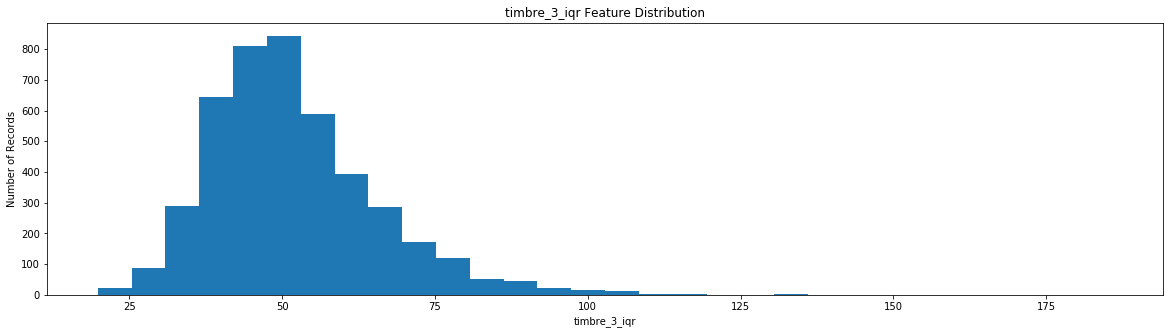

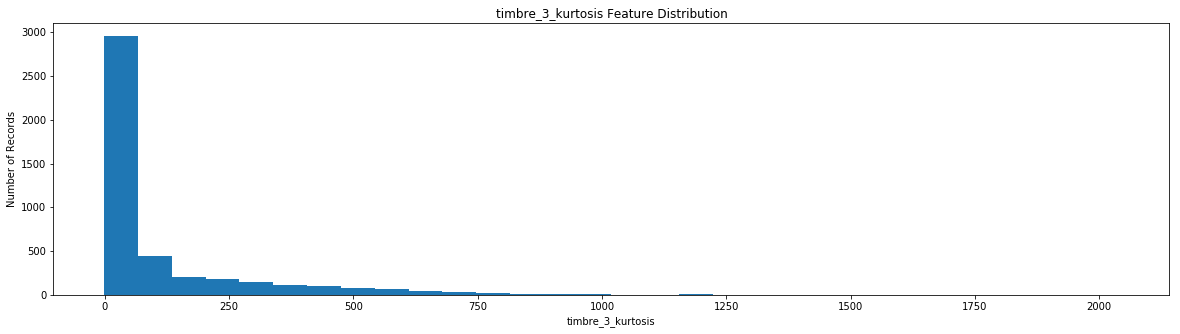

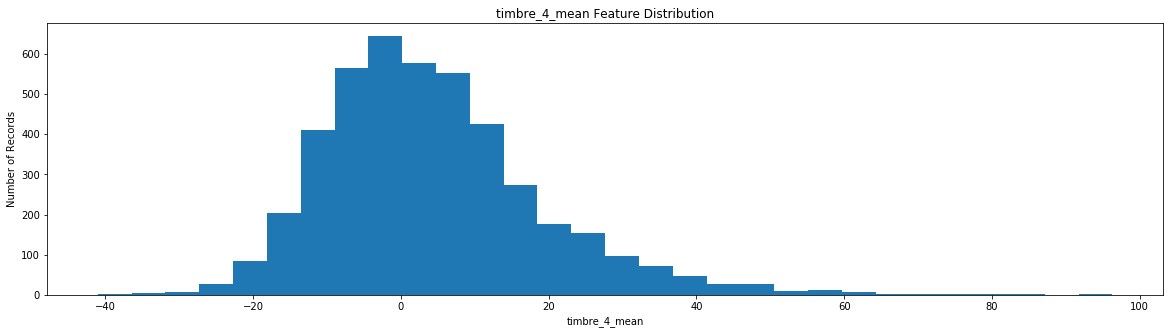

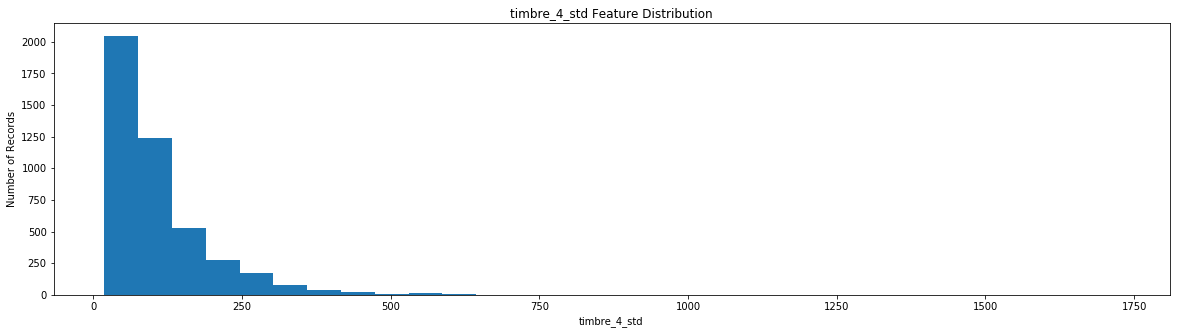

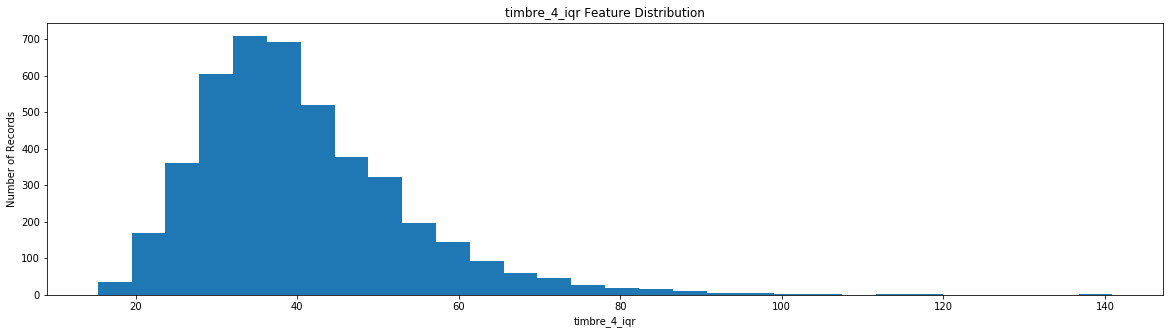

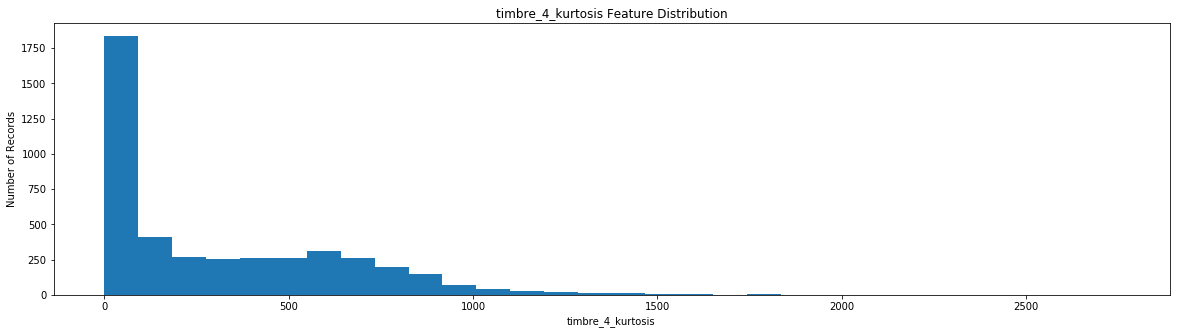

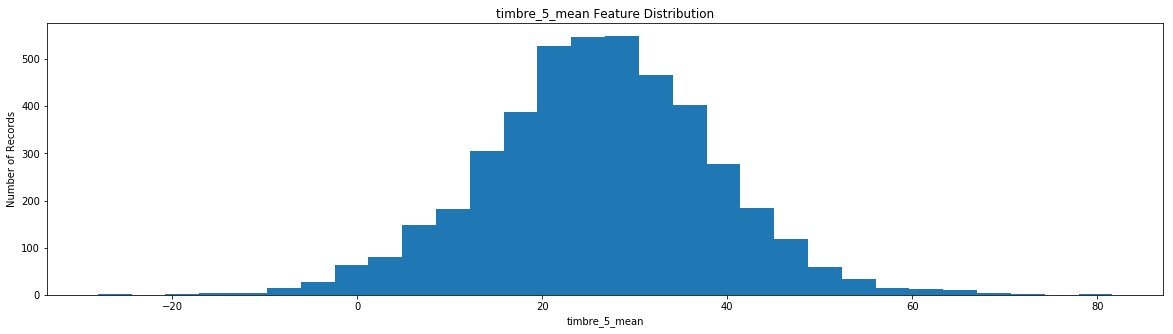

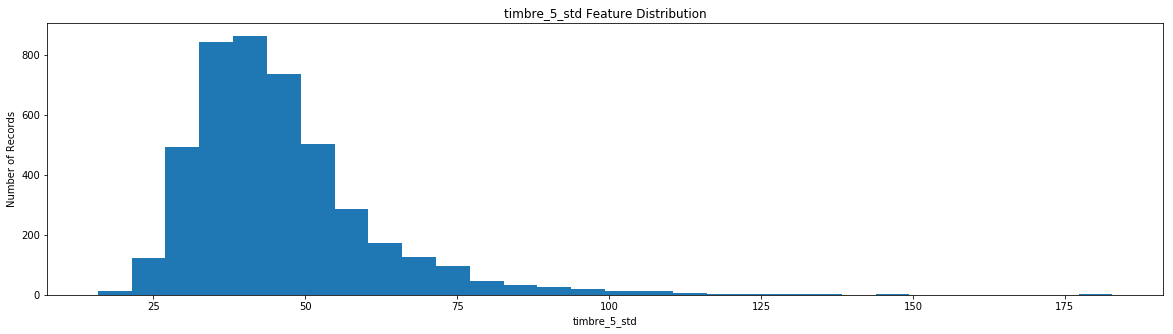

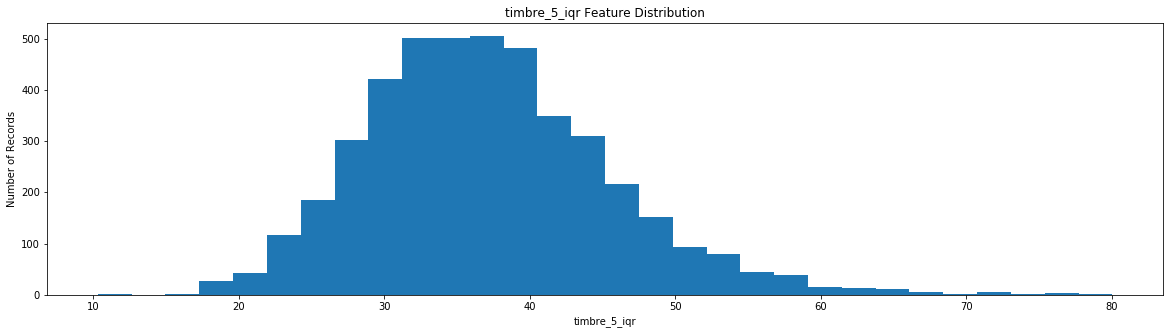

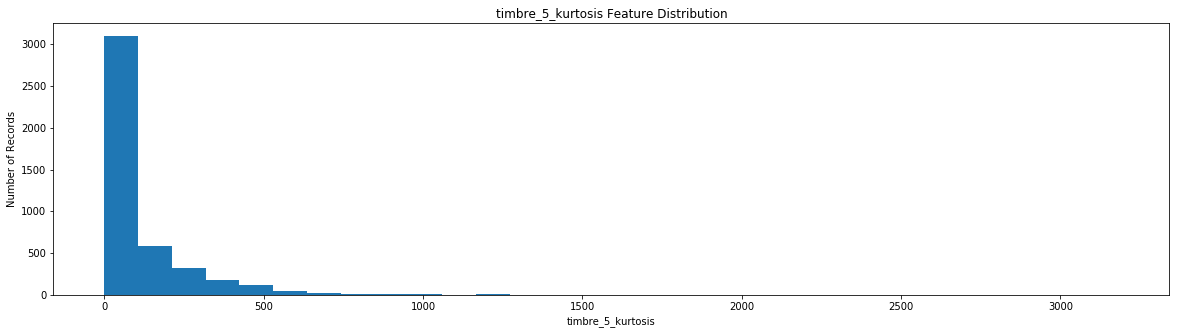

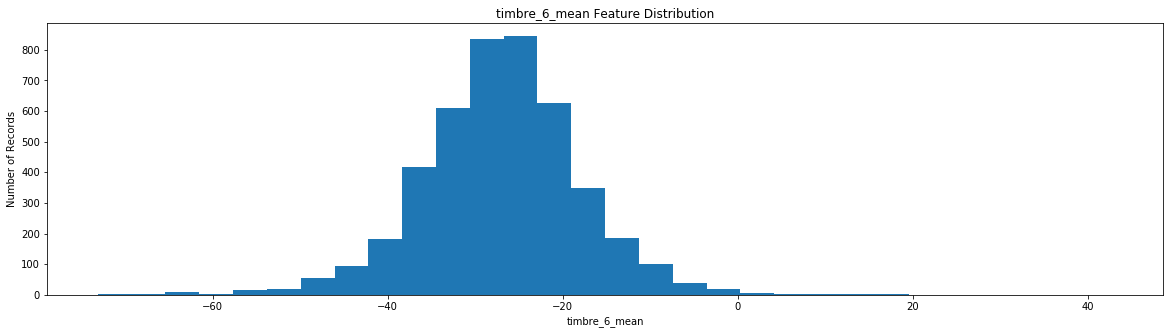

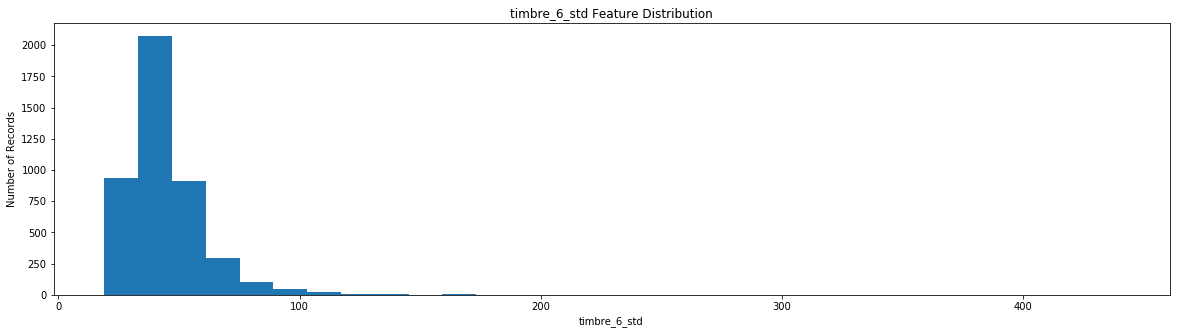

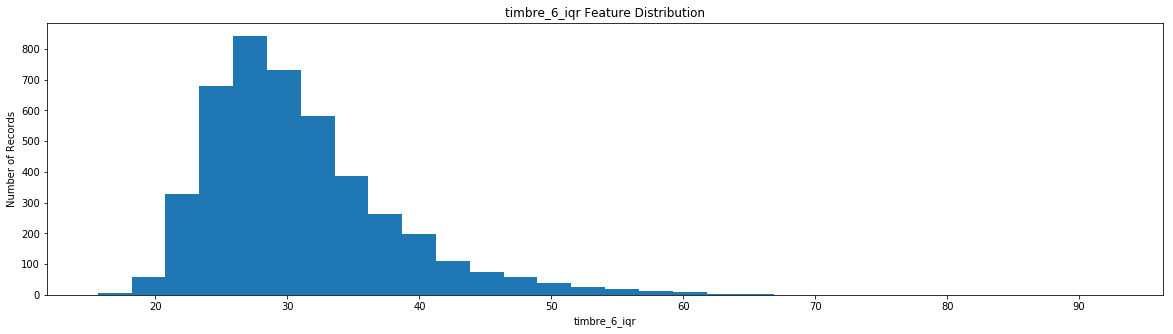

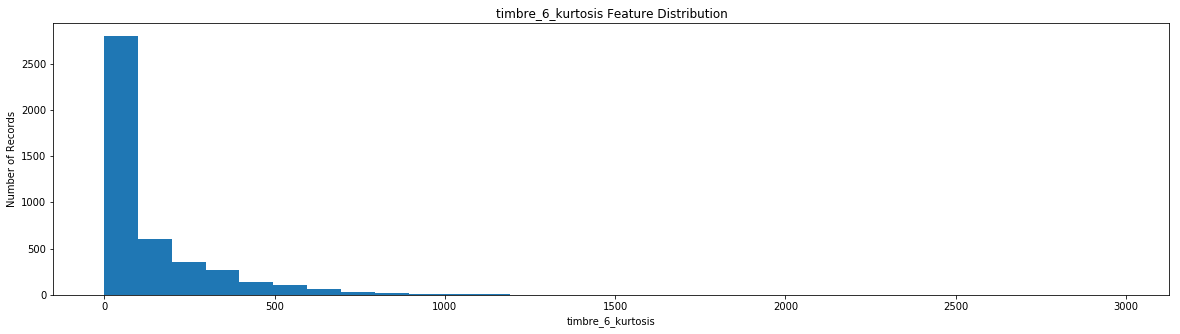

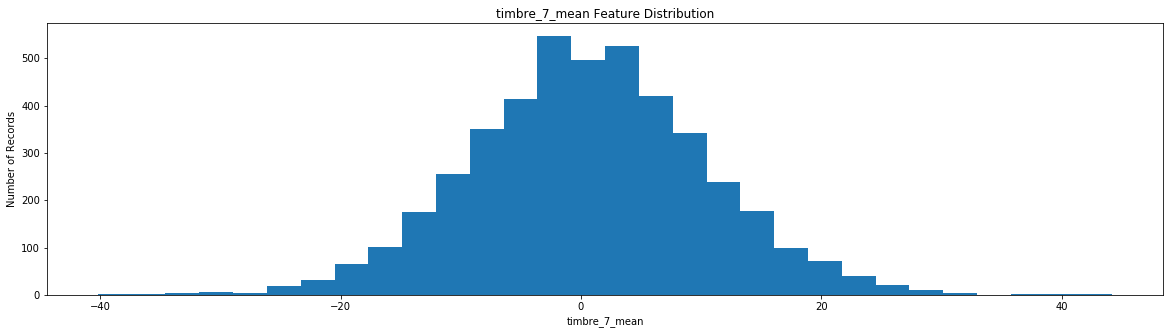

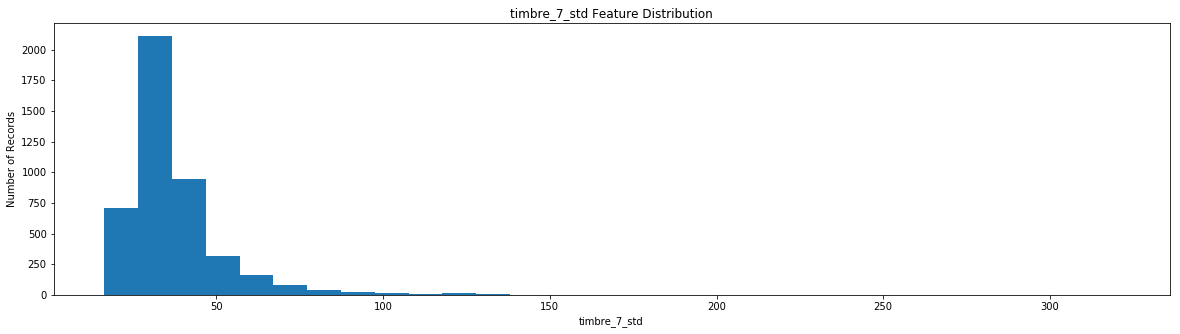

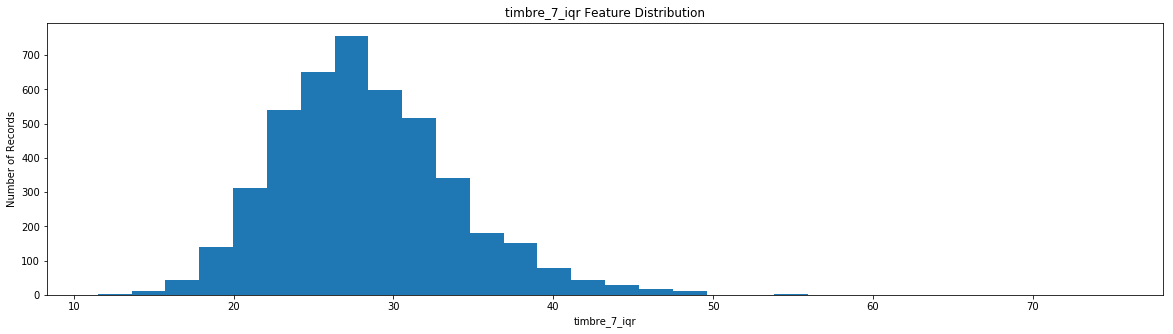

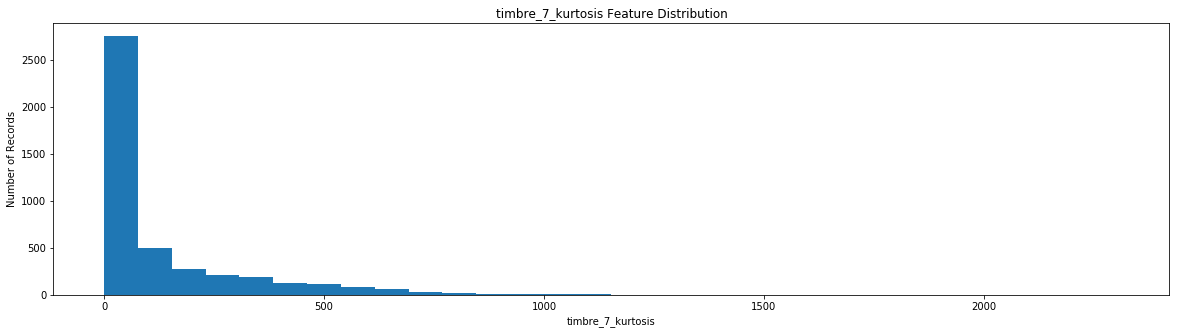

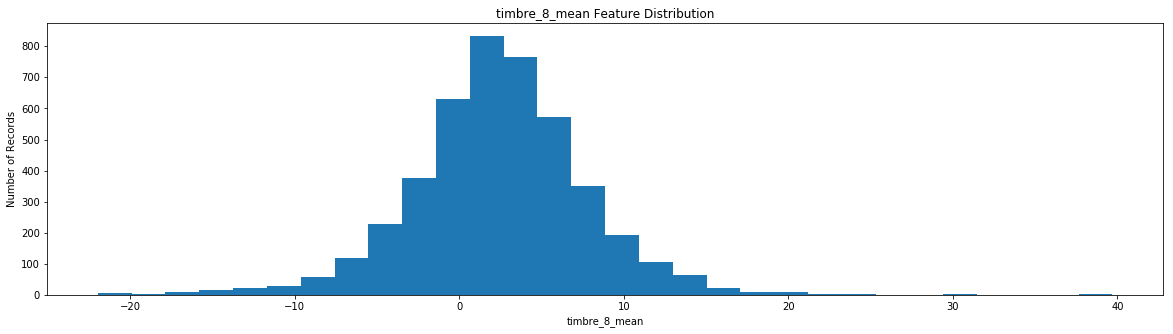

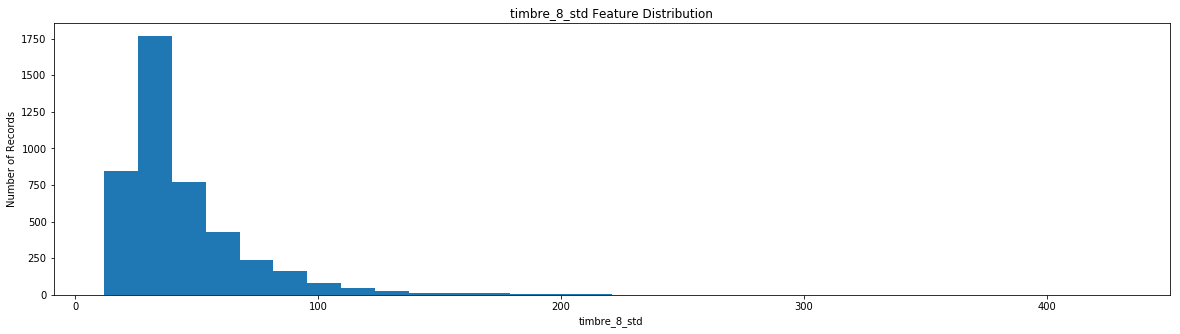

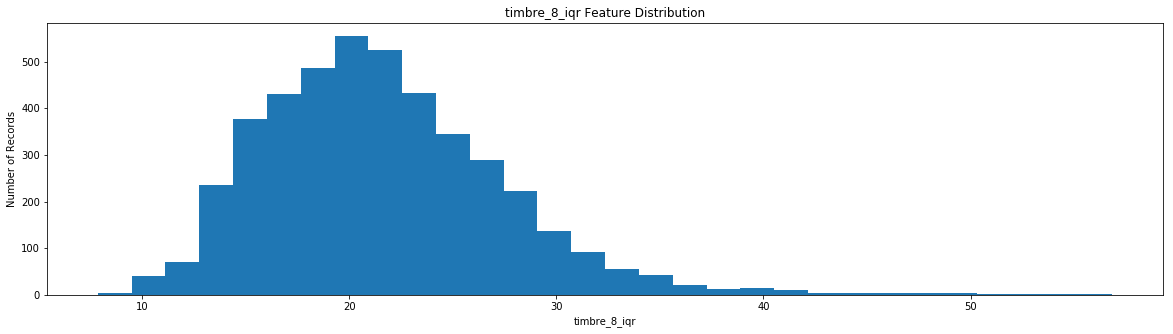

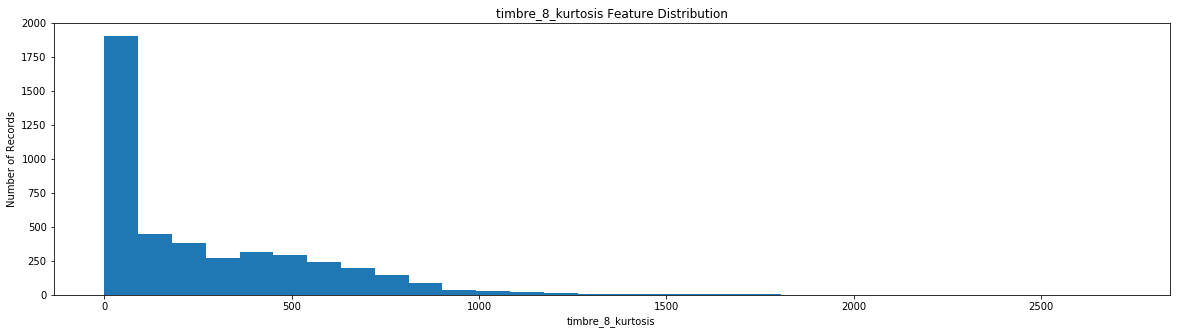

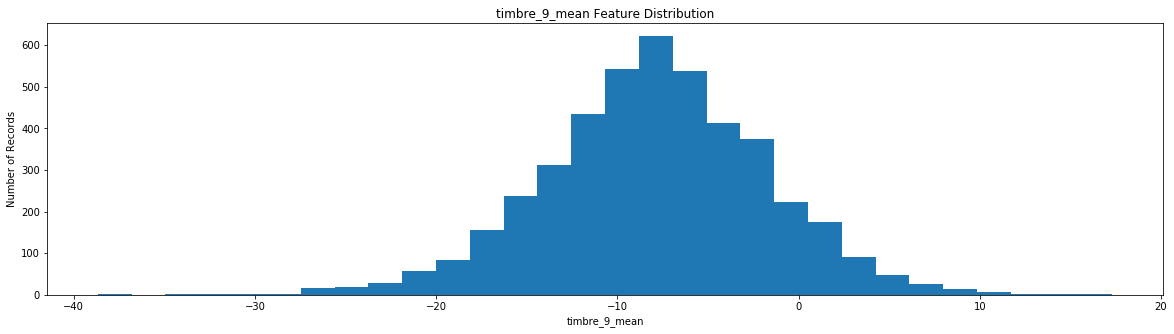

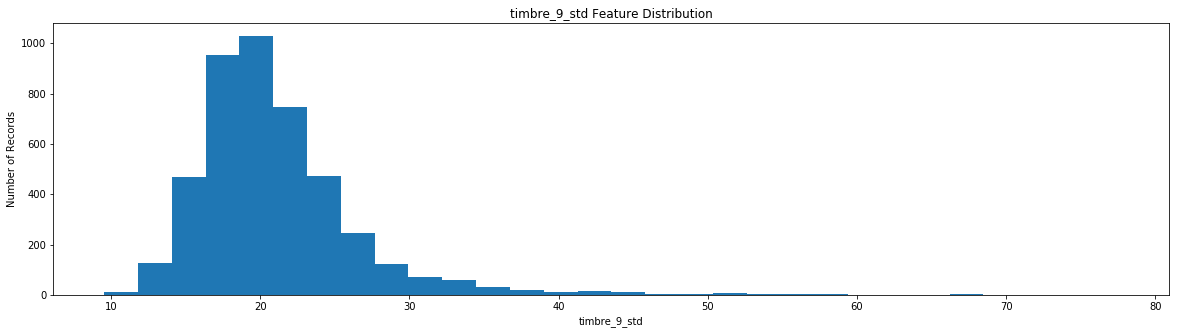

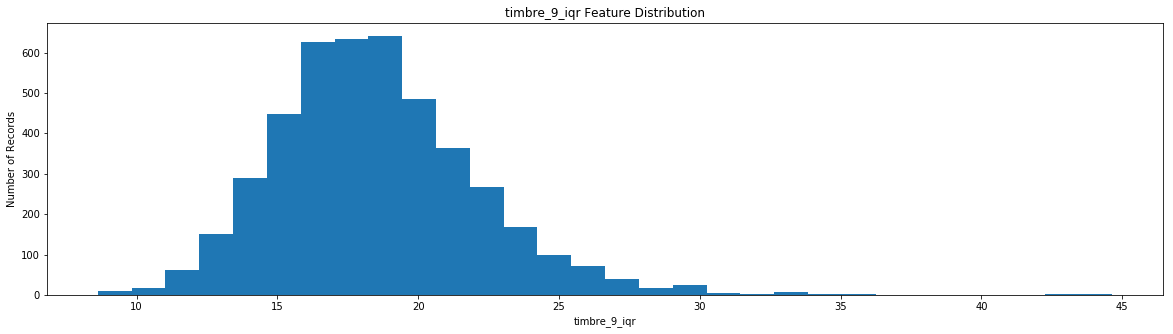

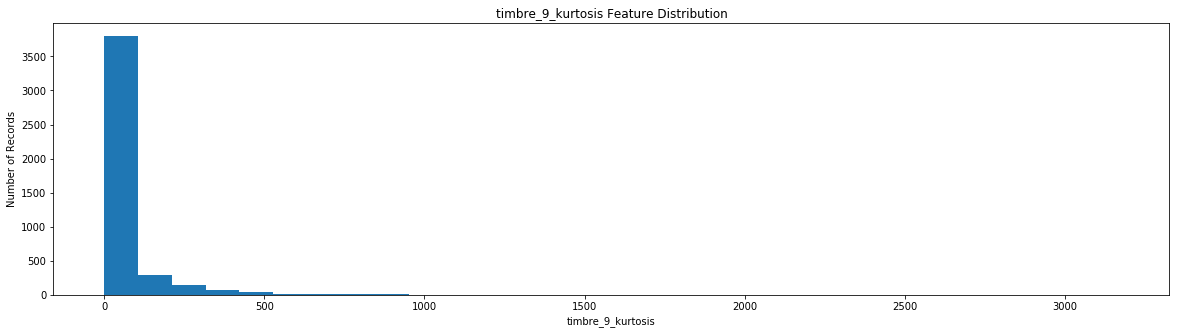

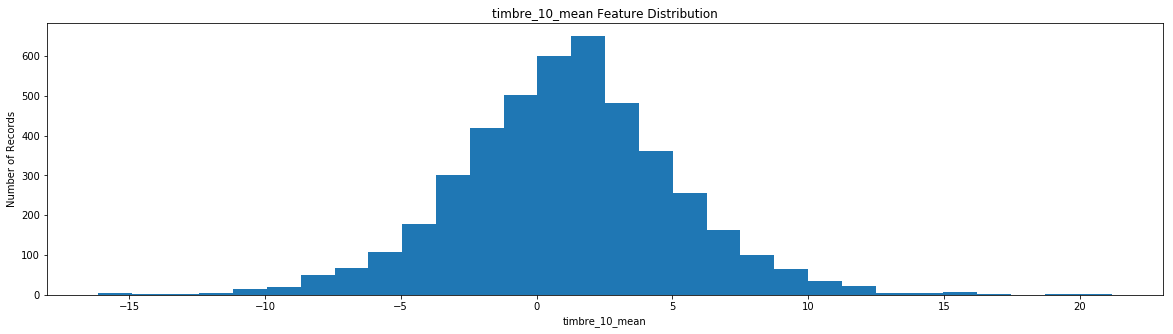

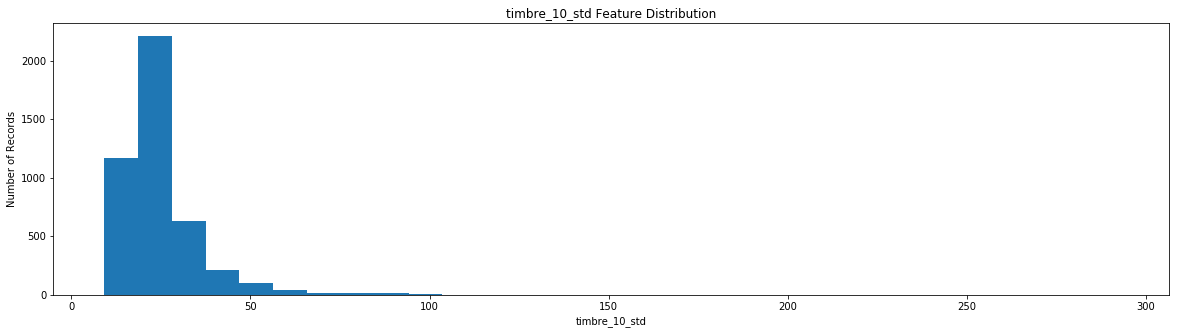

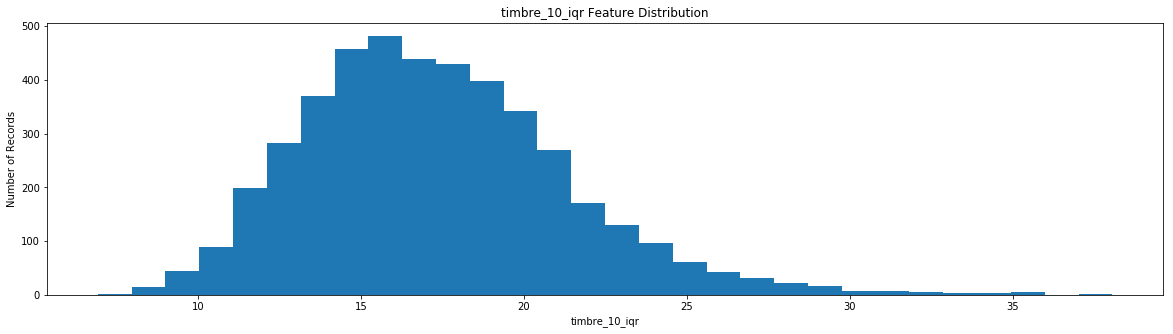

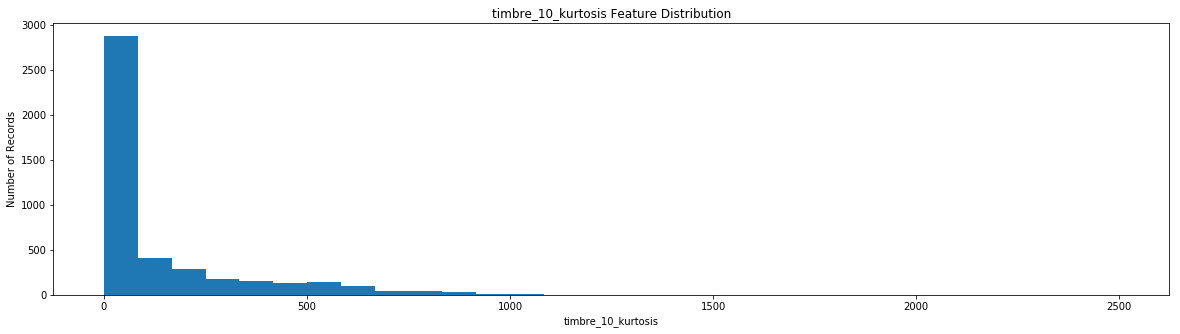

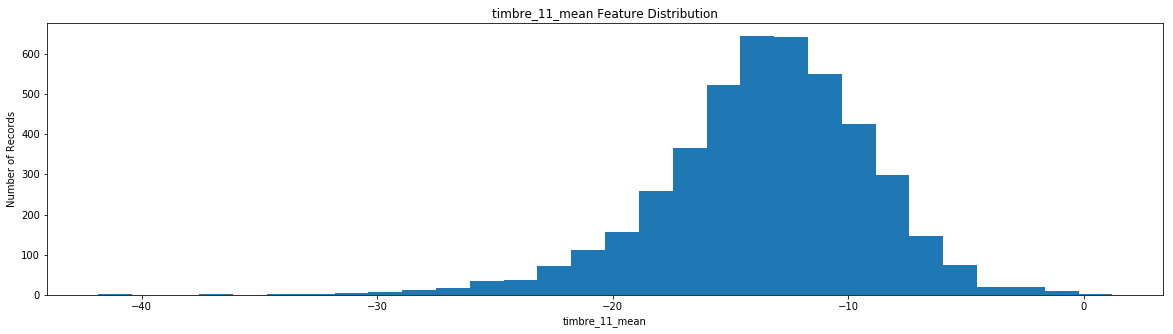

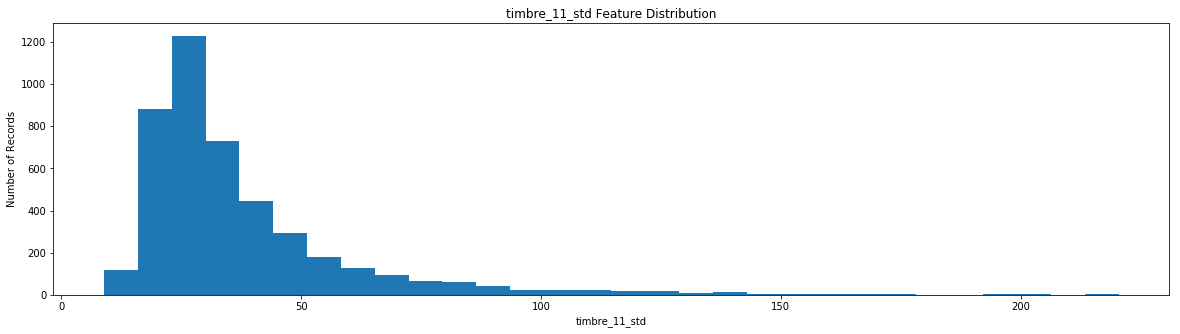

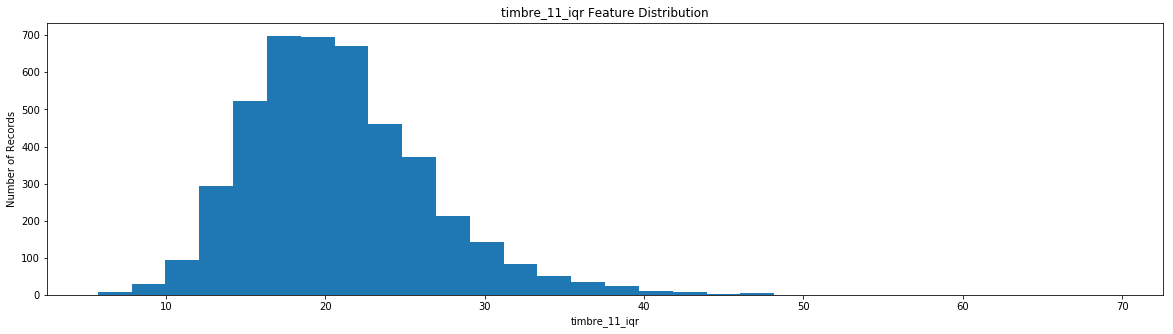

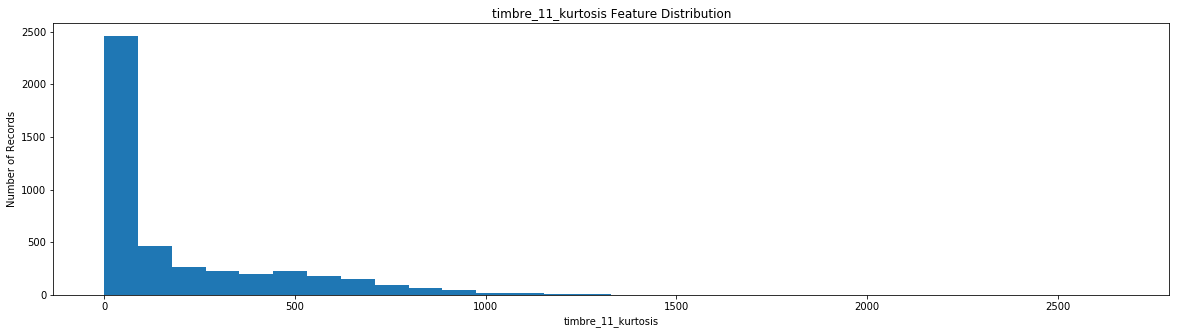

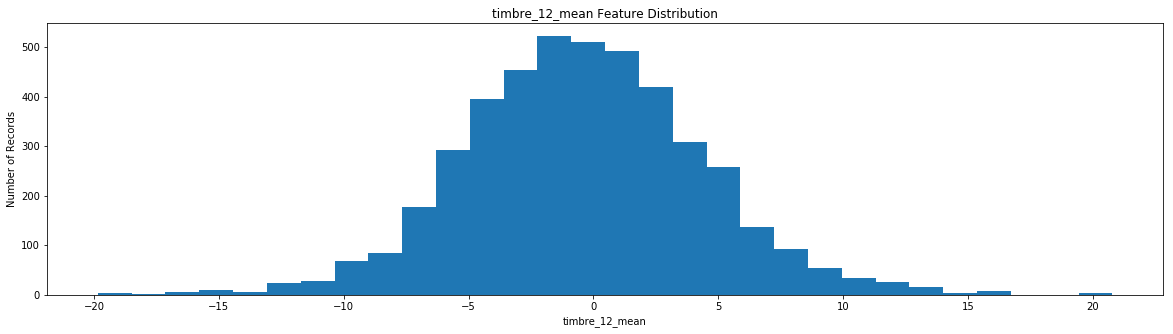

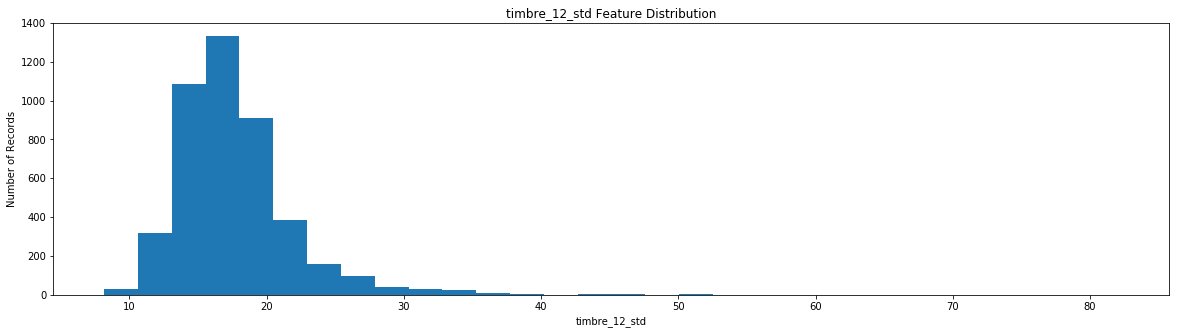

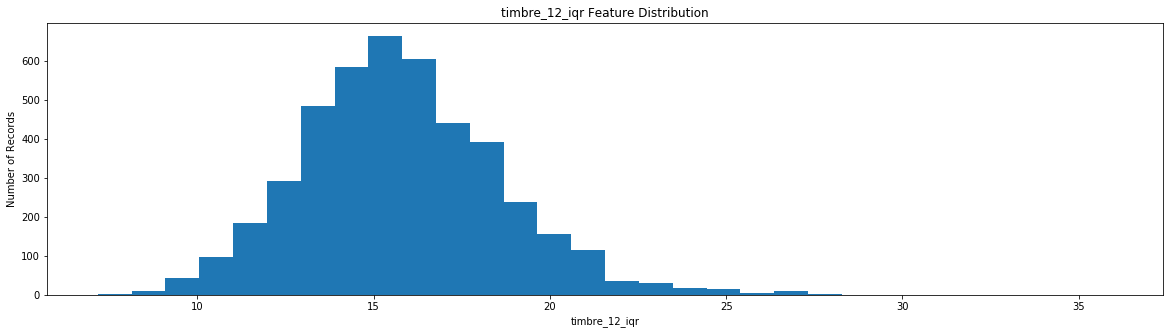

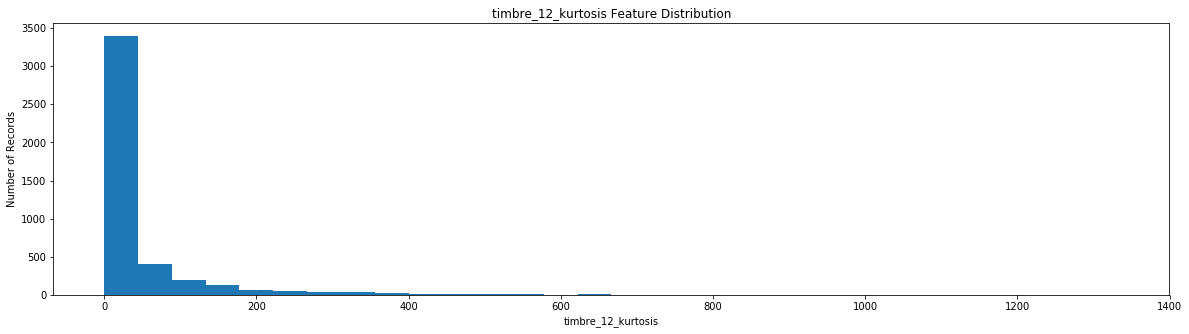

In [642]:
for i in range(0,len(index)):
    plt.figure(figsize = (20,5))
    plt.hist(data1[index[i]], bins=30)
    plt.xlabel(index[i])
    plt.ylabel("Number of Records")
    plt.title(index[i]+" Feature Distribution")

## Transform skewed features
From the histogram shown above, we are able to observe that some of features are skewed. We will preprocess these features by applying logarithmic transformation. 
Features that will be transformed will be as follow. 
- artist_followers
- confidence_kurtosis
- loudness_std
- loudness_kurtosis
- tempo_kurtosis
- tempo_confidence
- key_kurtosis
- key_confidence_kurtosis
- mode_kurtosis
- mode_confidence_kurtosis
- time_signature_mean
- time_signature_kurtosis
- time_signature_confidence_mean
- time_signature_confidence_kurtosis
- C_dominance_std
- C_dominance_kurtosis
- C#_dominance_std
- C#_dominance_kurtosis
- D_dominance_std
- D_dominance_kurtosis
- D#_dominance_std
- D#_dominance_kurtosis
- E_dominance_std
- E_dominance_kurtosis
- F_dominance_std
- F_dominance_kurtosis
- F#_dominance_std
- F#_dominance_kurtosis
- G_dominance_std
- G_dominance_kurtosis
- G#_dominance_std
- G#_dominance_kurtosis
- A_dominance_std
- A_dominance_kurtosis
- A#_dominance_std
- A#_dominance_kurtosis
- B_dominance_std
- B_dominance_kurtosis
- pitch_entropy
- timbre_1_std
- timbre_1_kurtosis
- timbre_2_std
- timbre_2_kurtosis
- timbre_3_std
- timbre_3_kurtosis
- timbre_4_std
- timbre_4_kurtosis
- timbre_5_std
- timbre_5_kurtosis
- timbre_6_std
- timbre_6_kurtosis
- timbre_7_std
- timbre_7_kurtosis
- timbre_8_std
- timbre_8_kurtosis
- timbre_9_std
- timbre_9_kurtosis
- timbre_10_std
- timbre_10_kurtosis
- timbre_11_std
- timbre_11_kurtosis
- timbre_12_std
- timbre_12_kurtosis

In [5]:
transformation_constants = {}
data_for_transformation = data1[data1.columns[0:len(index)]]
index_for_transformation = ['artist_followers','confidence_kurtosis', \
'loudness_std','loudness_kurtosis','tempo_kurtosis','tempo_confidence','key_kurtosis', \
'key_confidence_kurtosis','mode_kurtosis','mode_confidence_kurtosis','time_signature_mean',\
'time_signature_kurtosis','time_signature_confidence_mean','time_signature_confidence_kurtosis',\
'C_dominance_std','C_dominance_kurtosis','C#_dominance_std','C#_dominance_kurtosis',\
'D_dominance_std','D_dominance_kurtosis','D#_dominance_std','D#_dominance_kurtosis',\
'E_dominance_std','E_dominance_kurtosis','F_dominance_std','F_dominance_kurtosis',\
'F#_dominance_std','F#_dominance_kurtosis','G_dominance_std','G_dominance_kurtosis',\
'G#_dominance_std','G#_dominance_kurtosis','A_dominance_std','A_dominance_kurtosis',\
'A#_dominance_std','A#_dominance_kurtosis','B_dominance_std','B_dominance_kurtosis',\
'pitch_entropy','timbre_1_std','timbre_1_kurtosis','timbre_2_std','timbre_2_kurtosis',\
'timbre_3_std','timbre_3_kurtosis','timbre_4_std','timbre_4_kurtosis','timbre_5_std',\
'timbre_5_kurtosis','timbre_6_std','timbre_6_kurtosis','timbre_7_std','timbre_7_kurtosis',\
'timbre_8_std','timbre_8_kurtosis','timbre_9_std','timbre_9_kurtosis','timbre_10_std',\
'timbre_10_kurtosis','timbre_11_std','timbre_11_kurtosis','timbre_12_std','timbre_12_kurtosis']

for i,item in enumerate(data_for_transformation[data_for_transformation.columns[:]]):
    if item in index_for_transformation:
        if np.min(data_for_transformation[item]) < 0:
            transformation_constants[item] = np.min(data_for_transformation[item])
        else:
            transformation_constants[item]=0
            data_for_transformation[item] = data_for_transformation[item].apply(lambda x: np.log(x+1))
        

display(data_for_transformation.head())

track_popularity  artist_popularity  artist_followers  confidence_mean  \
0                45                 55         11.365944         0.403243   
1                25                 62         12.215919         0.528772   
2                29                 49         12.078796         0.468465   
3                32                 55         11.365944         0.471887   
4                84                 90         16.059405         0.706476   

   confidence_std  confidence_kurtosis  loudness_mean  loudness_std  \
0        0.271824            -1.079708      -2.646263      0.768745   
1        0.437708             3.131753      -3.221914      1.715421   
2        0.380187             0.775991      -1.379139      1.169084   
3        0.303001            -1.016856      -3.126165      0.915931   
4        0.351465            -0.779456      -5.904486      1.793792   

   loudness_kurtosis  tempo_mean         ...          timbre_10_iqr  \
0           0.011863   90.115881         ...              24.000512   
1           5.288548  149.994531         ...              16.180088   
2           2.677295  100.046687         ...              19.020444   
3           0.581027  145.011152         ...              16.900722   
4           0.428284  142.124142         ...              20.104257   

   timbre_10_kurtosis  timbre_11_mean  timbre_11_std  timbre_11_iqr  \
0            1.587338      -13.882033       3.368062      26.550974   
1            1.144577      -10.706984       2.996105      16.015037   
2            5.342299      -16.154033       3.605446      20.566850   
3            2.307969      -13.677807       3.143152      24.962327   
4            4.233983      -16.281398       3.666276      19.987504   

   timbre_11_kurtosis  timbre_12_mean  timbre_12_std  timbre_12_iqr  \
0            1.880612       -1.434159       2.910232      19.522260   
1            3.333563        6.503507       3.019501      17.311120   
2            6.135881        2.814578       2.954963      21.586638   
3            3.418602       -5.675537       2.644923      11.970867   
4            6.544333       -2.330784       2.782647      13.403706   

   timbre_12_kurtosis  
0            4.264414  
1            5.605190  
2            5.967477  
3           23.544235  
4           76.020202  

[5 rows x 130 columns]

When we will predict a songs popularity, we will transform data input as well. Therefore, we save the constants that are used for preprocessing. Below are saved constants.

In [7]:
display(transformation_constants)

{'artist_followers': 0,
 'confidence_kurtosis': -2.0000000279920496,
 'loudness_std': 0,
 'loudness_kurtosis': -2.0000000371773368,
 'tempo_kurtosis': -2.0000000160562226,
 'key_kurtosis': -3.0,
 'key_confidence_kurtosis': -3.0,
 'mode_kurtosis': -3.0,
 'mode_confidence_kurtosis': -3.0,
 'time_signature_mean': 0,
 'time_signature_kurtosis': -2.0000000316929767,
 'time_signature_confidence_mean': 0,
 'time_signature_confidence_kurtosis': -2.0000000447560016,
 'C_dominance_std': 0,
 'C_dominance_kurtosis': -1.098494727614484,
 'C#_dominance_std': 0,
 'C#_dominance_kurtosis': -1.1730407808185928,
 'D_dominance_std': 0,
 'D_dominance_kurtosis': -0.8661536144594697,
 'D#_dominance_std': 0,
 'D#_dominance_kurtosis': -1.0319230816575804,
 'E_dominance_std': 0,
 'E_dominance_kurtosis': -0.4945200885055328,
 'F_dominance_std': 0,
 'F_dominance_kurtosis': -0.4653300715354836,
 'F#_dominance_std': 0,
 'F#_dominance_kurtosis': -0.573266383067176,
 'G_dominance_std': 0,
 'G_dominance_kurtosis': -0.

/Users/kibaekjeong/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


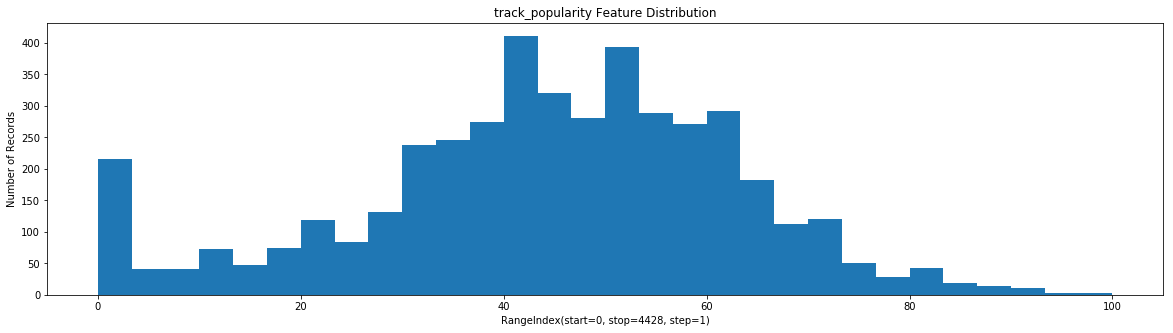

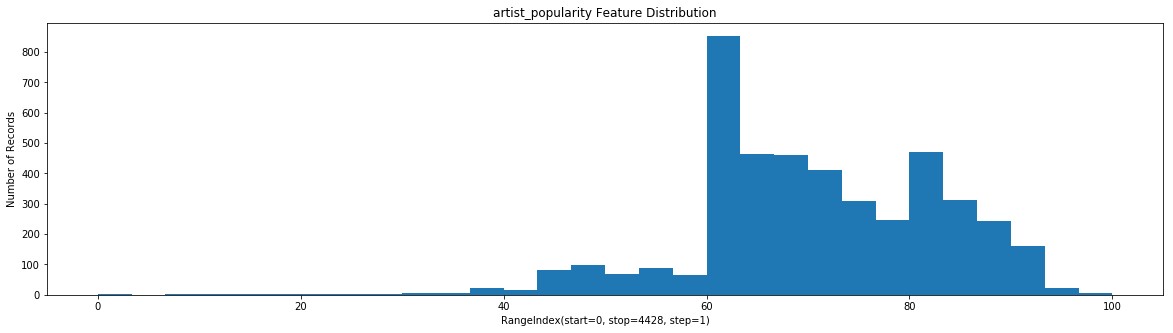

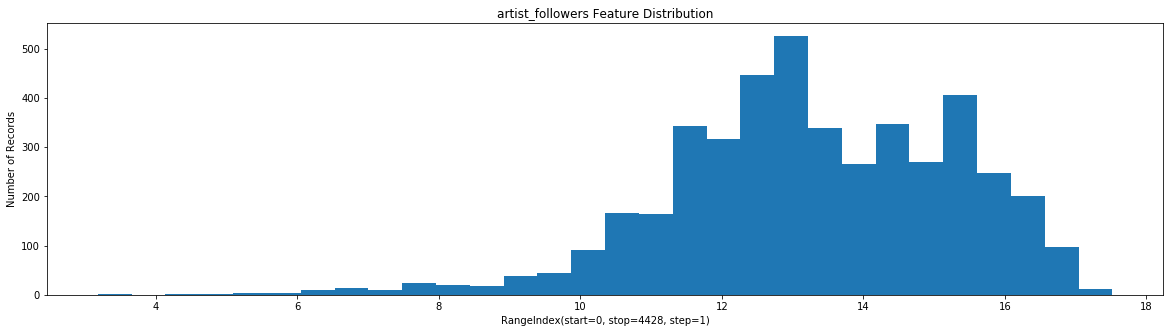

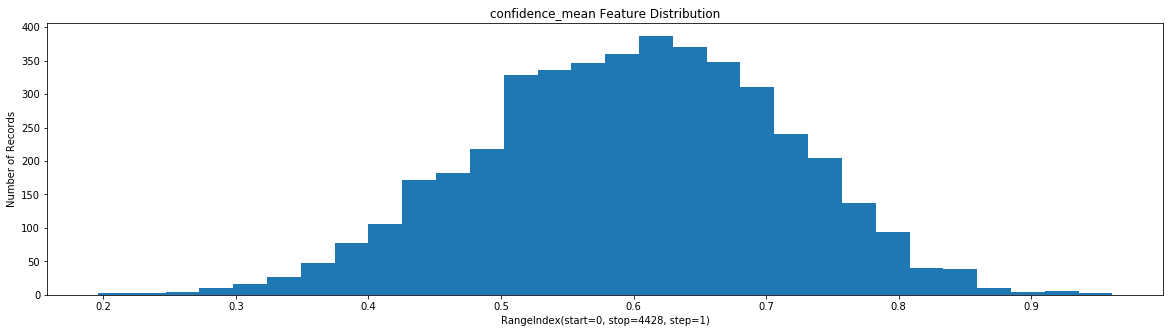

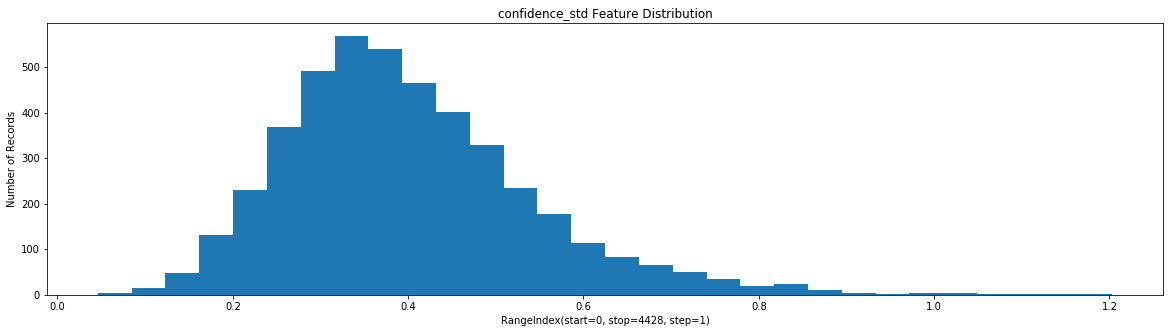

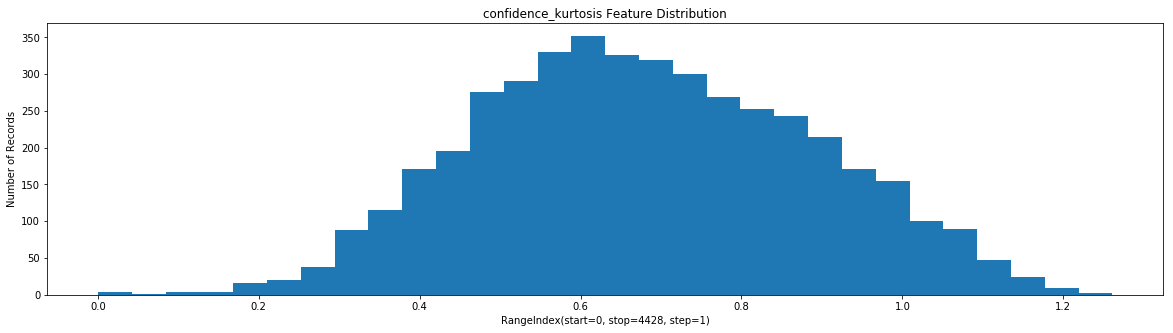

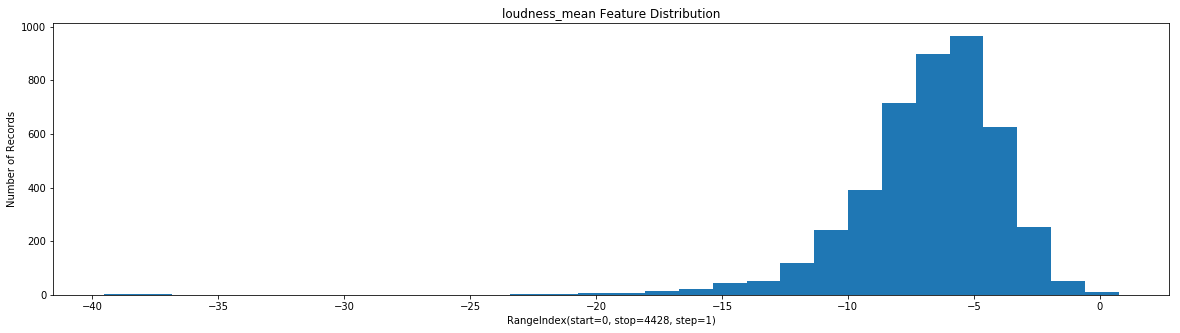

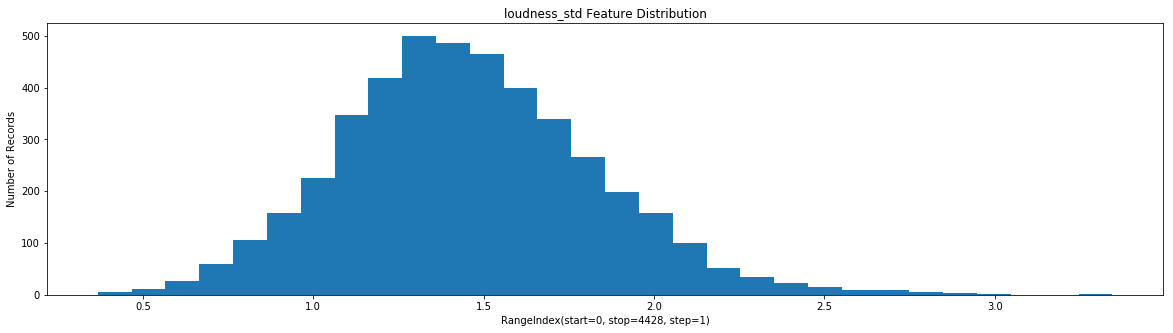

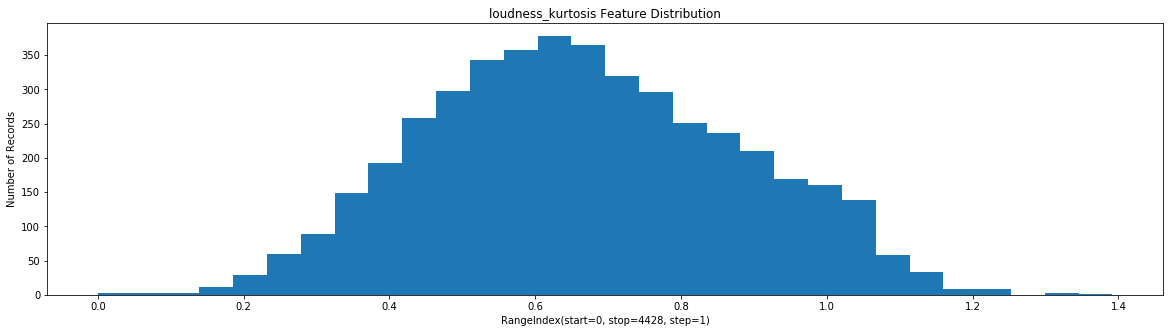

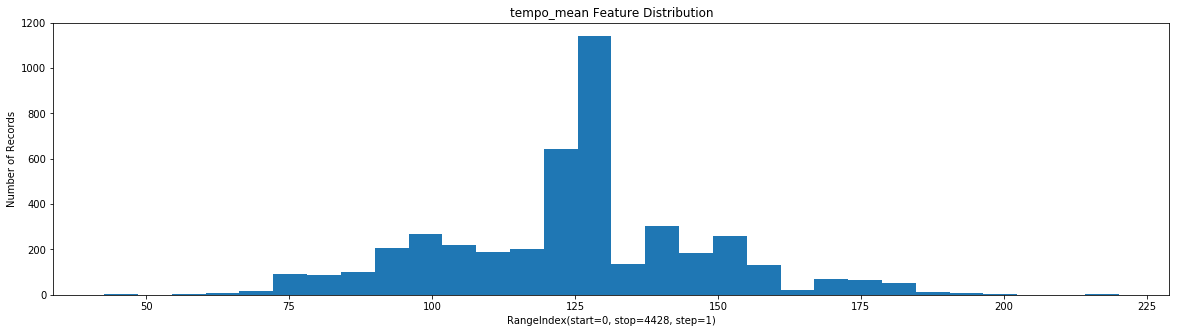

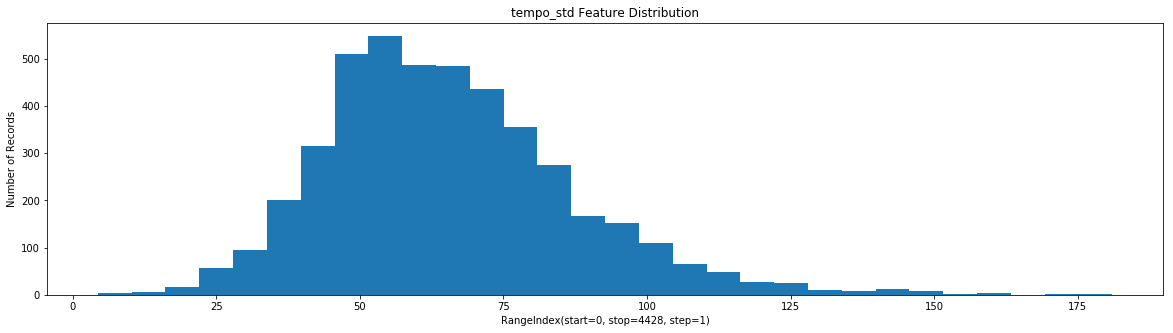

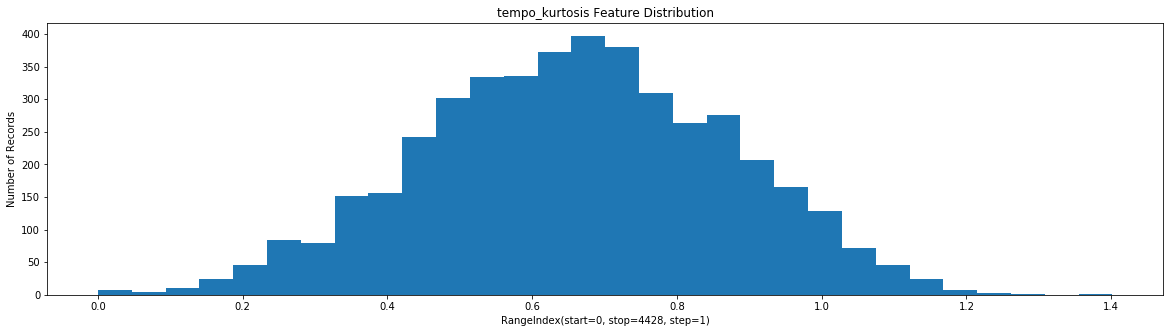

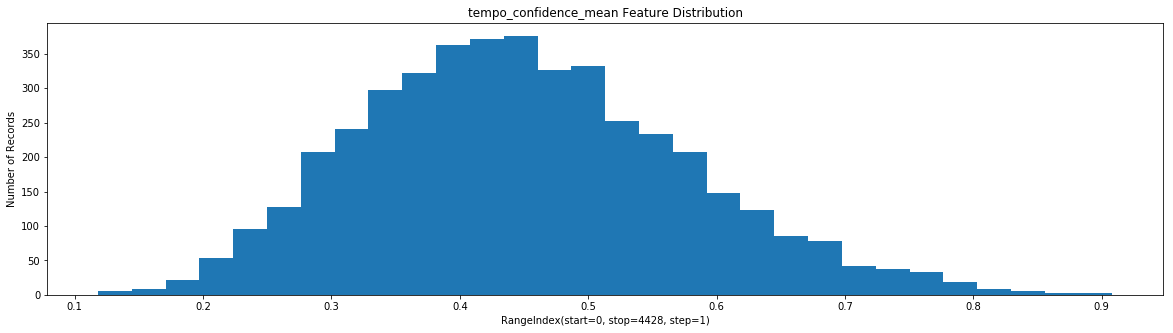

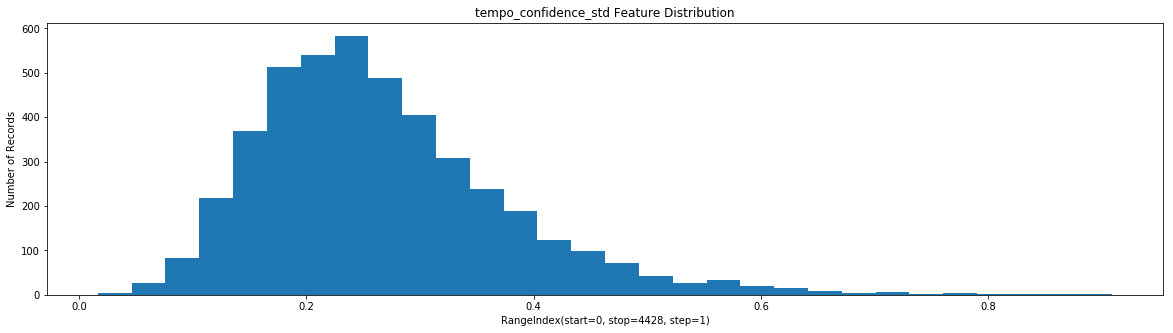

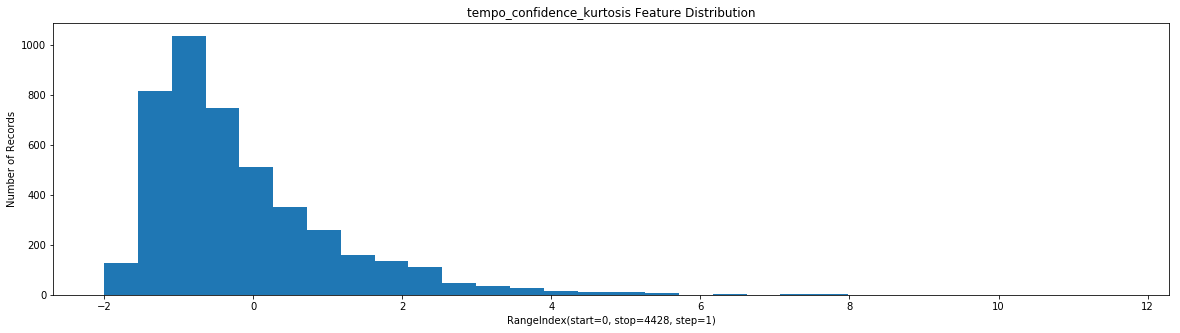

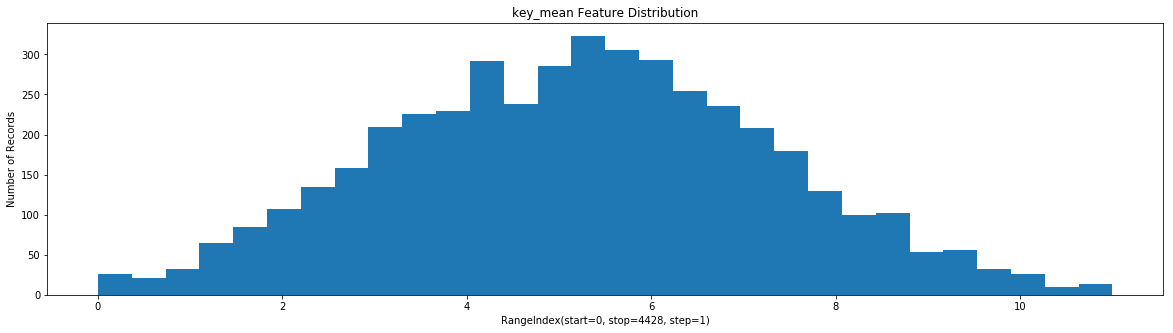

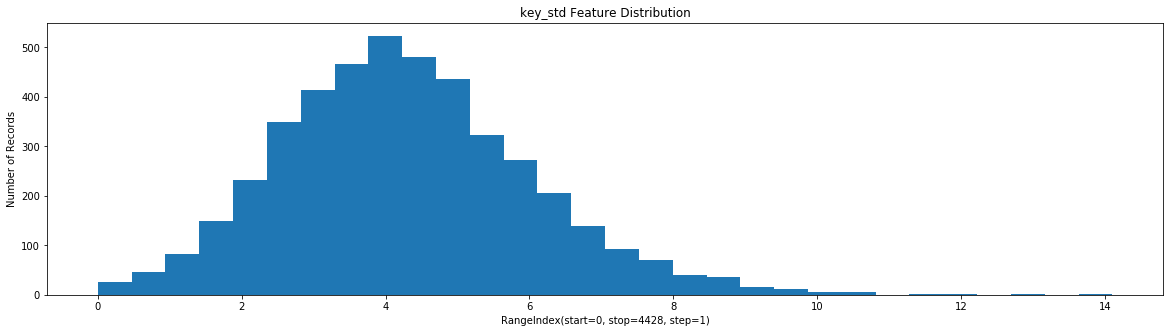

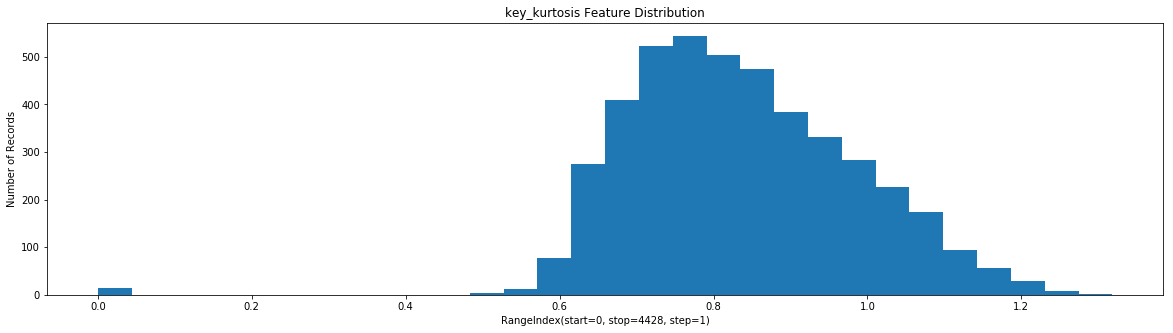

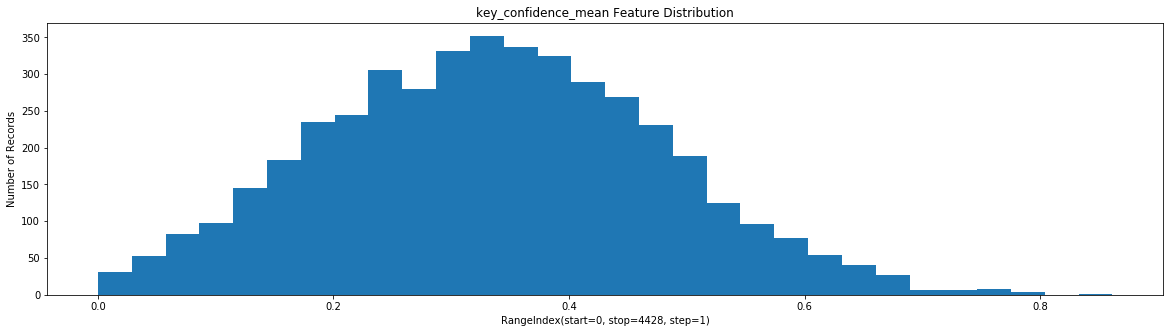

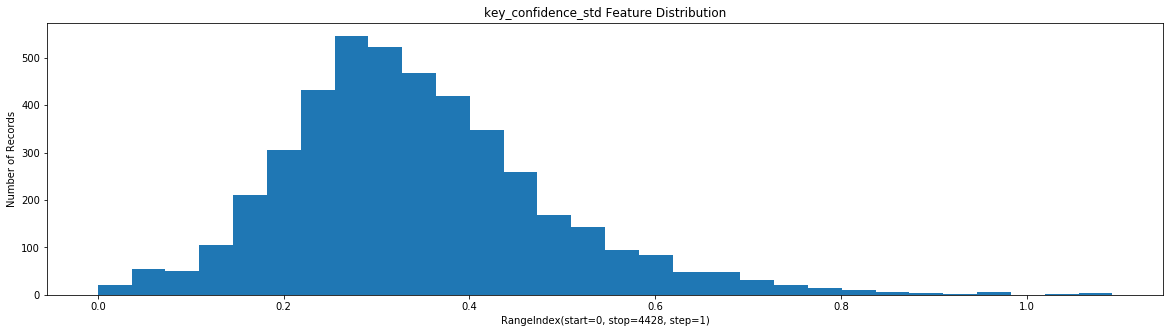

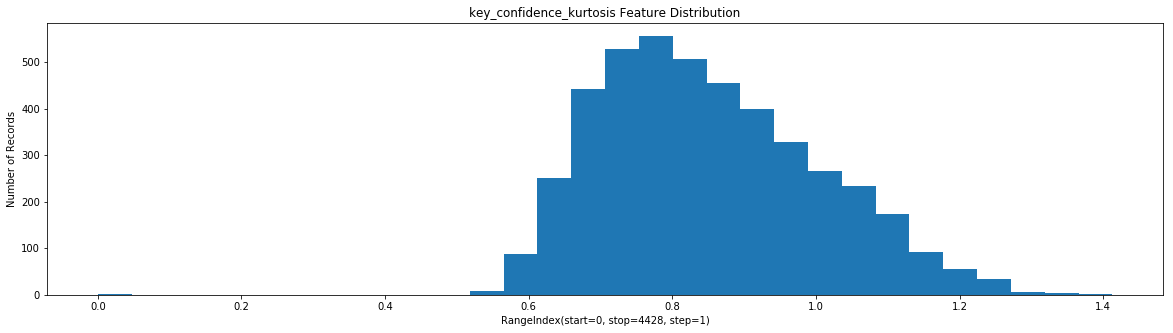

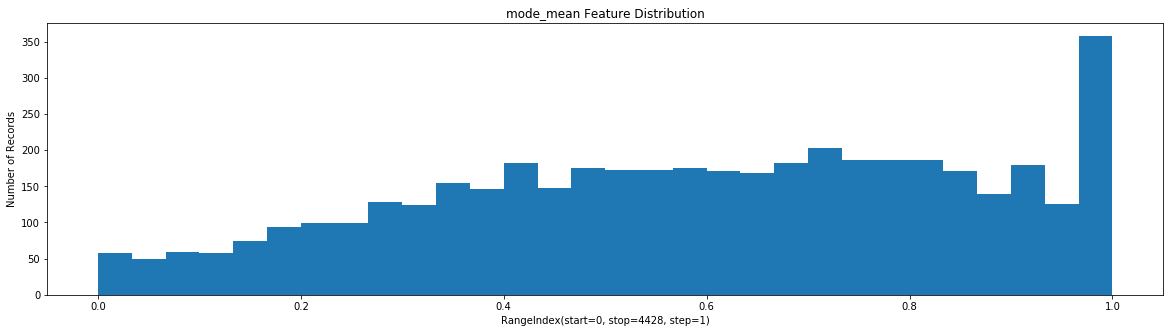

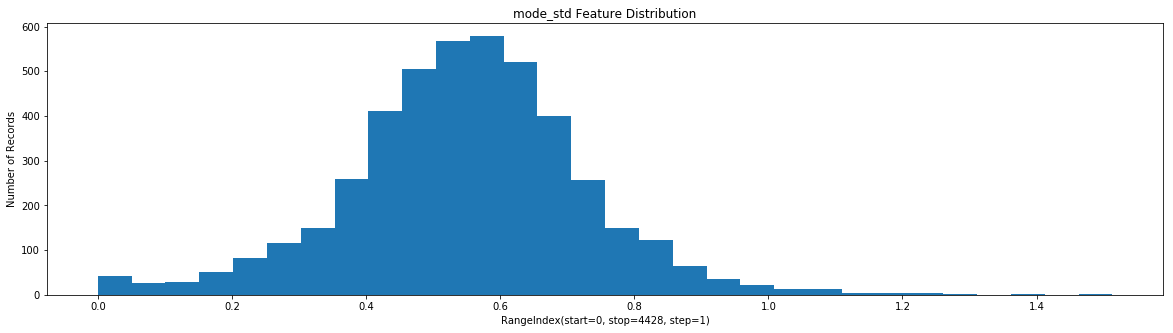

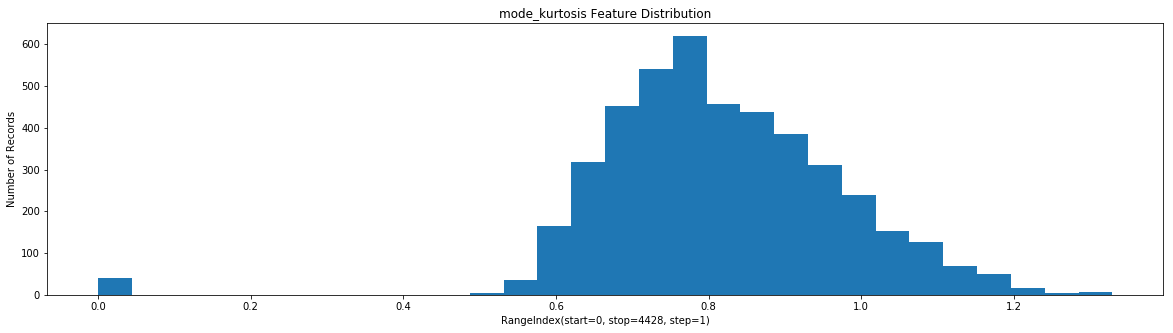

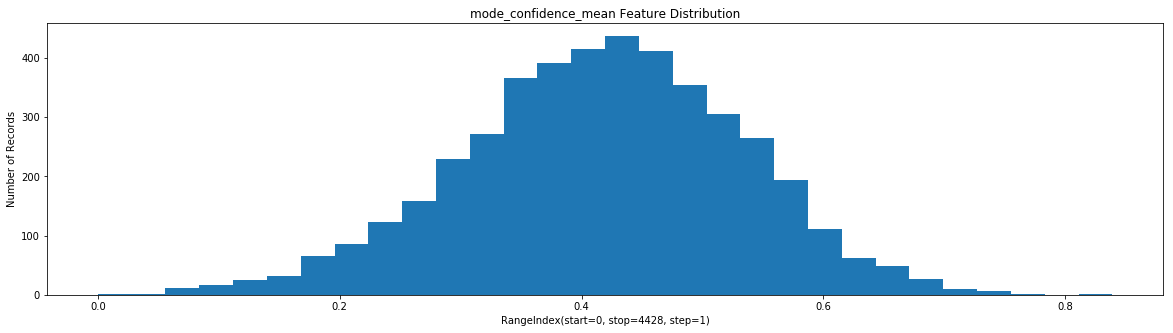

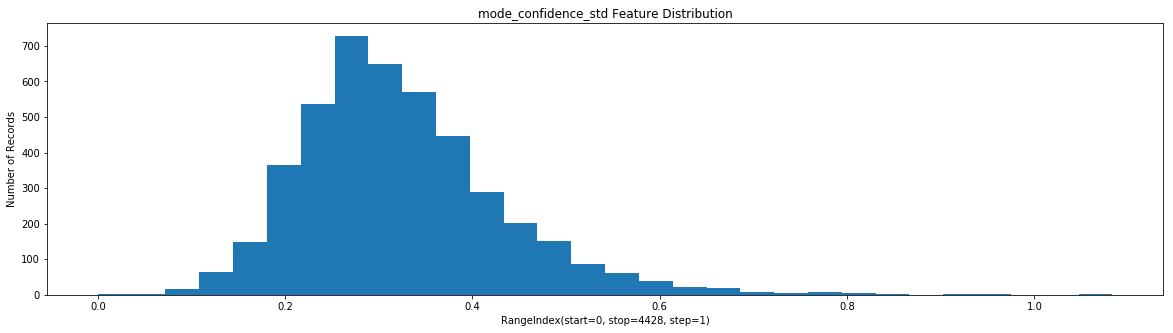

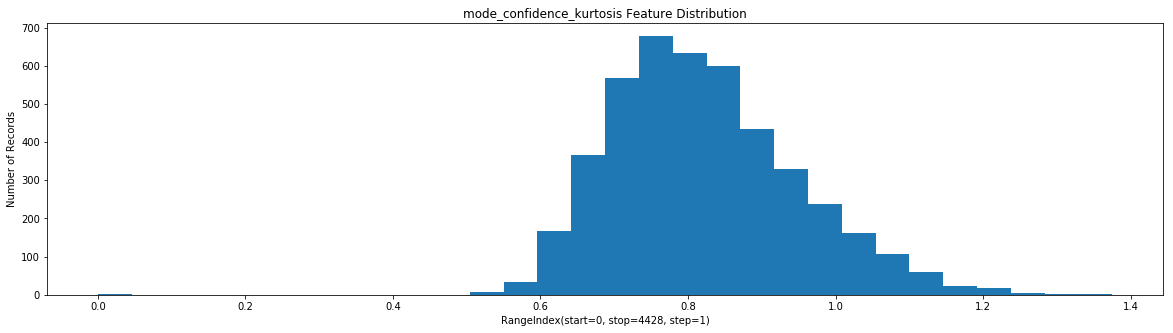

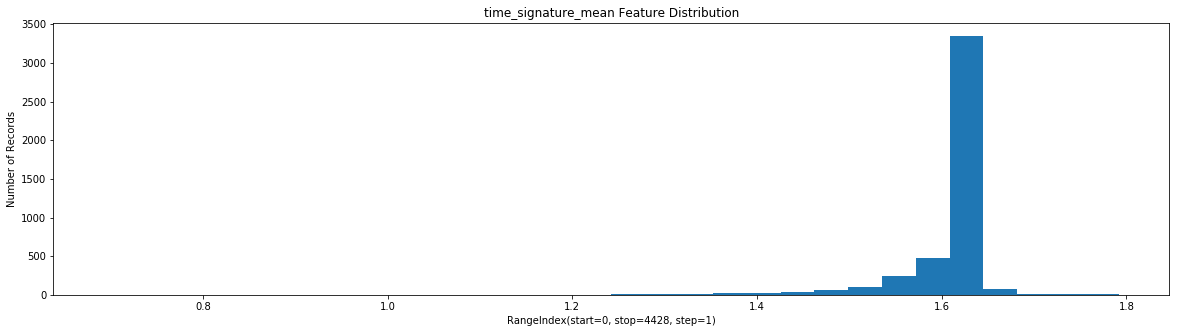

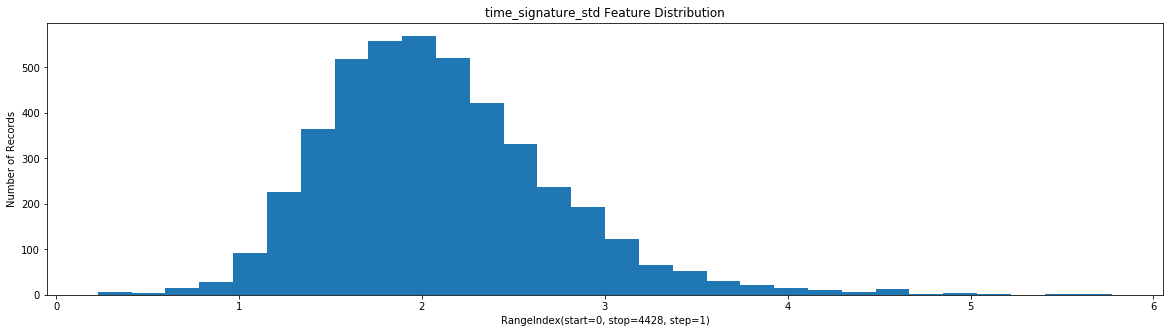

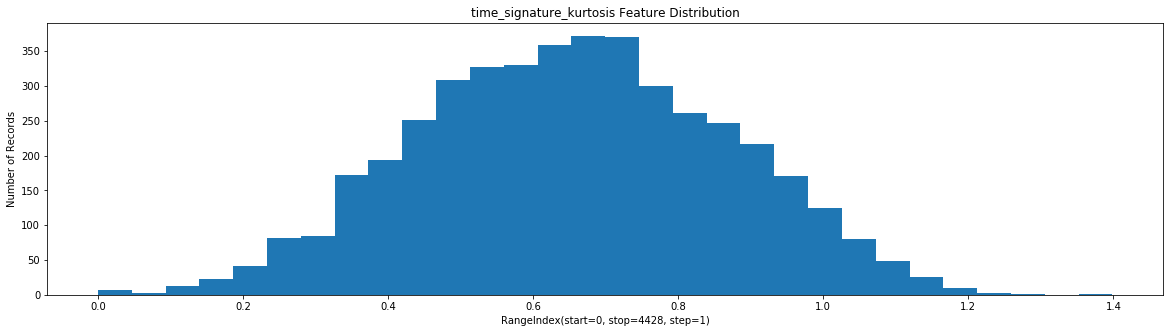

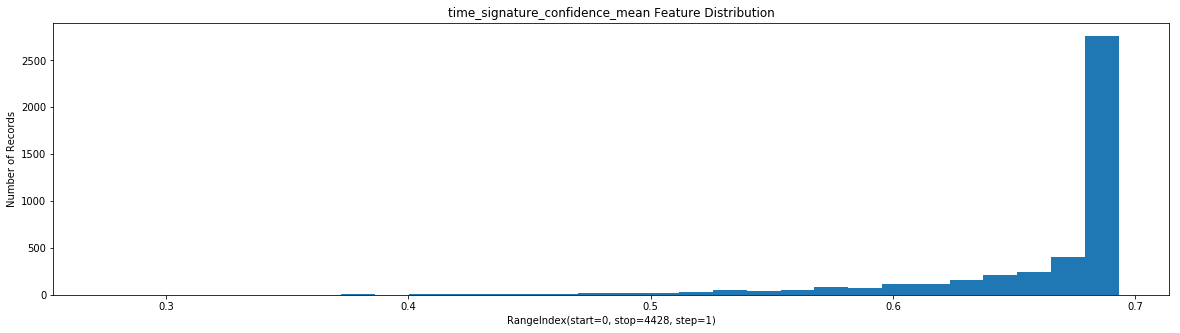

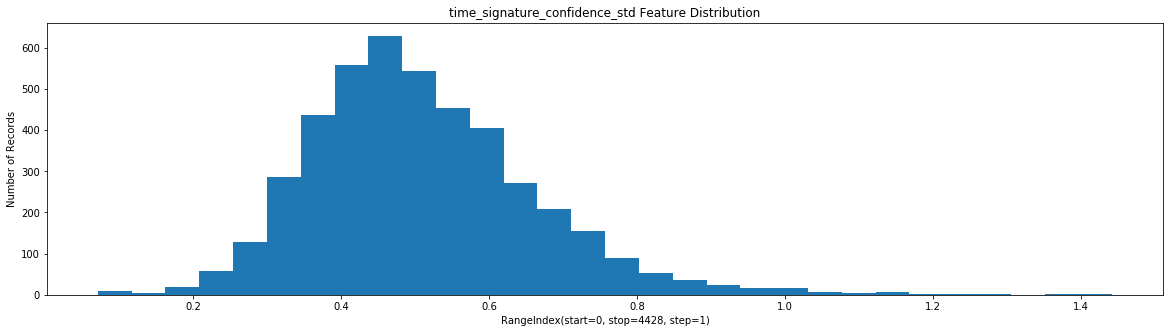

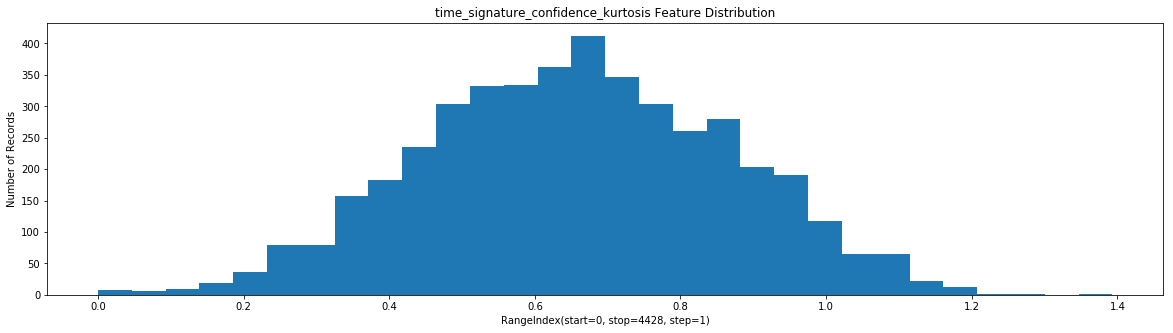

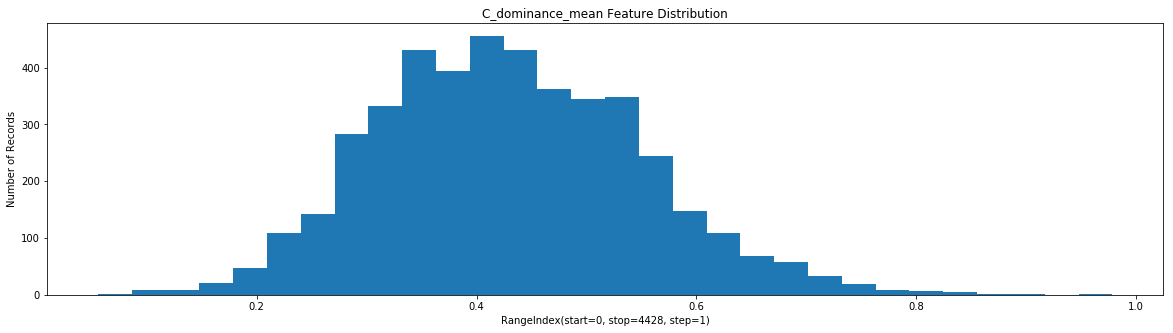

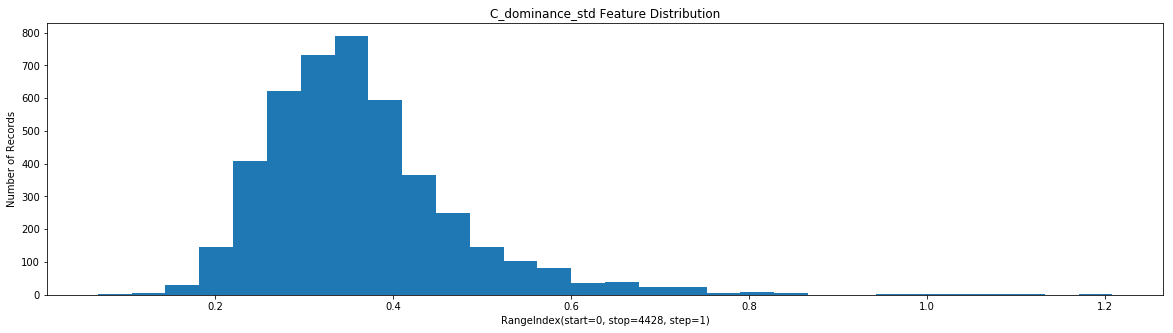

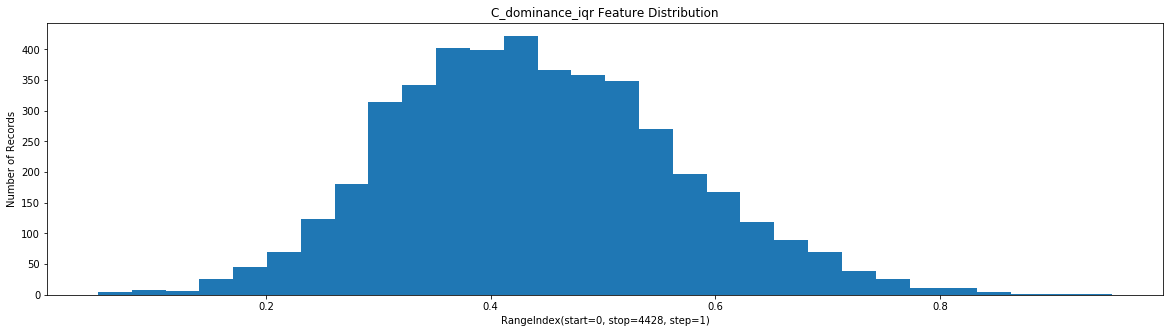

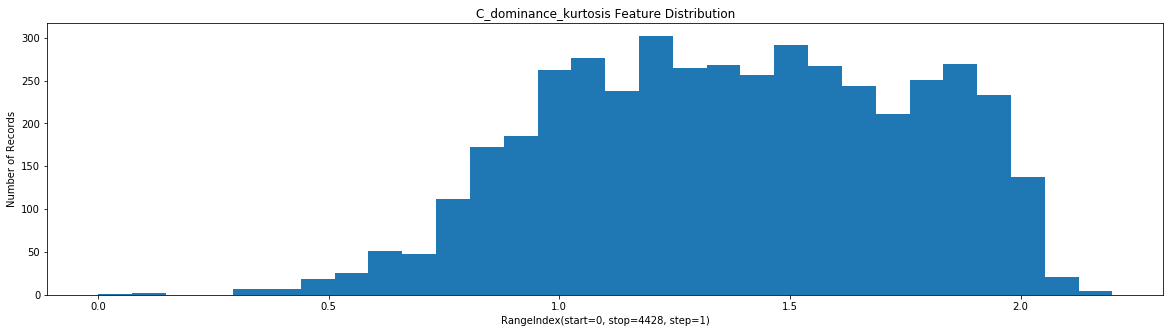

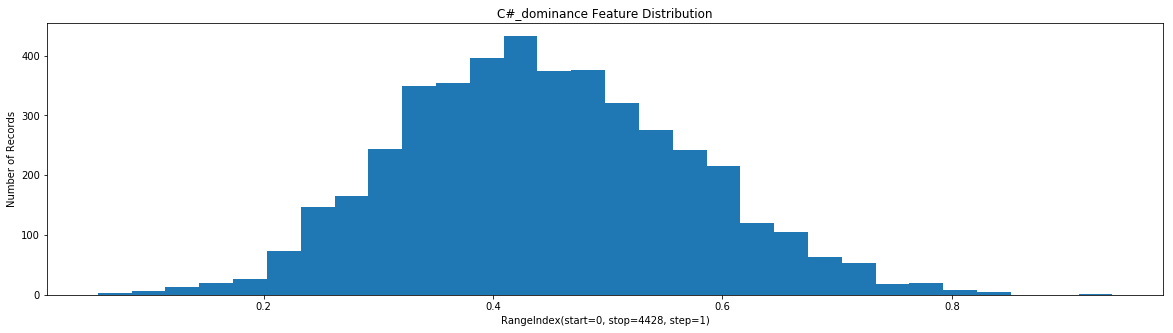

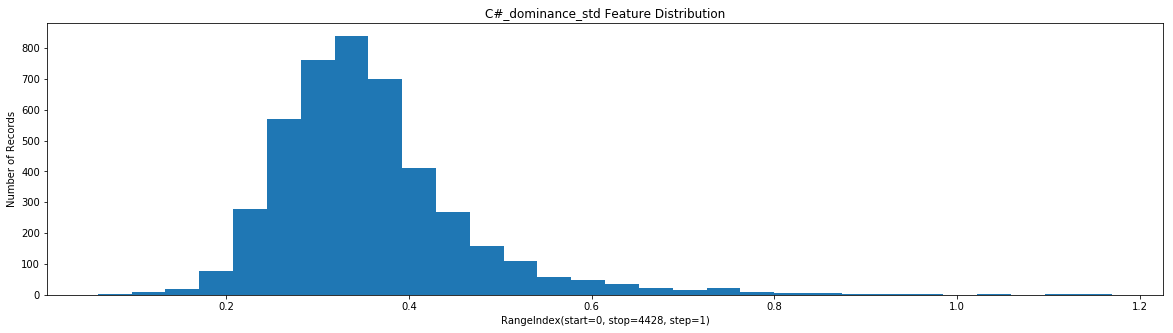

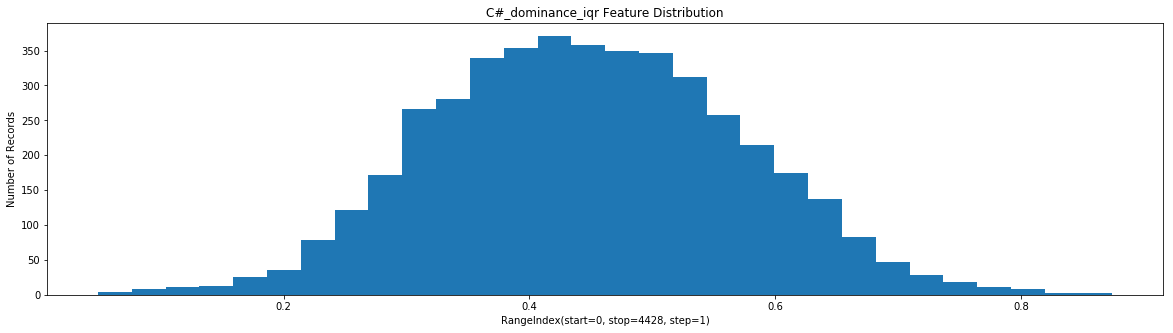

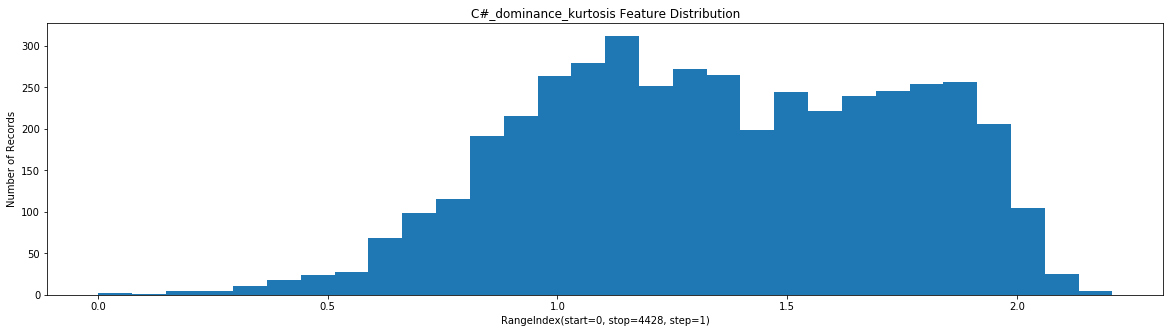

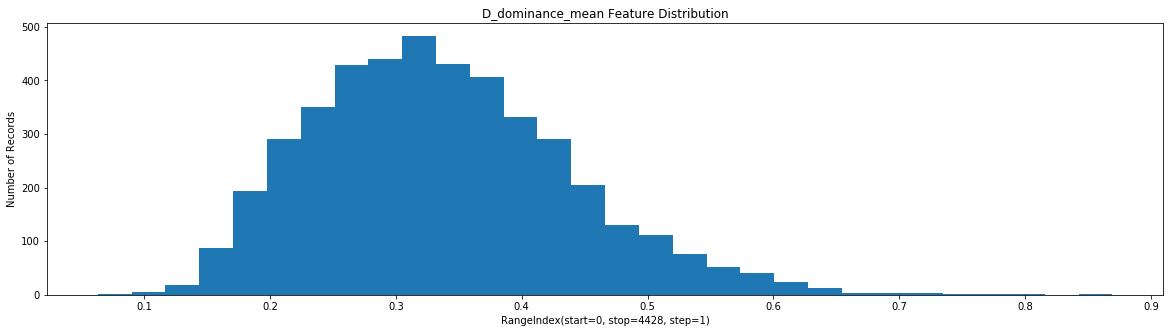

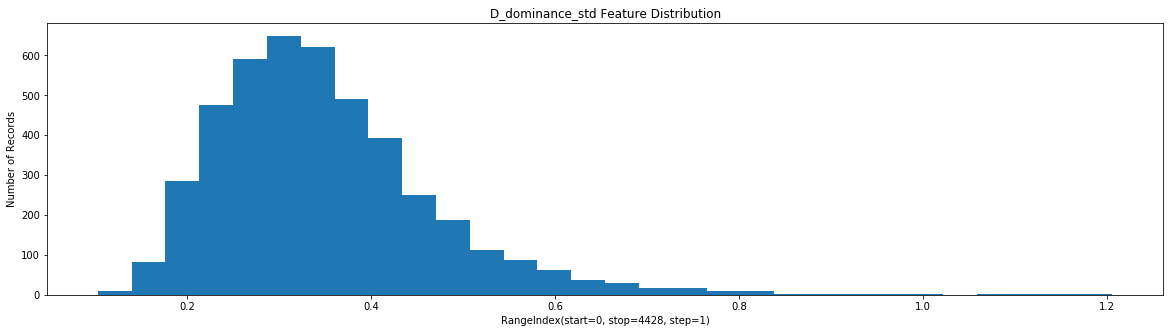

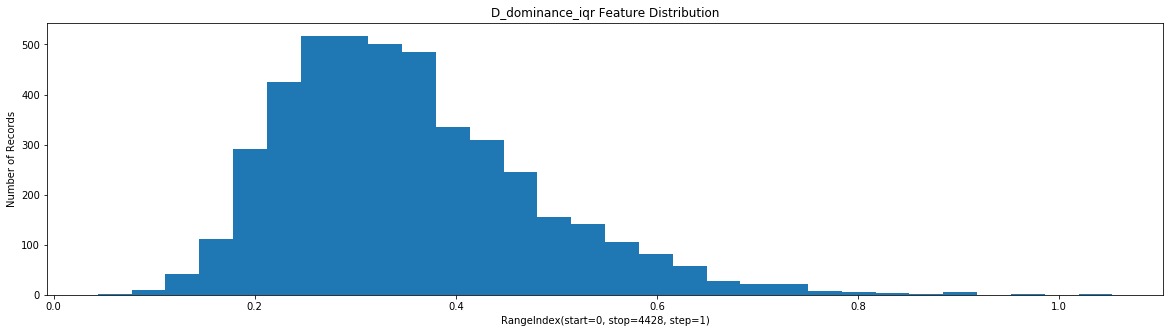

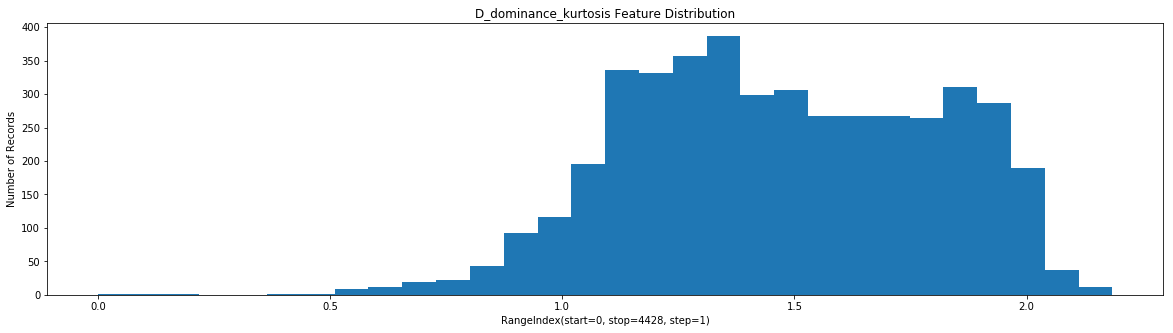

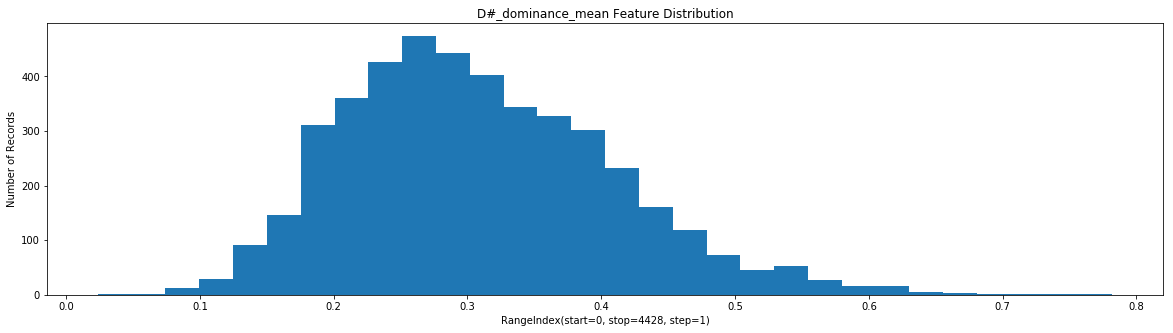

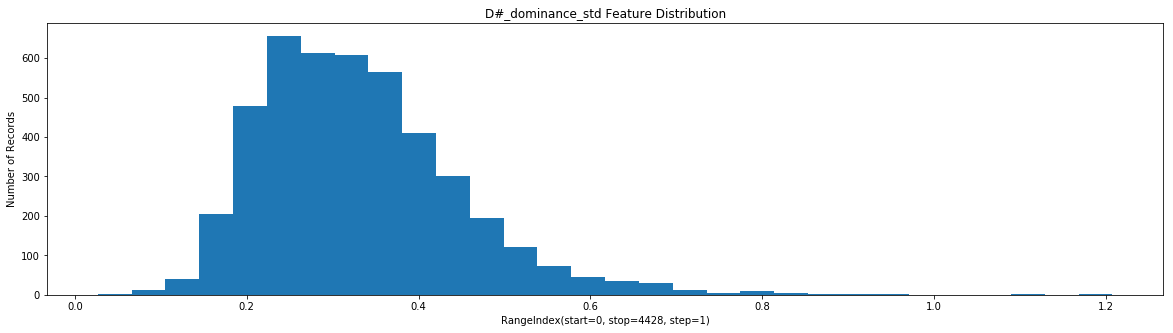

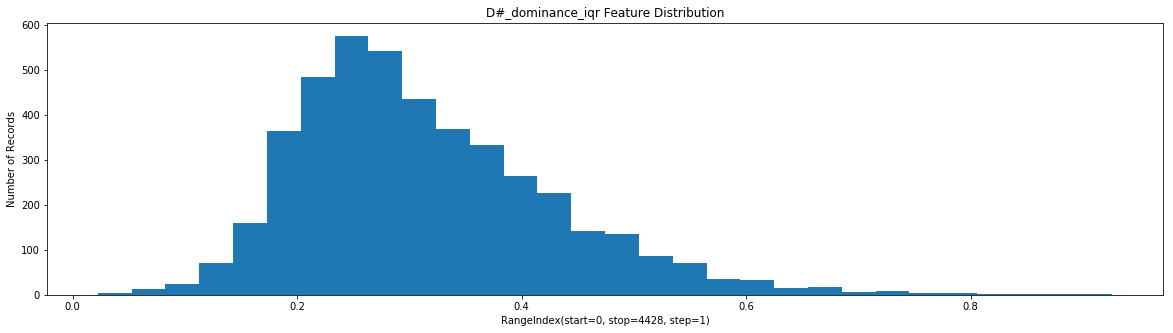

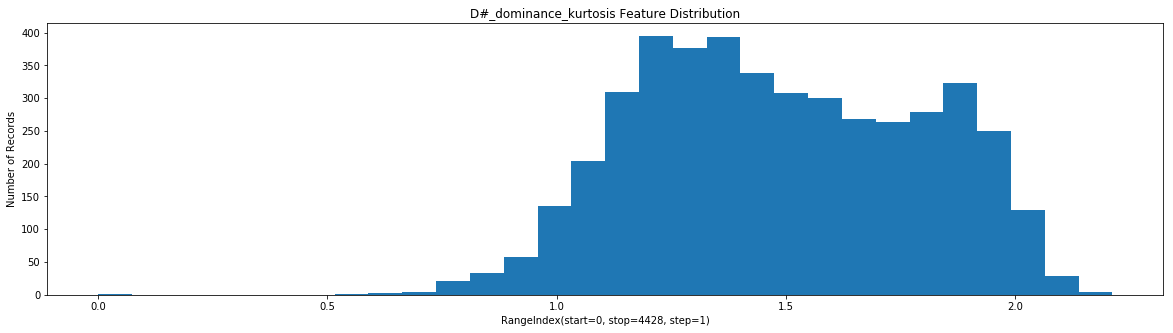

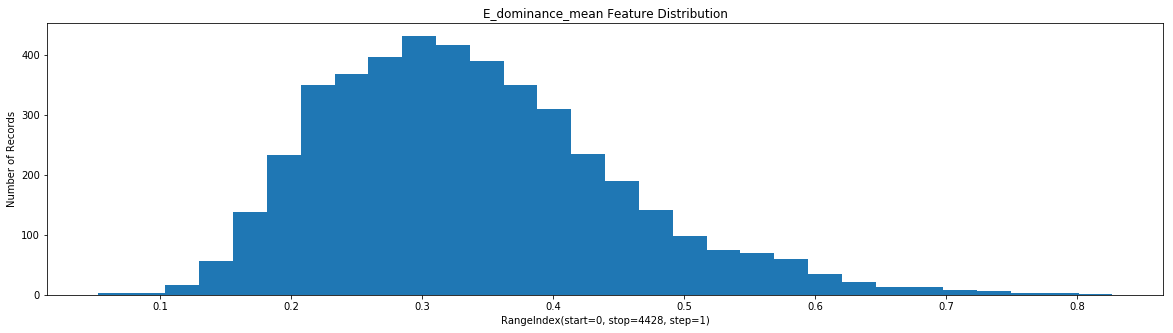

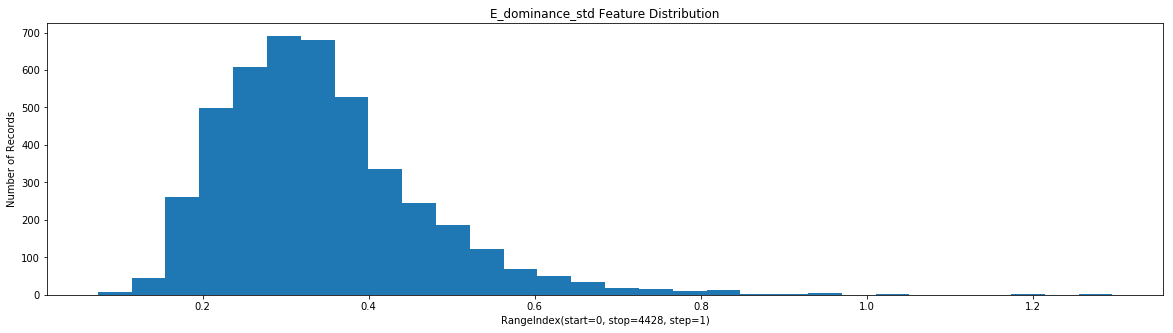

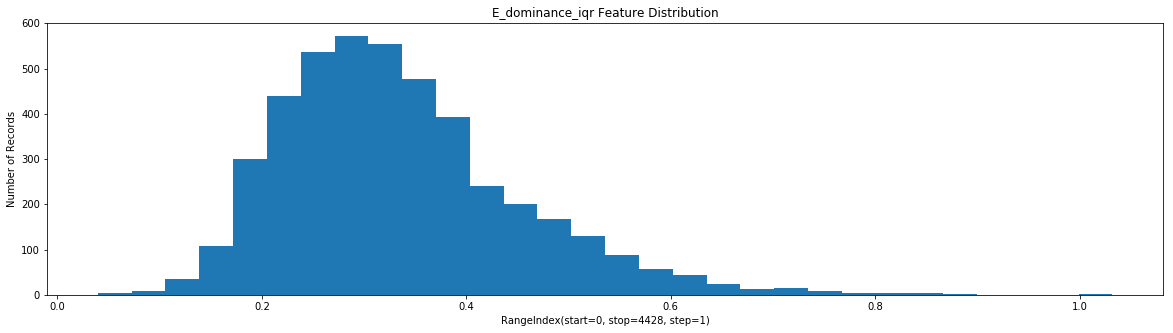

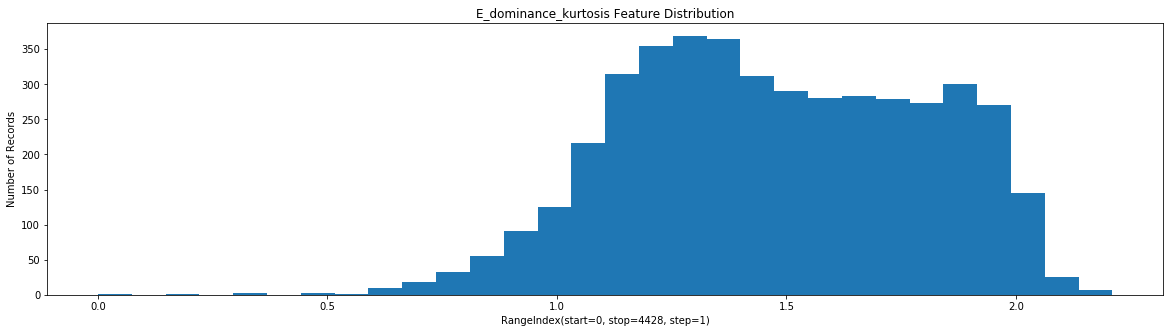

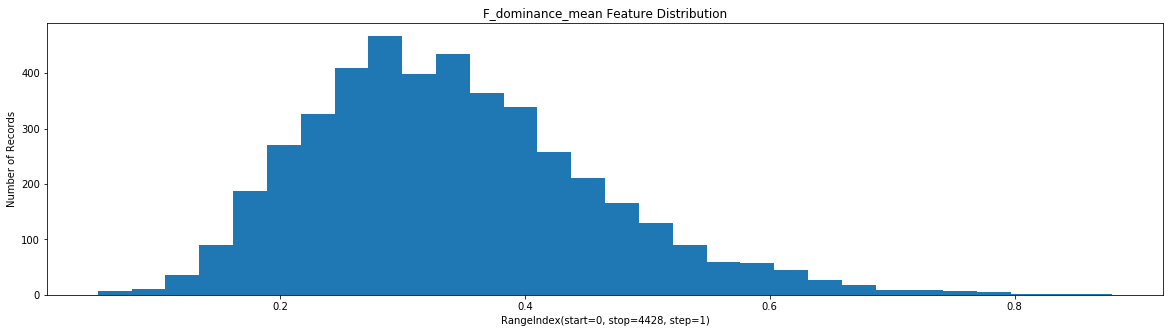

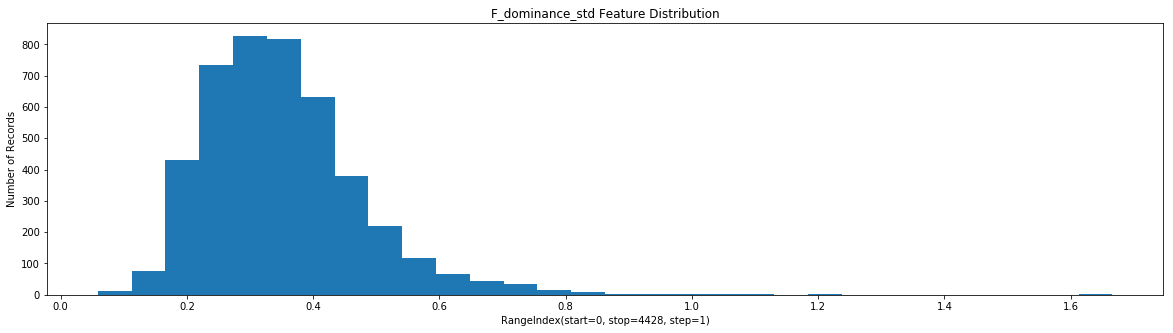

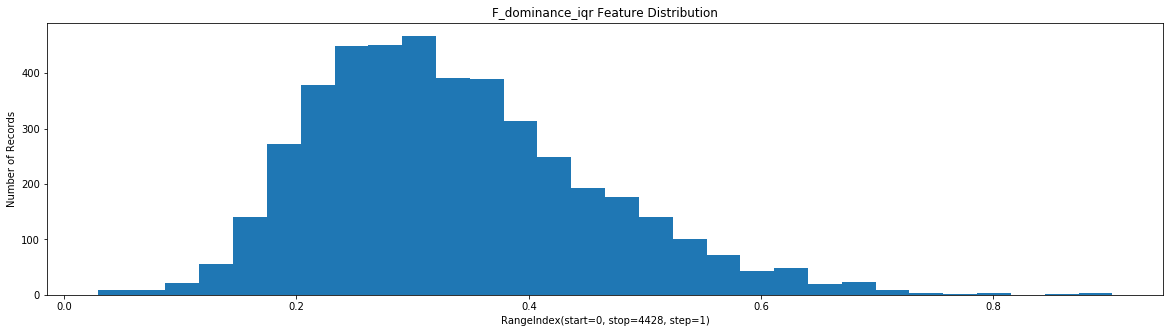

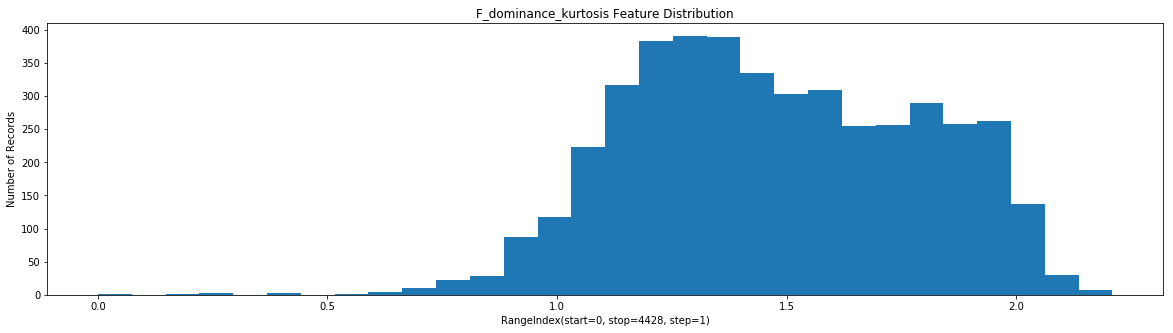

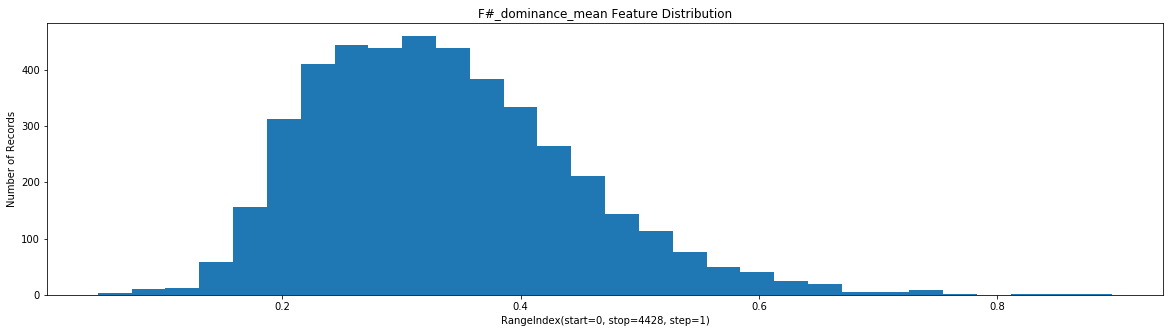

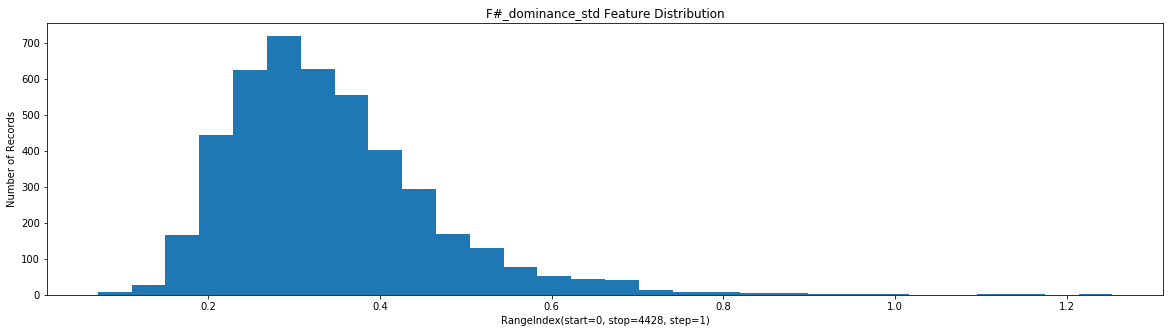

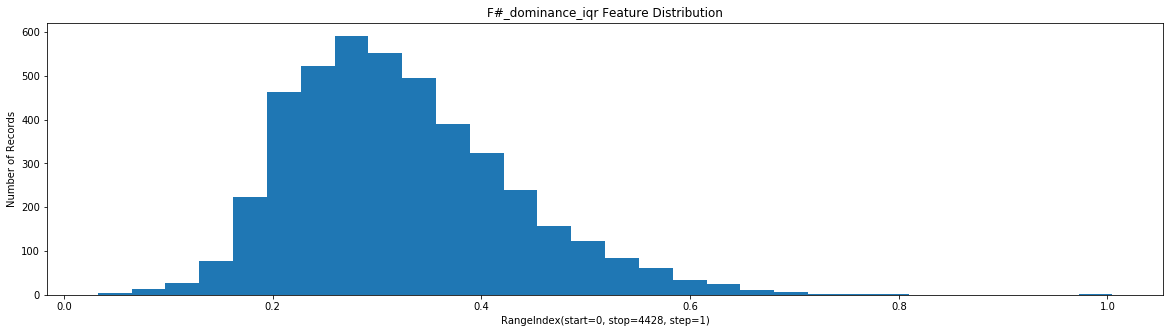

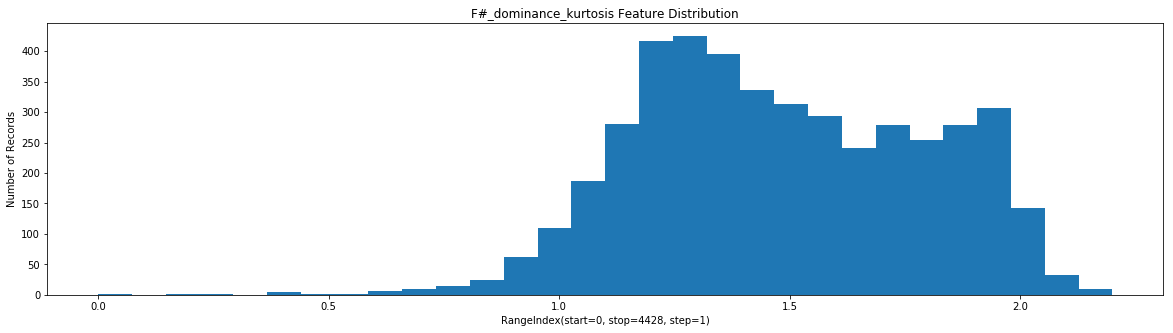

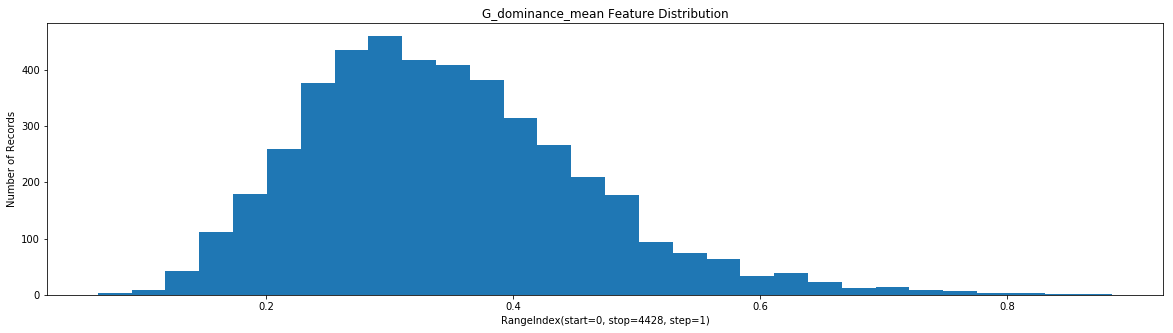

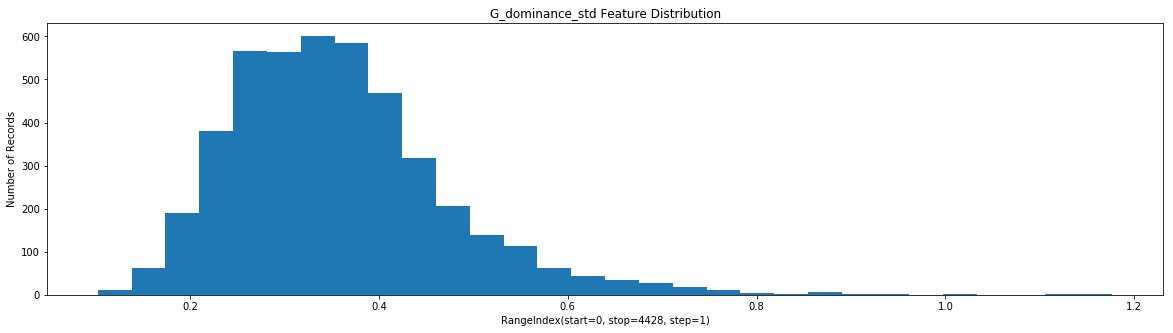

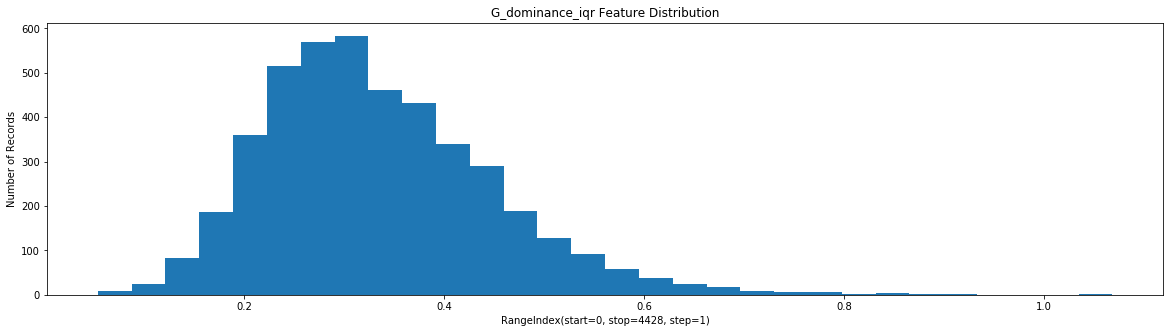

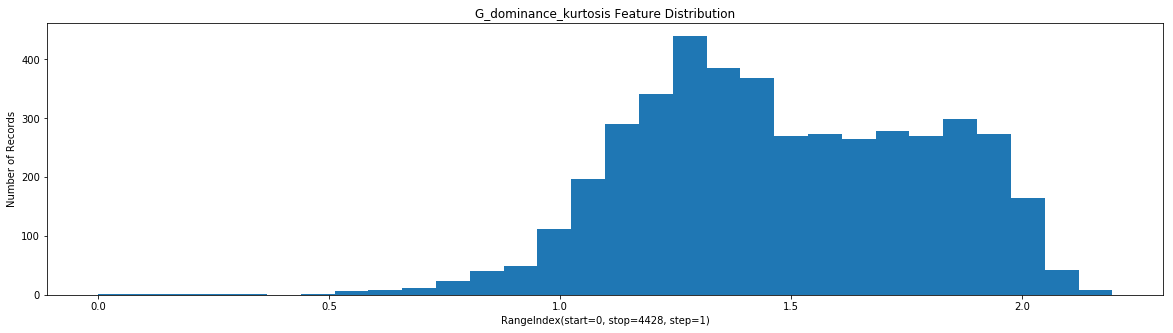

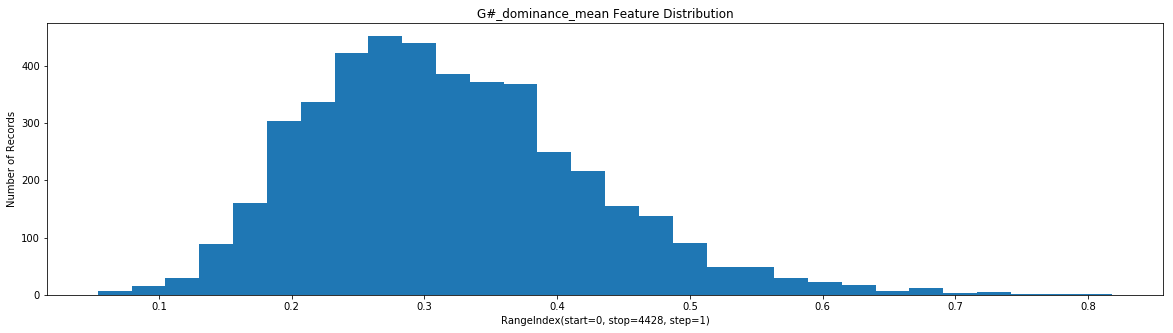

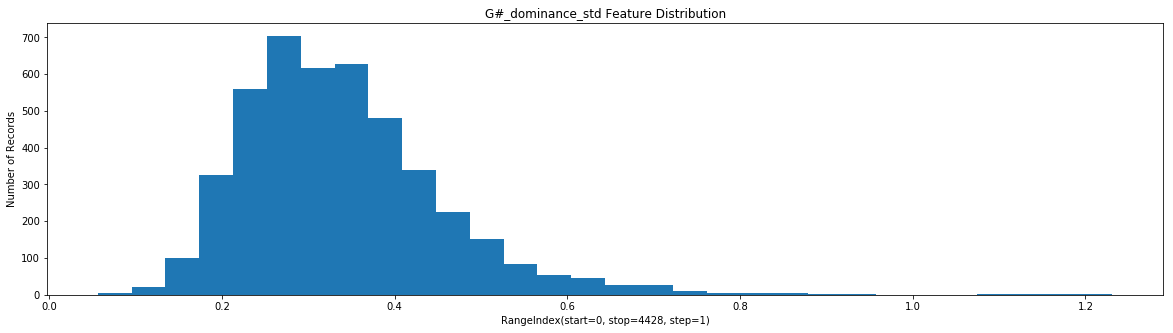

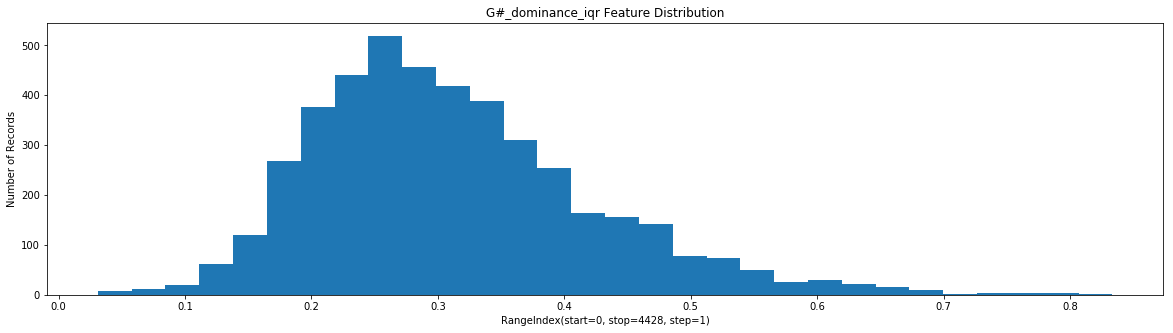

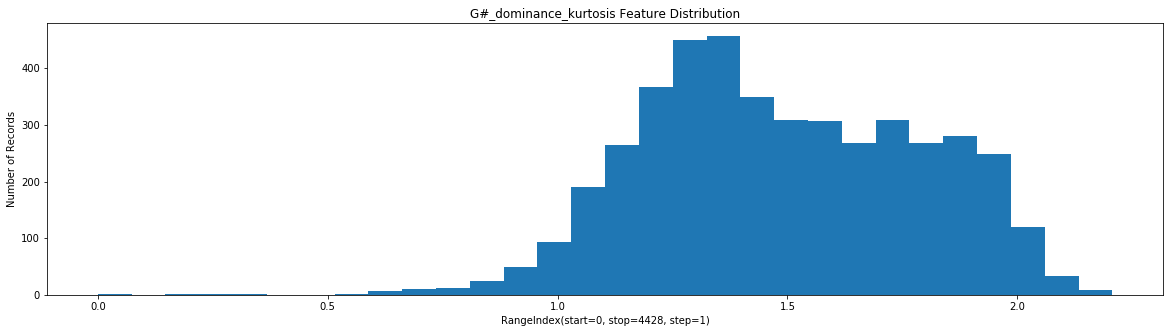

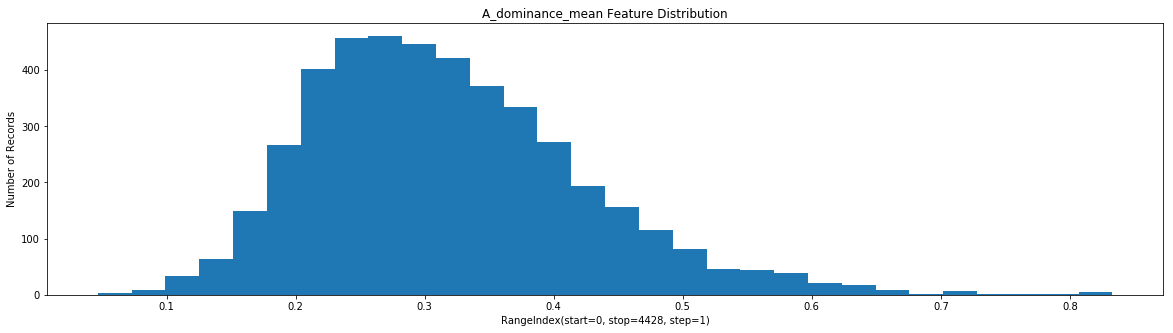

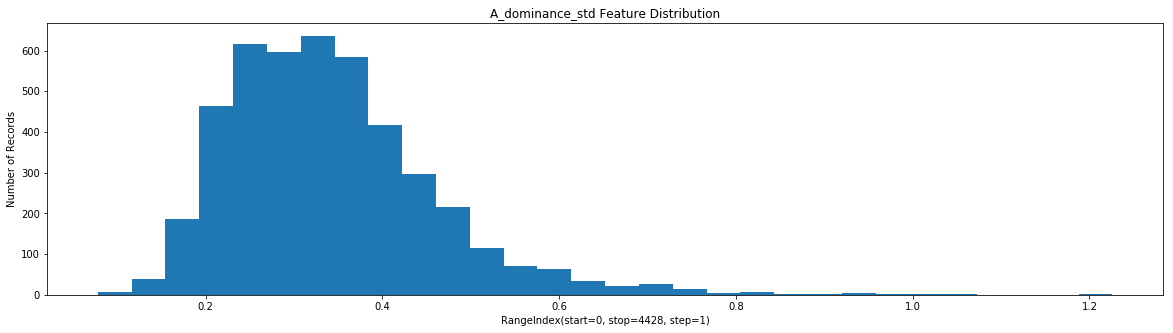

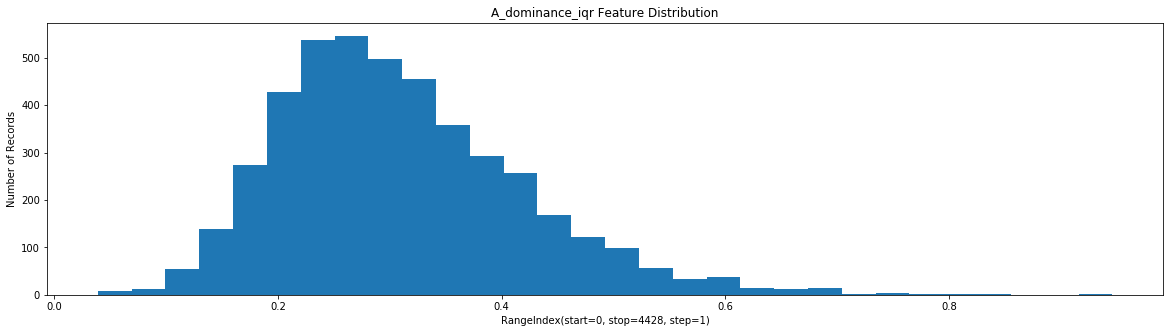

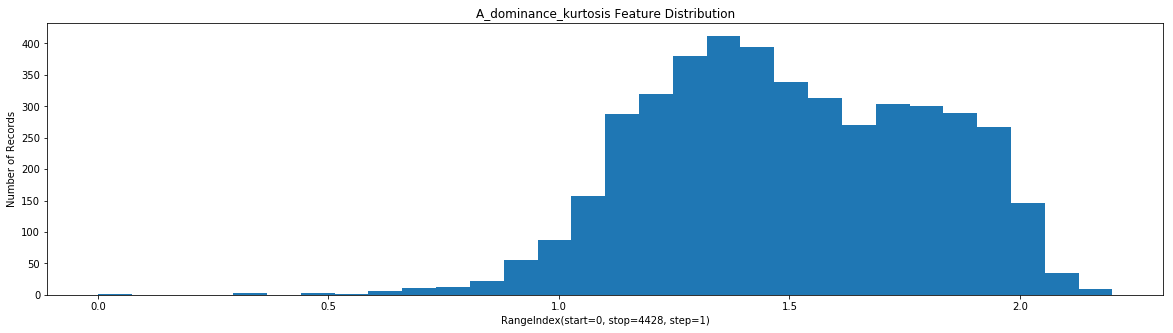

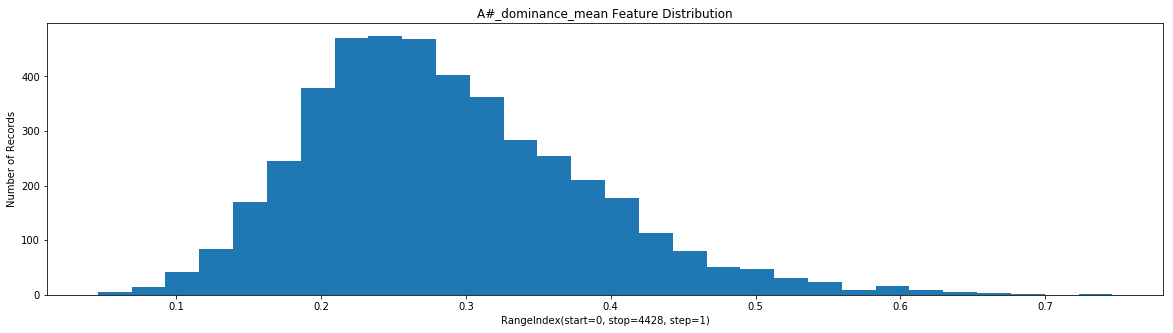

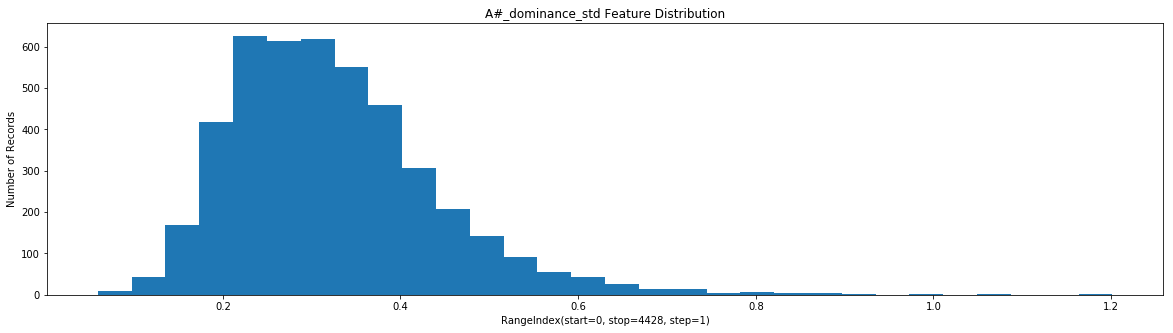

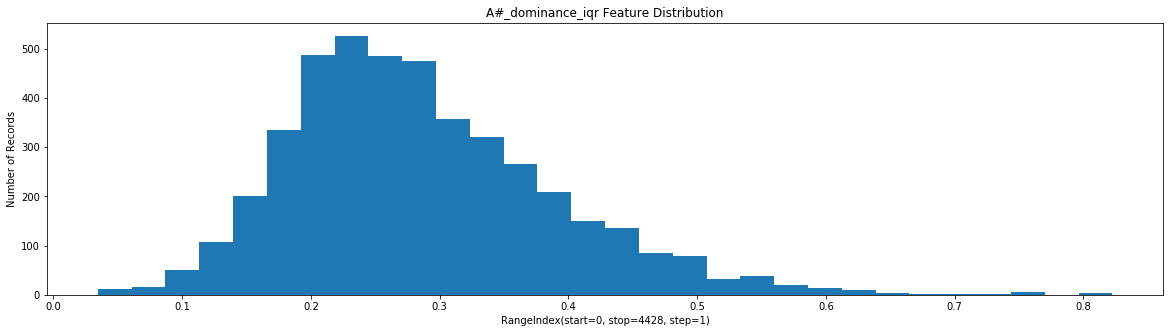

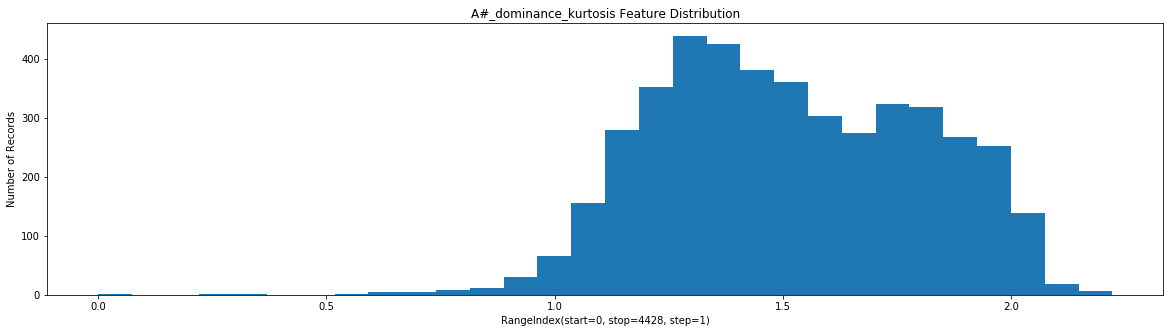

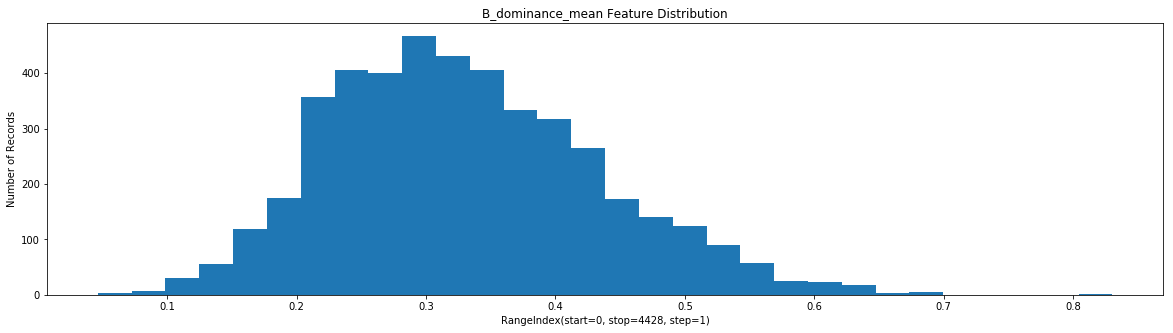

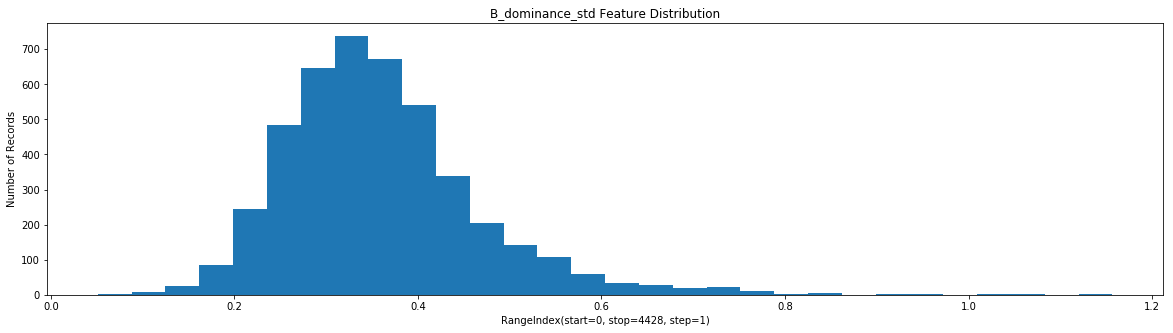

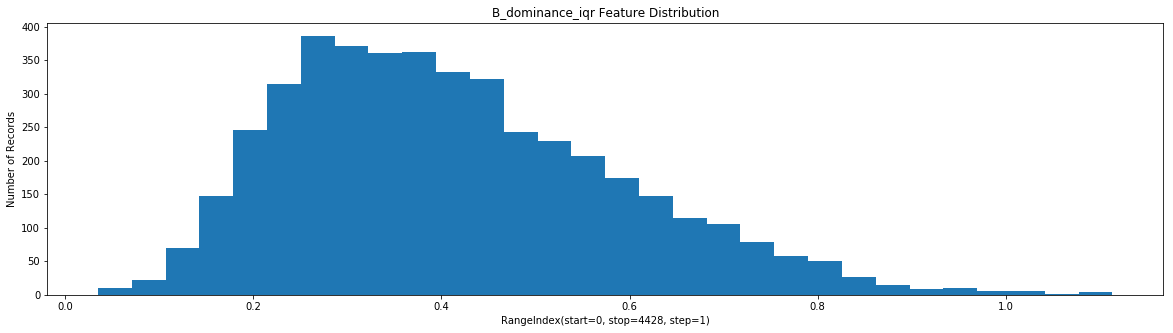

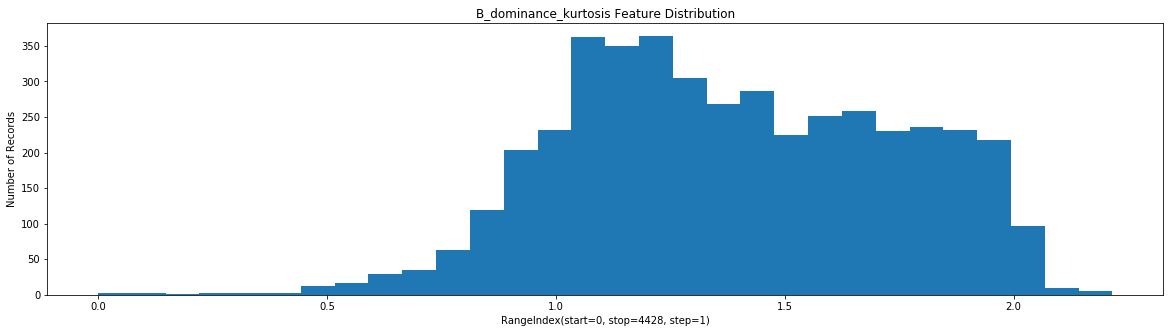

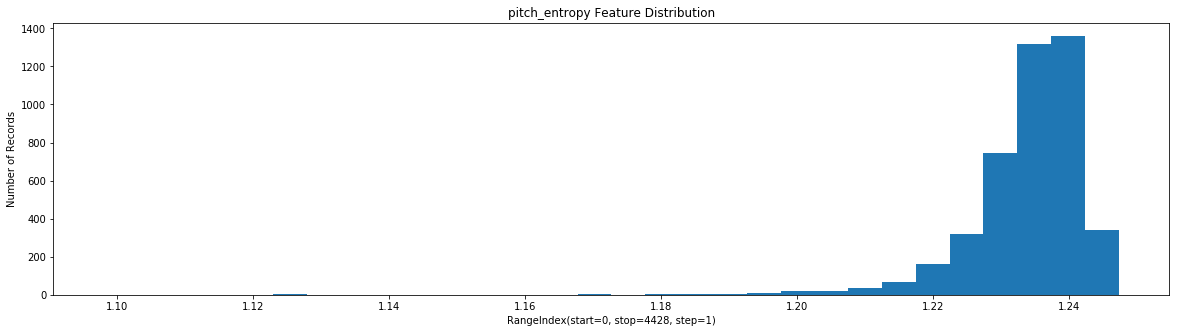

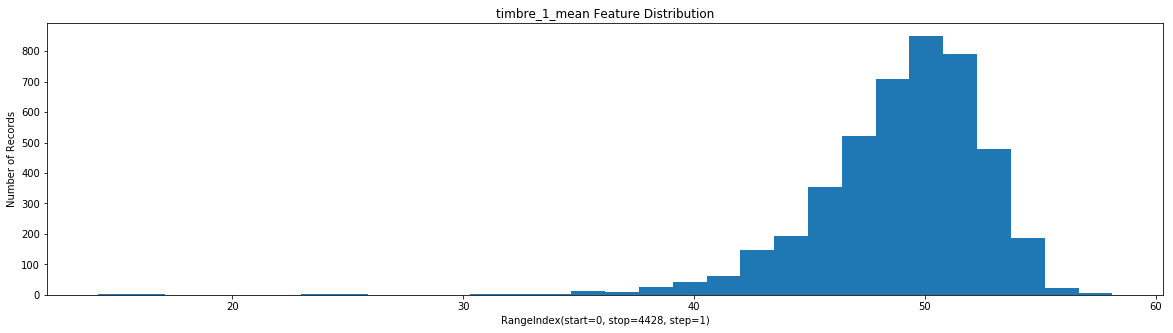

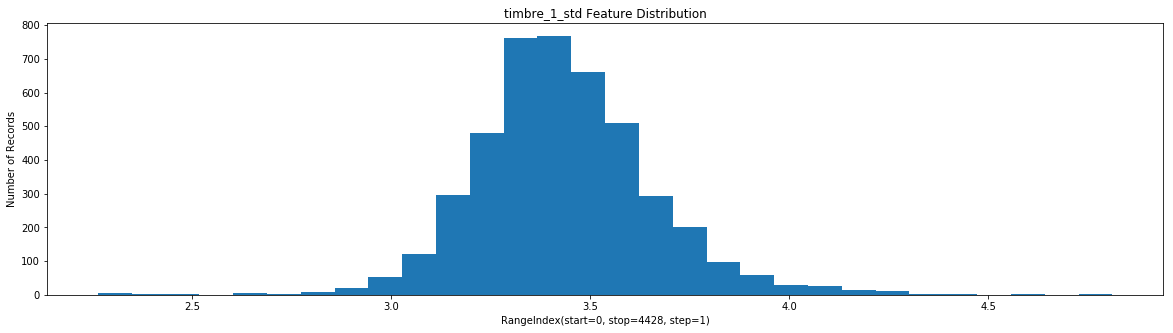

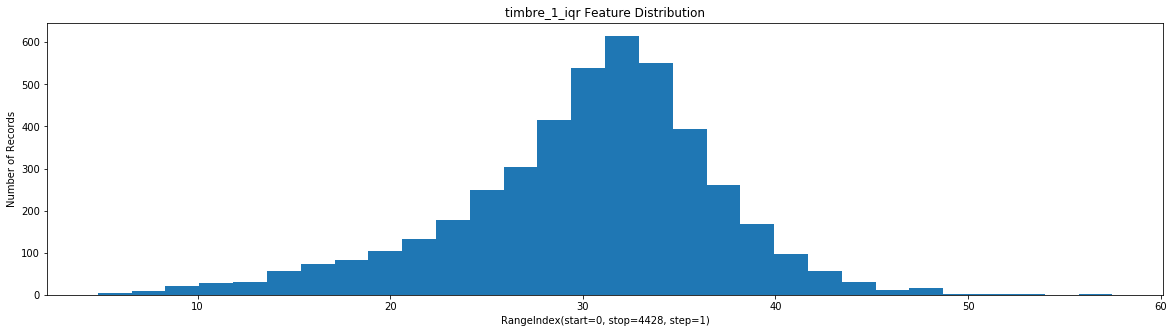

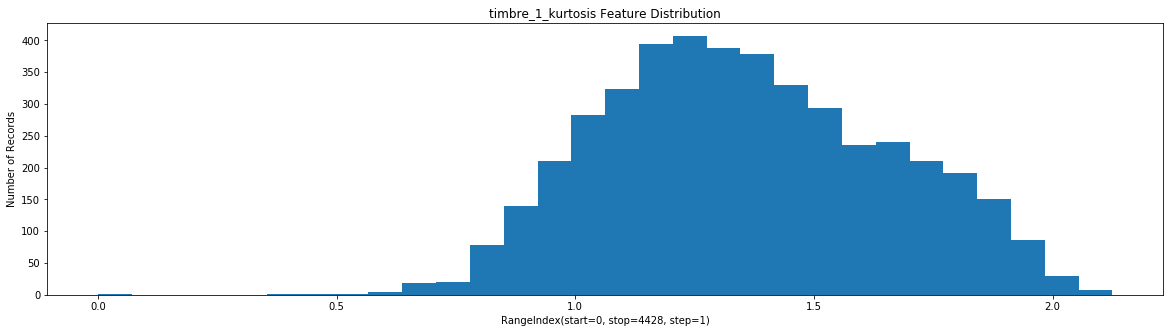

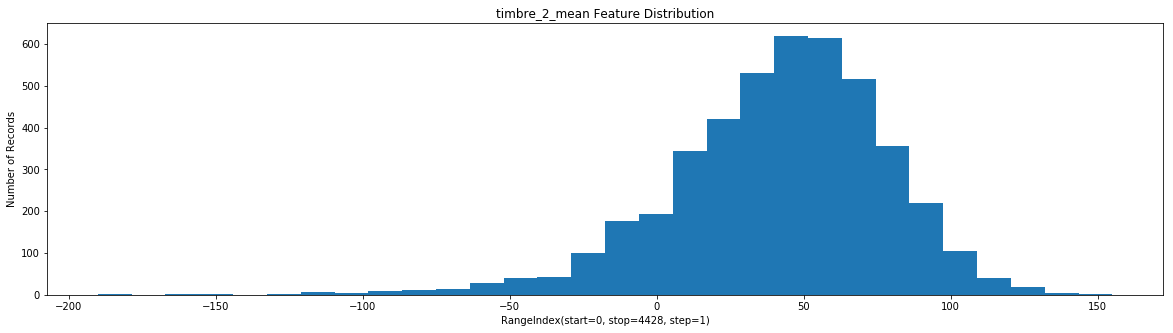

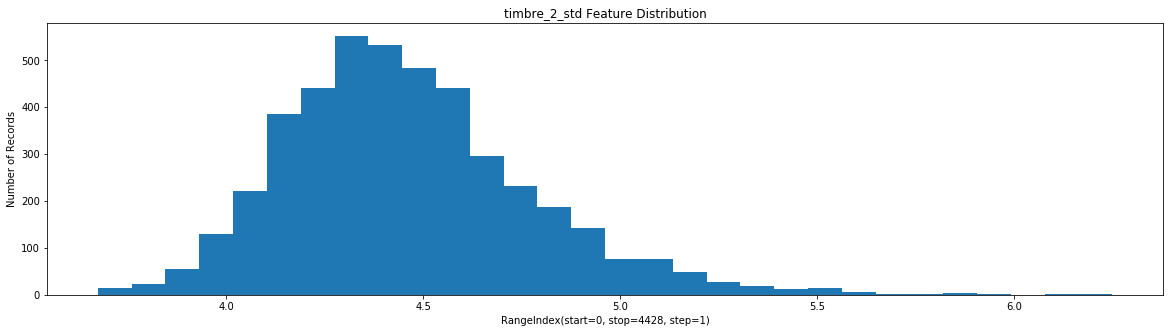

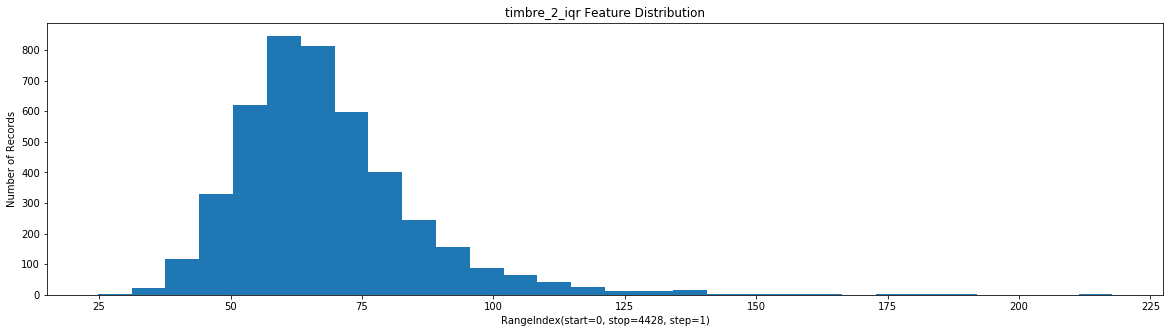

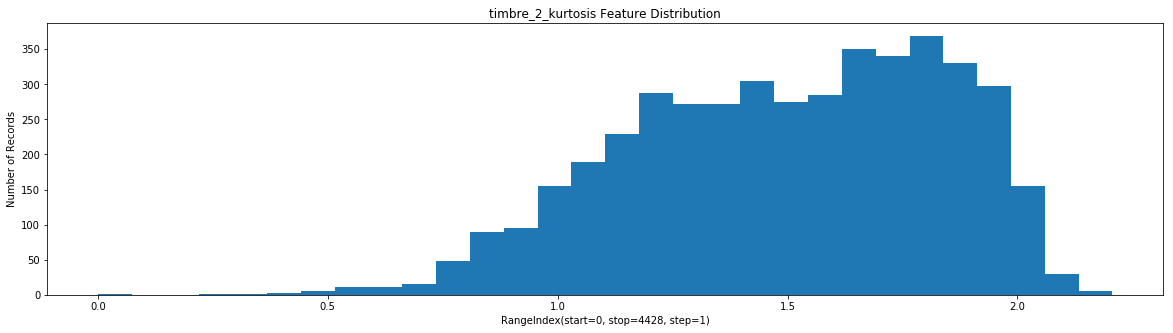

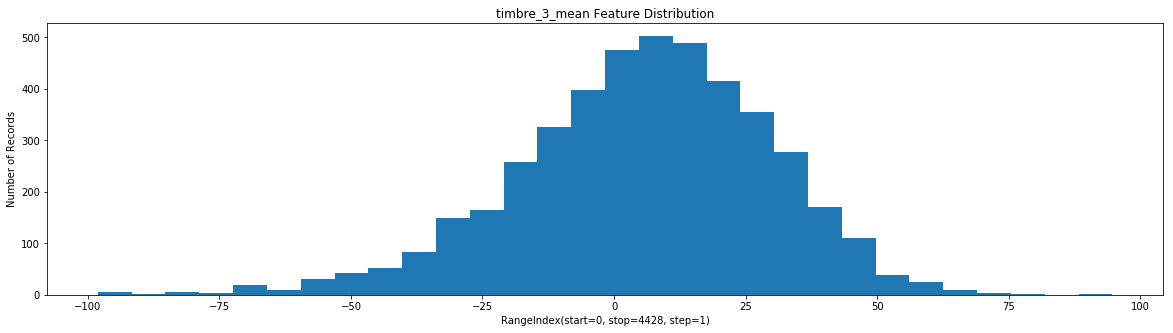

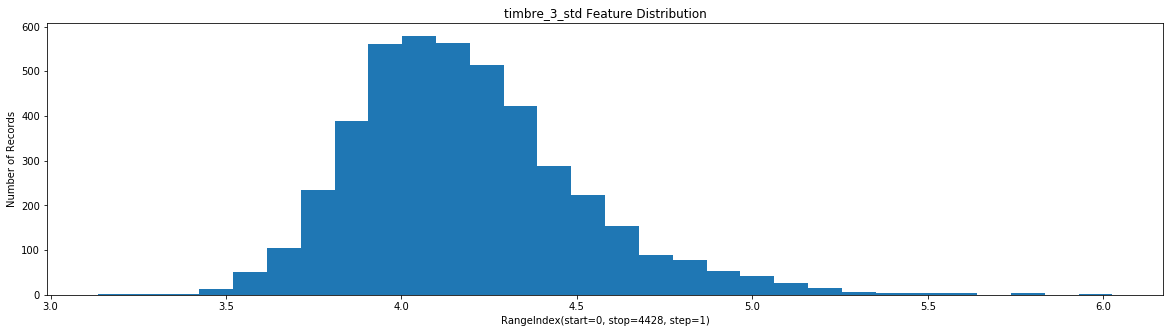

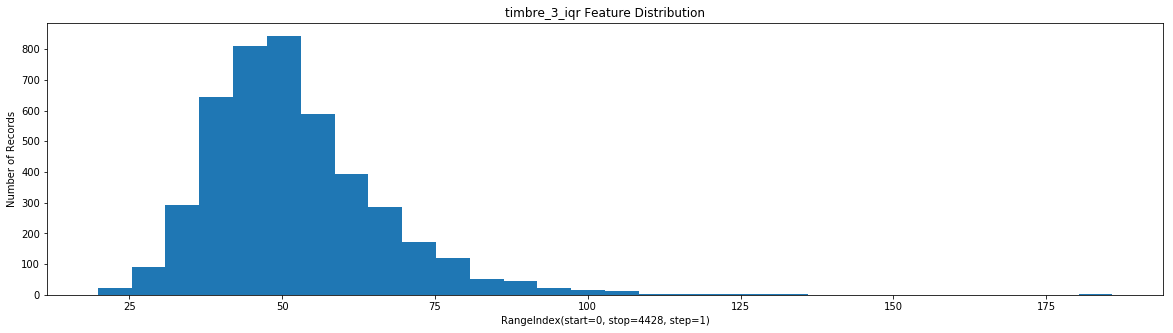

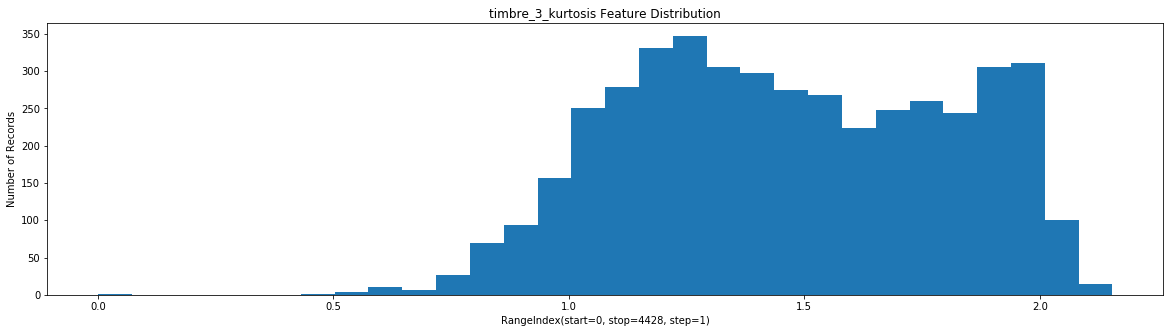

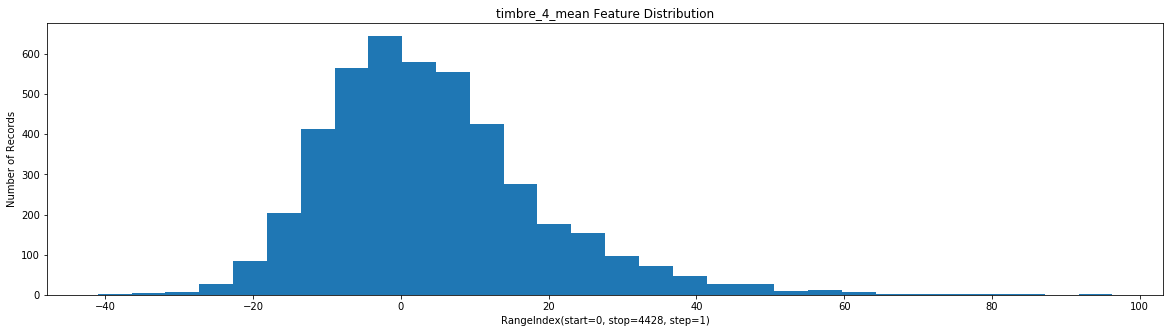

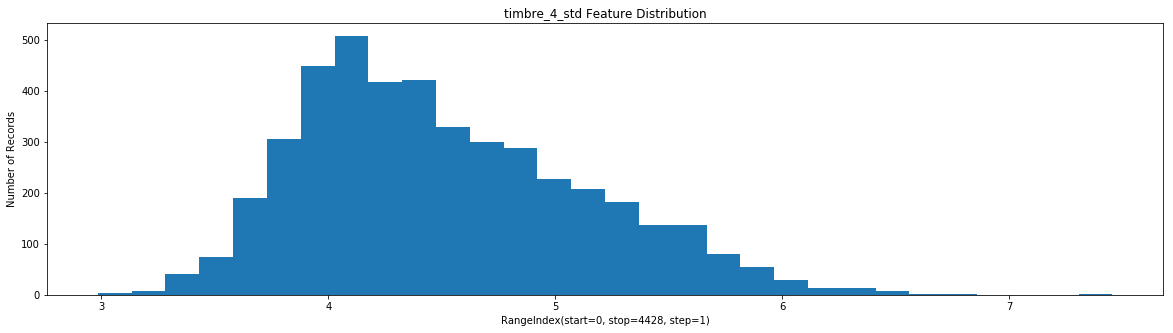

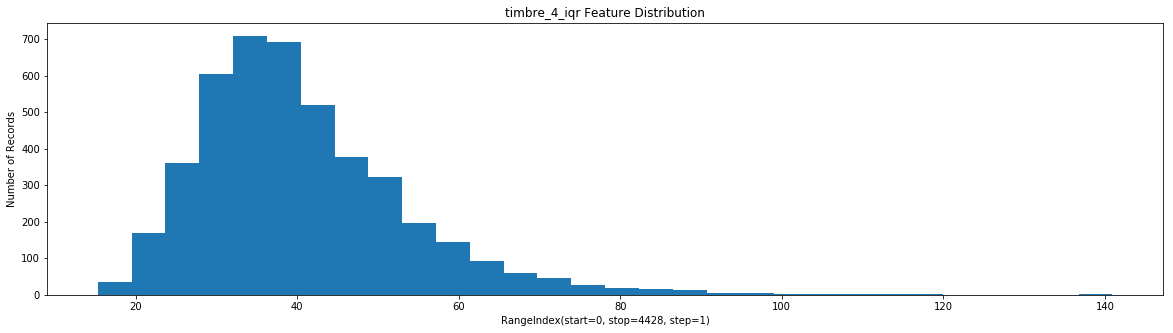

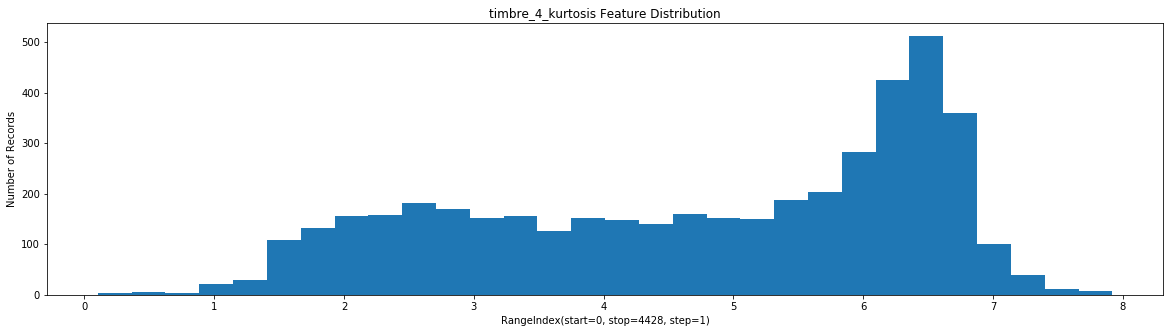

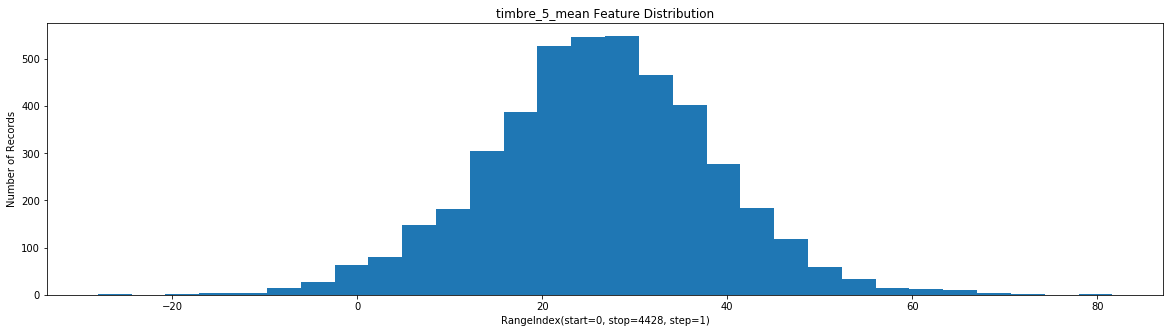

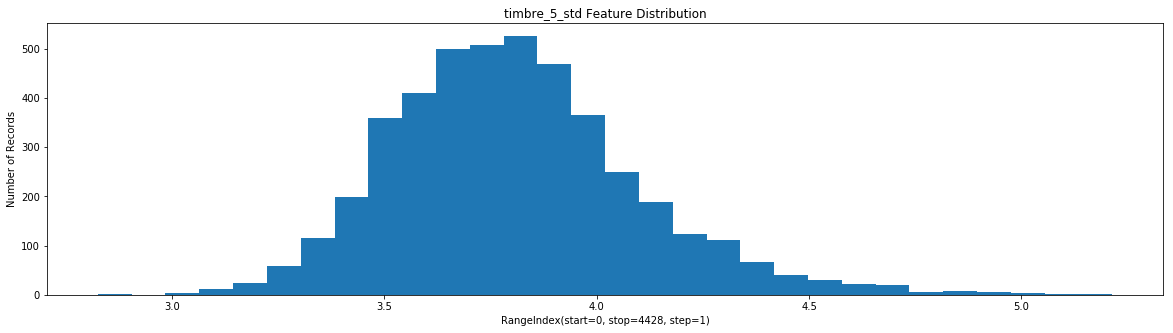

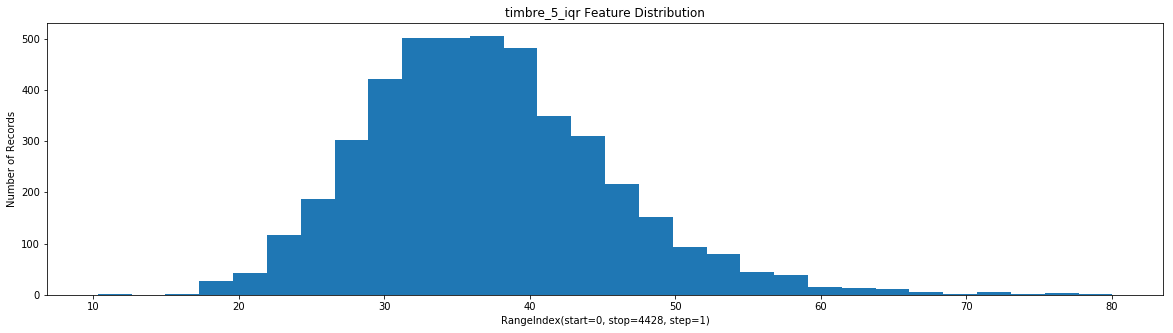

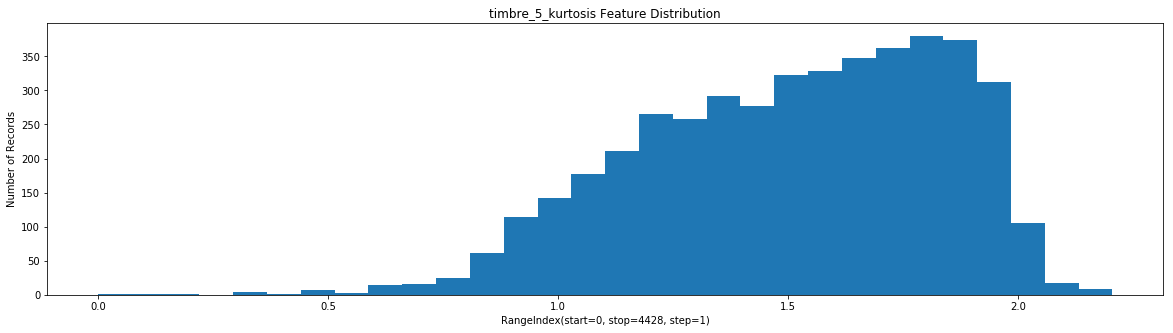

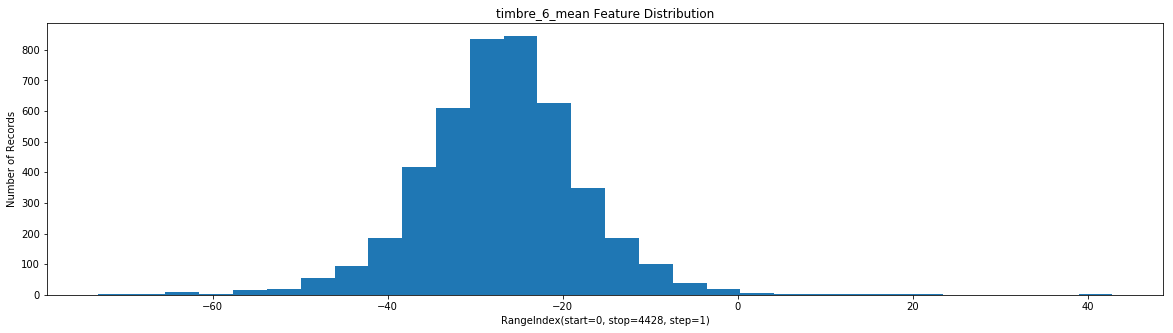

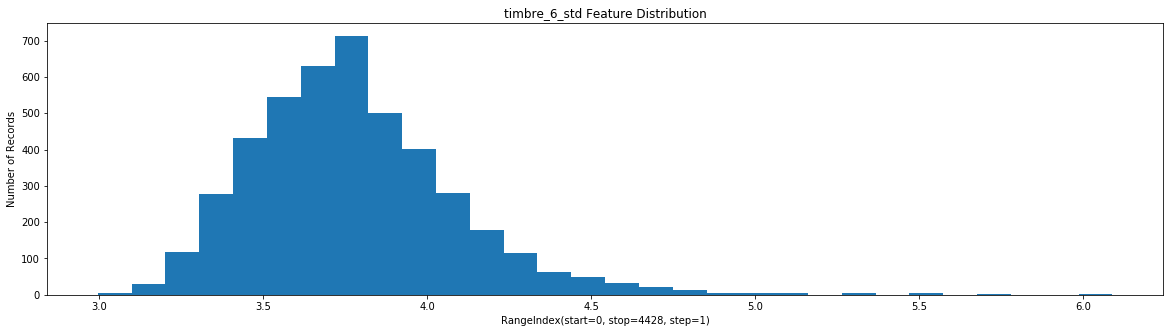

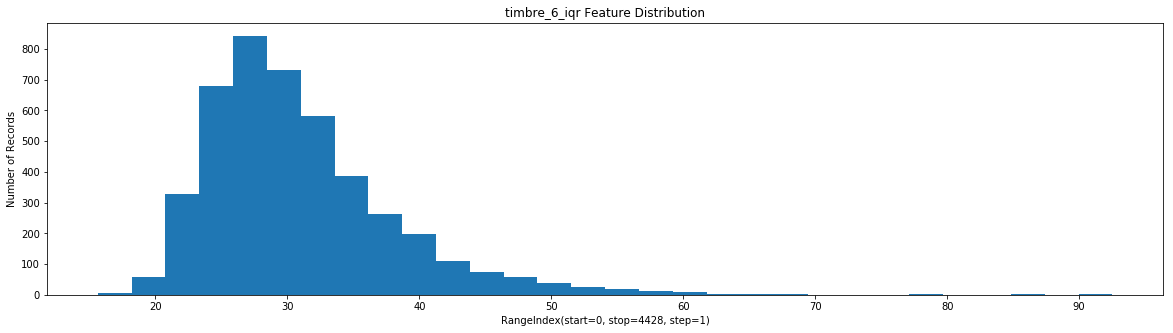

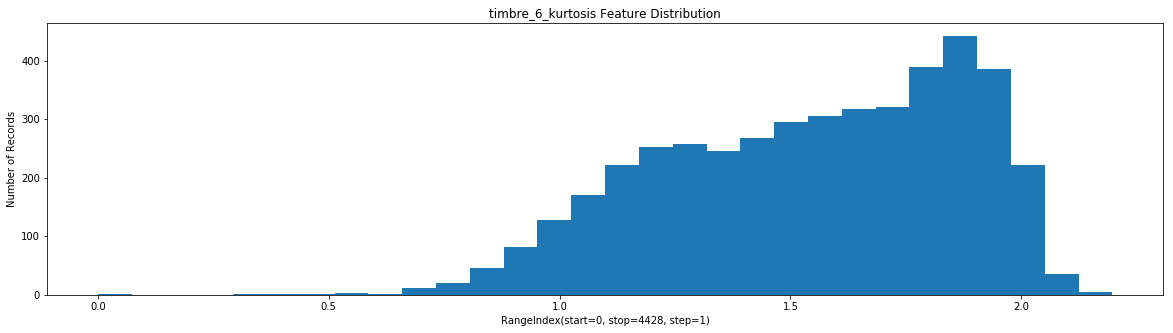

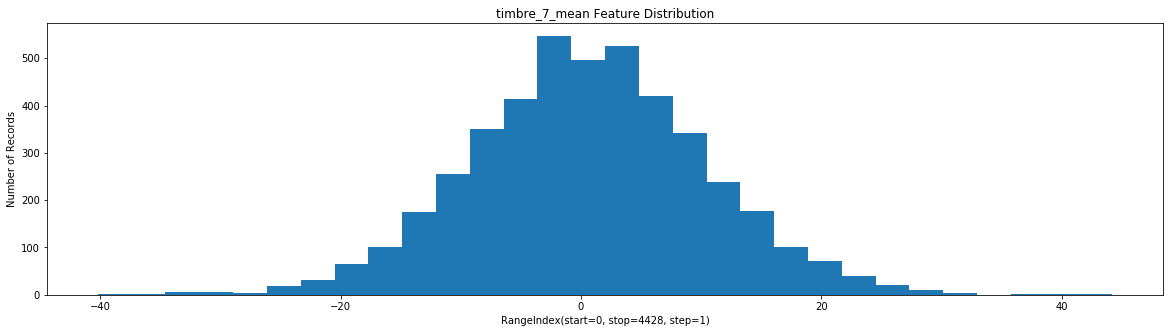

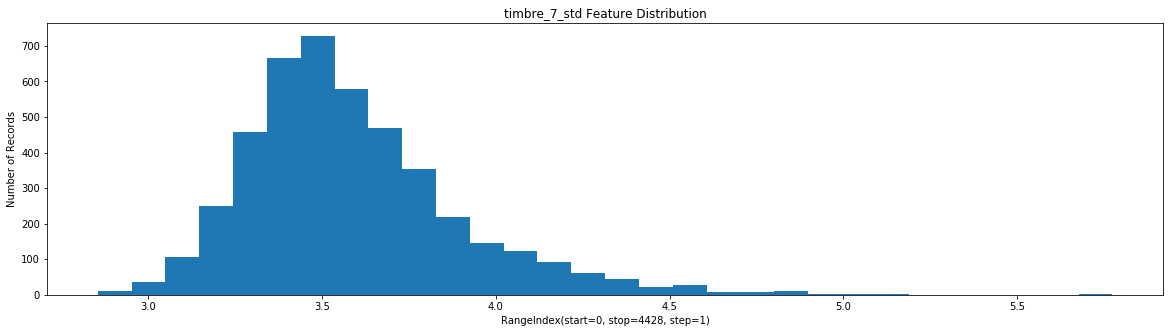

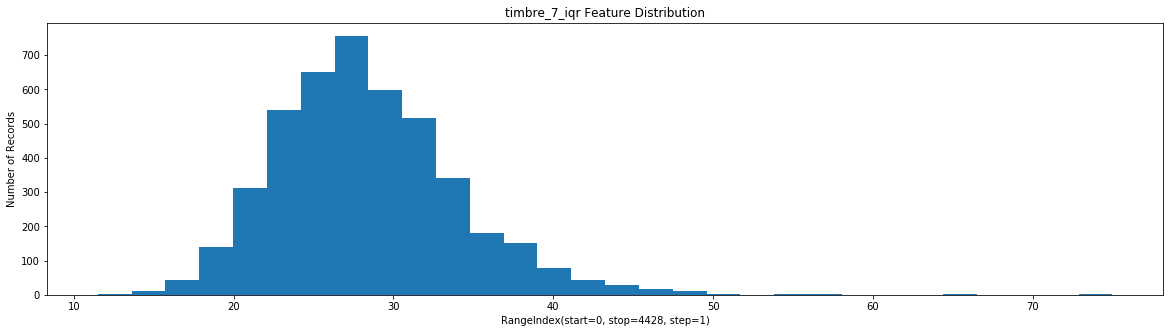

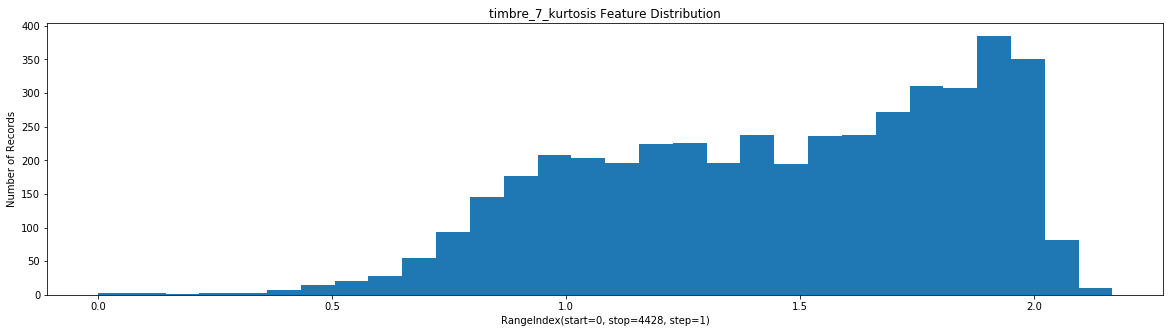

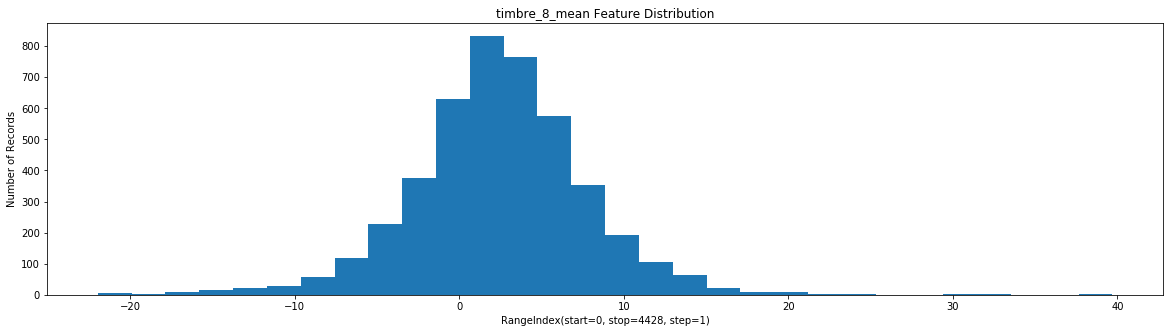

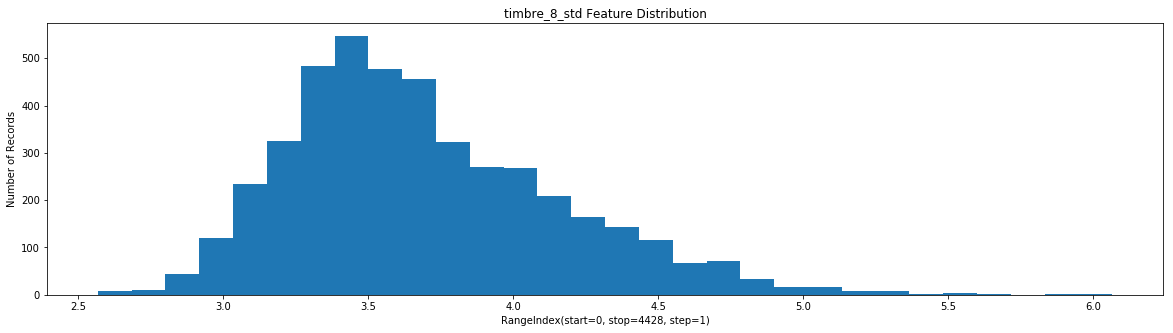

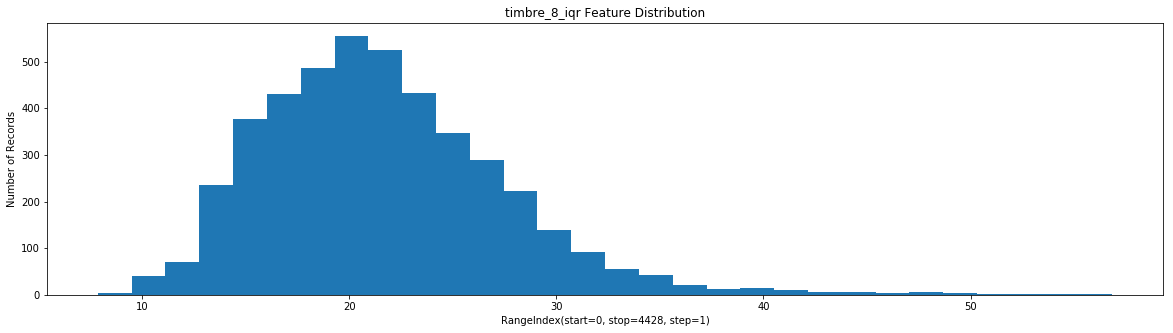

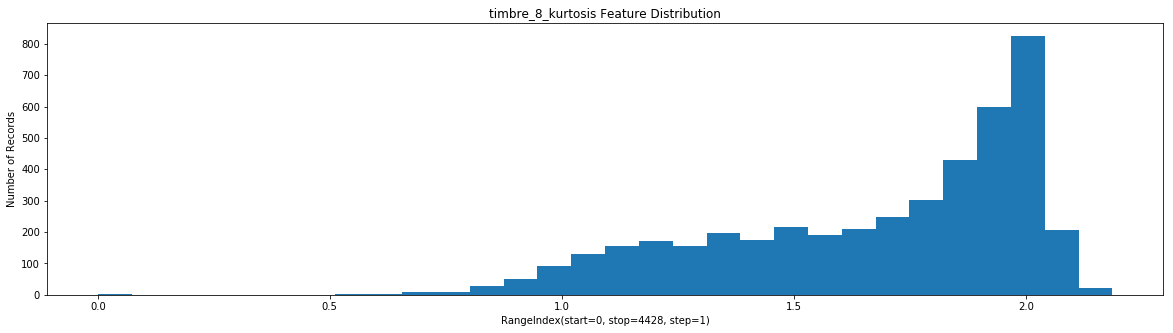

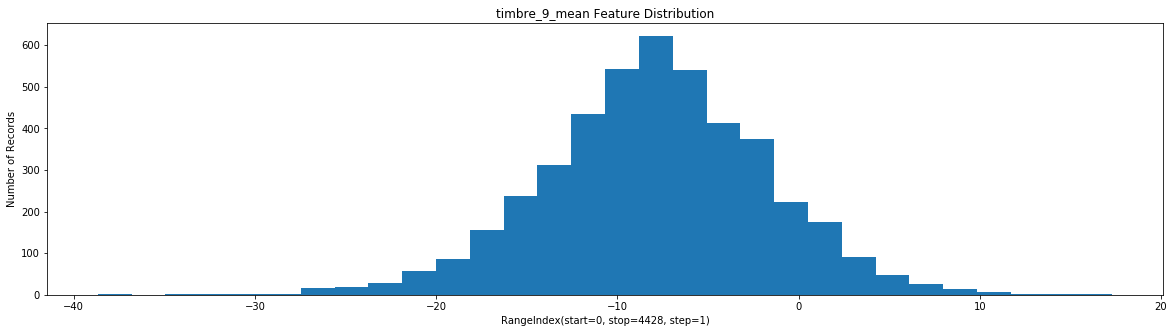

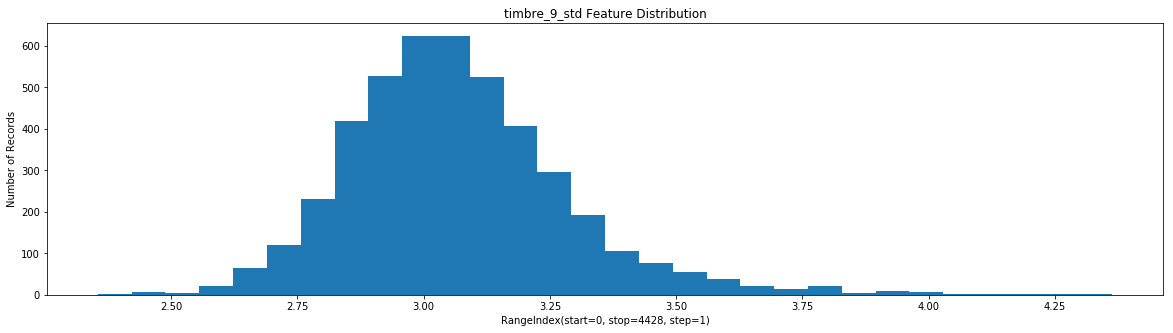

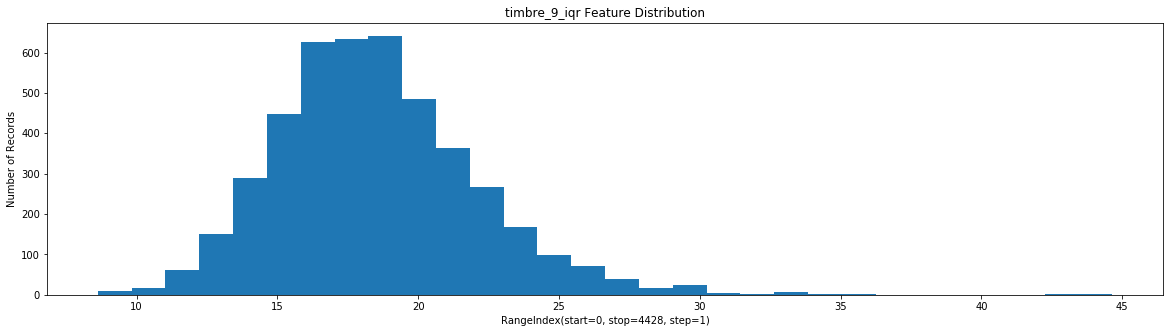

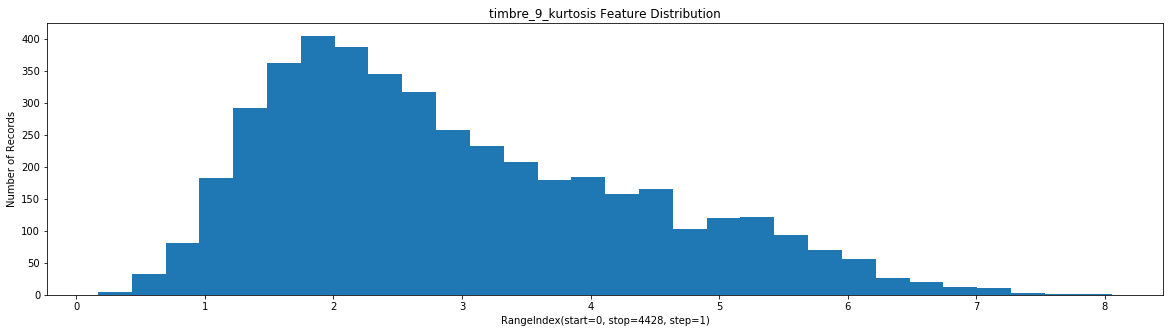

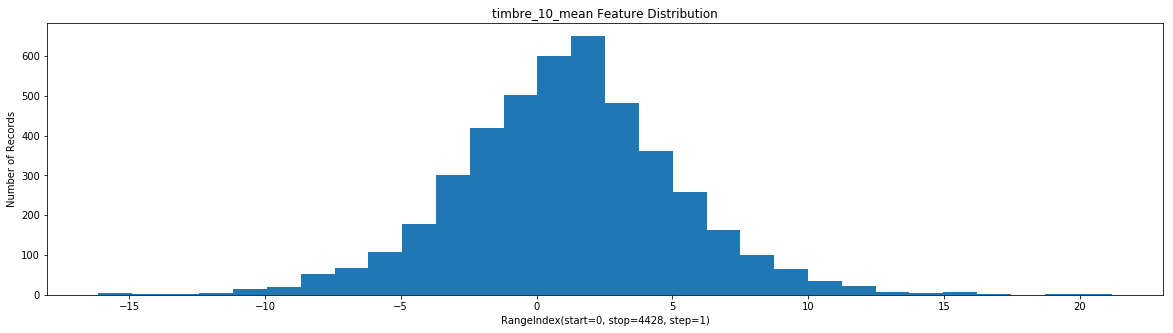

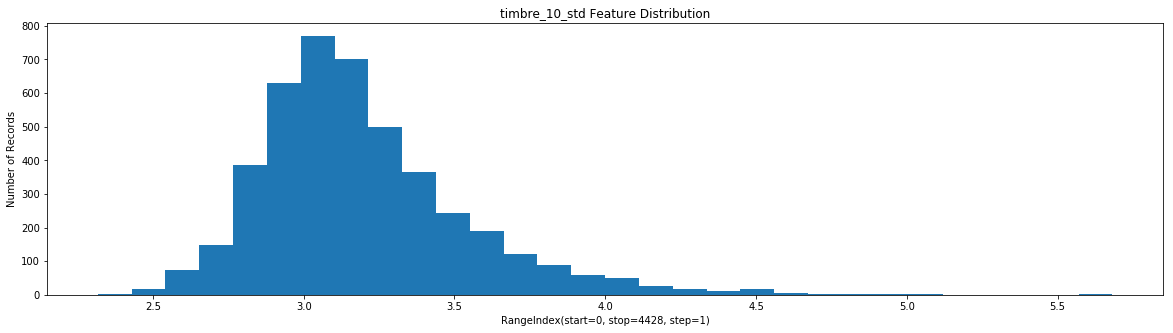

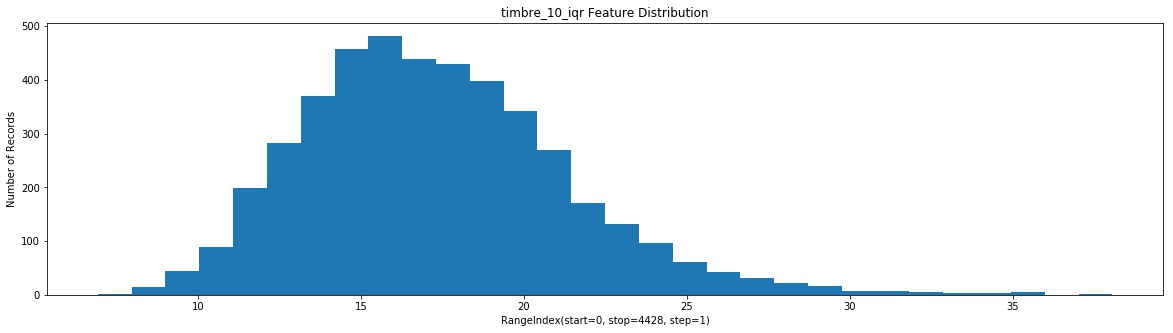

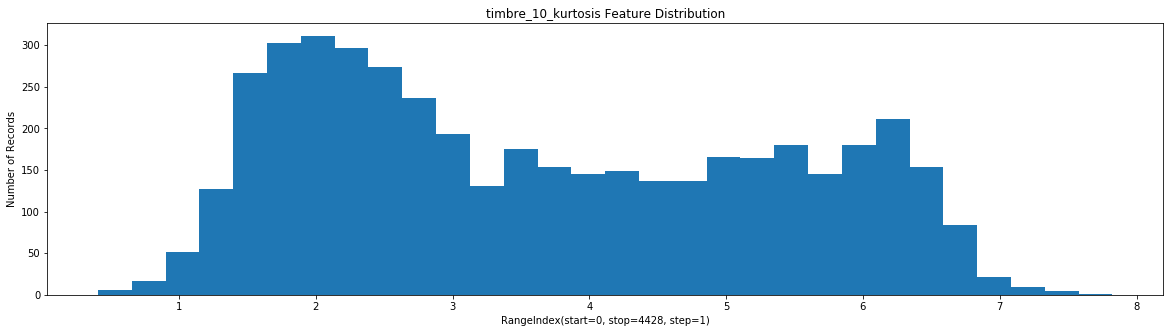

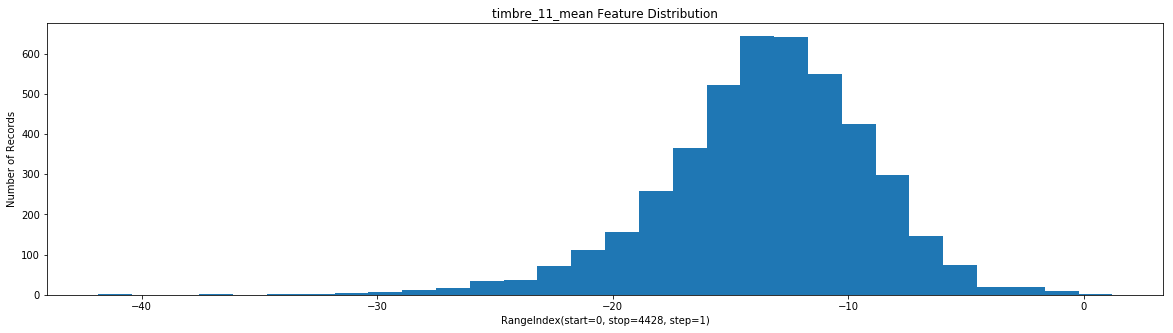

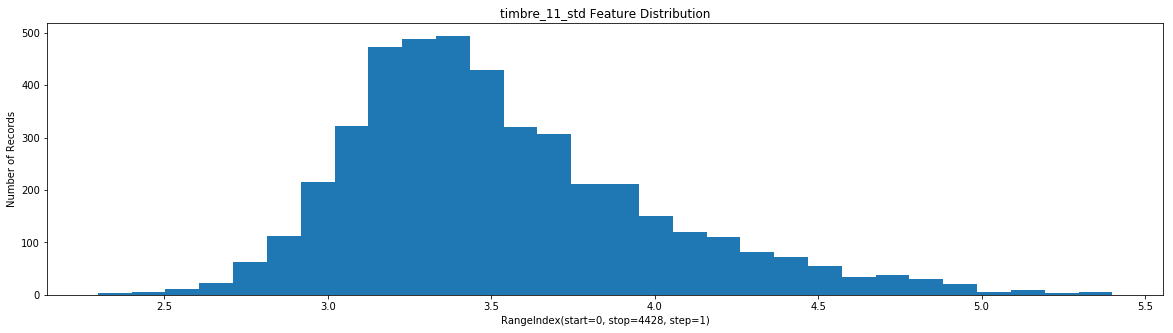

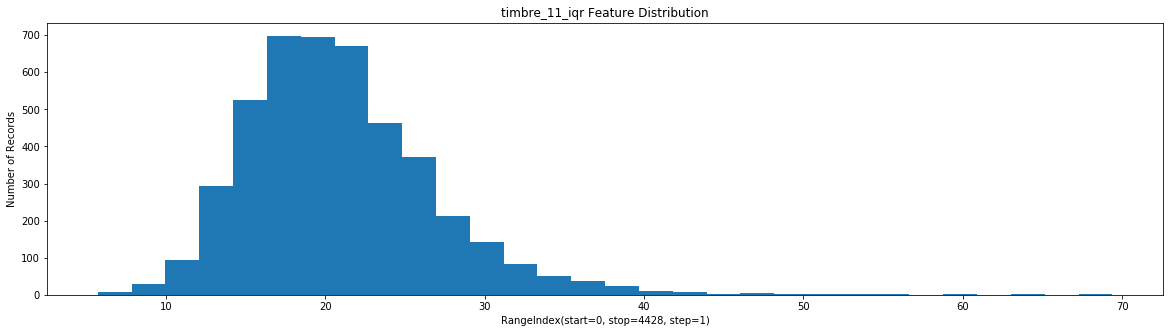

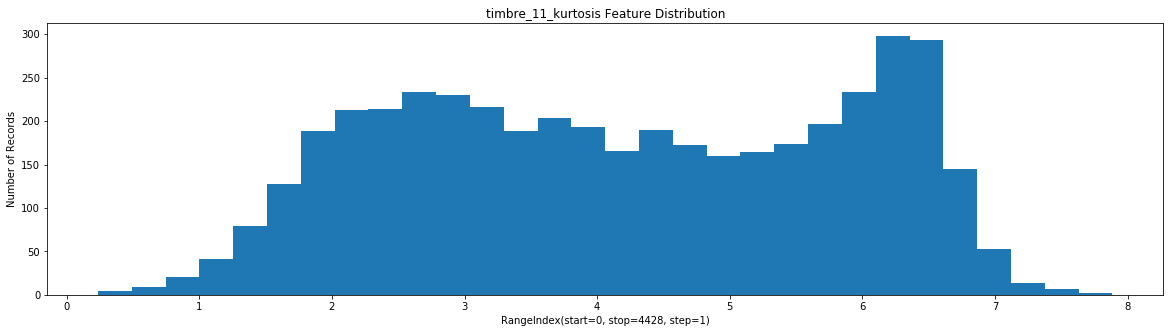

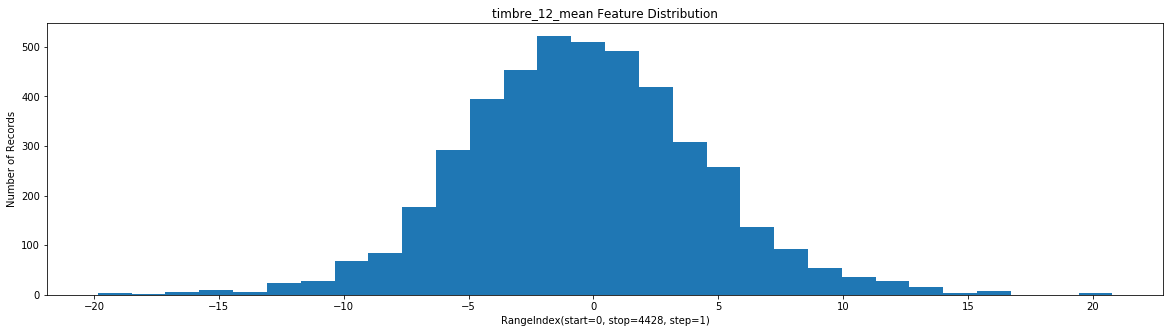

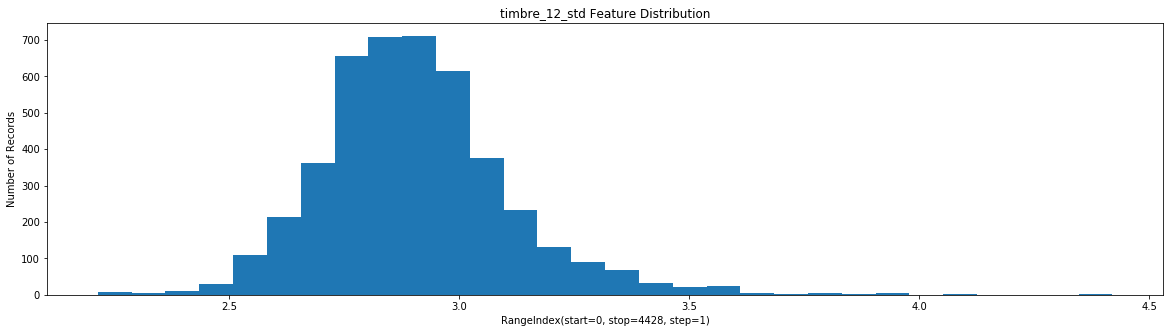

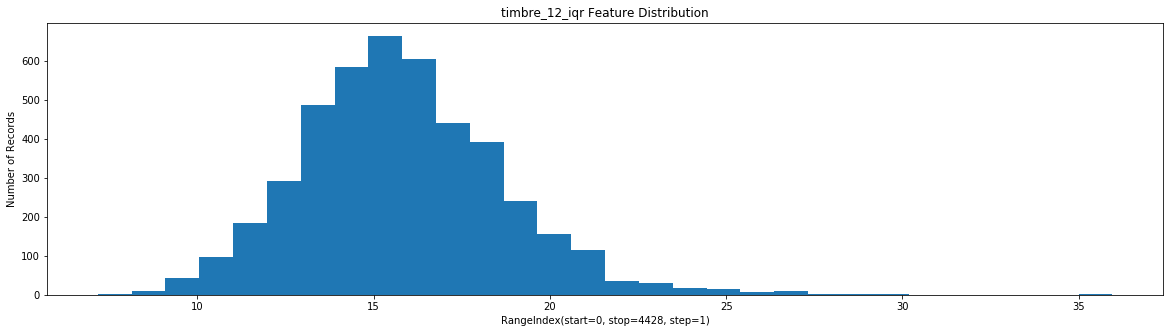

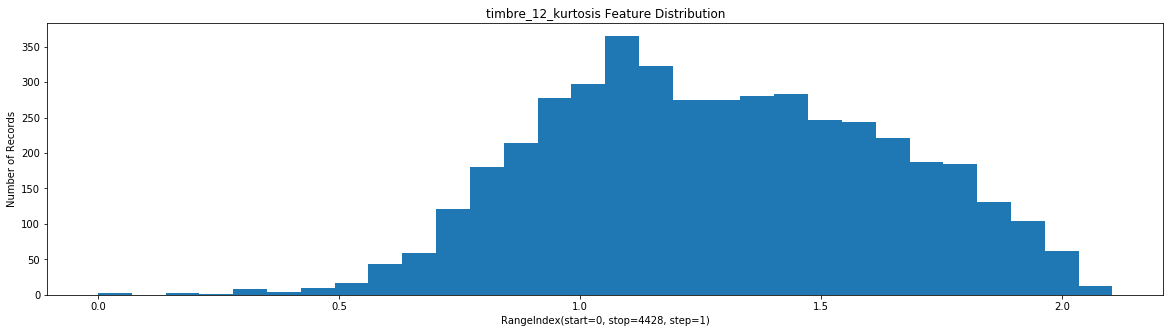

In [430]:
for i in range(0,len(data_for_transformation.columns[:])):
    plt.figure(figsize = (20,5))
    plt.hist(data_for_transformation[data_for_transformation.columns[i]], bins=30)
    plt.xlabel(data_for_transformation.index)
    plt.ylabel("Number of Records")
    plt.title(index[i]+" Feature Distribution")

From above histograms, we are able to see that dataset for training our prediction model are lesser skewed comprared to non-preprocessed dataset.

### Normalizing Data

In addition to performing log transform to skewed data, it is usually good practice to perform scaling to numerical features. In our project, we will use MinMaxScaler. Scaling does not change shape of feature's distribution. 

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_log_minmax_transform = pd.DataFrame(data = data_for_transformation)
data_log_minmax_transform[index] = scaler.fit_transform(data_for_transformation[index])

display(data_log_minmax_transform.head())

track_popularity  artist_popularity  artist_followers  confidence_mean  \
0              0.45               0.55          0.570907         0.270921   
1              0.25               0.62          0.630172         0.434923   
2              0.29               0.49          0.620611         0.356133   
3              0.32               0.55          0.570907         0.360604   
4              0.84               0.90          0.898163         0.667092   

   confidence_std  confidence_kurtosis  loudness_mean  loudness_std  \
0        0.195151             0.079671       0.915698      0.134728   
1        0.338492             0.444265       0.901409      0.452654   
2        0.288788             0.240323       0.947151      0.269175   
3        0.222092             0.085113       0.903786      0.184158   
4        0.263969             0.105665       0.834821      0.478973   

   loudness_kurtosis  tempo_mean         ...          timbre_10_iqr  \
0           0.102953    0.267379         ...               0.548528   
1           0.372978    0.604932         ...               0.297191   
2           0.239352    0.323362         ...               0.388476   
3           0.132079    0.576839         ...               0.320351   
4           0.124263    0.560564         ...               0.423308   

   timbre_10_kurtosis  timbre_11_mean  timbre_11_std  timbre_11_iqr  \
0            0.158997        0.649679       0.345347       0.326992   
1            0.099292        0.723392       0.225517       0.161462   
2            0.665341        0.596931       0.421824       0.232976   
3            0.256172        0.654420       0.272890       0.302033   
4            0.515888        0.593974       0.441420       0.223874   

   timbre_11_kurtosis  timbre_12_mean  timbre_12_std  timbre_12_iqr  \
0            0.215022        0.453163       0.315408       0.428980   
1            0.404934        0.648527       0.364958       0.352143   
2            0.771220        0.557734       0.335692       0.500718   
3            0.416049        0.348773       0.195099       0.166568   
4            0.824608        0.431095       0.257552       0.216359   

   timbre_12_kurtosis  
0            0.003254  
1            0.004260  
2            0.004531  
3            0.017715  
4            0.057075  

[5 rows x 130 columns]

### Shuffle and Split data
Now we will split the data into training and testing set. We will use 80% of data for training and 20% of data for testing.
We will use both preprocessed dataset and non-preprocessed dataset, in order to compare model performance between model using preprocessed dataset and non-preprocessed dataset.

First, we will shuffle and split non-preprocessed dataset

In [9]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the non-preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data1[data1.columns[1:len(index)]], 
                                                    data1['track_popularity'], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3542 samples.
Testing set has 886 samples.


/Users/kibaekjeong/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Next, we will shuffle and split preprocessed dataset

In [7]:
from sklearn.cross_validation import train_test_split

# Split the preprocessed data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_log_minmax_transform[data_log_minmax_transform.columns[1:len(index)]], 
                                                    data1['track_popularity'], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train1.shape[0]))
print("Testing set has {} samples.".format(X_test1.shape[0]))

Training set has 3542 samples.
Testing set has 886 samples.


/Users/kibaekjeong/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Implementation: Training, predict and evaluate model

In order to properly train, predict and evaluate the model, we will be creating a function. We will be implementing various supervised Learning Models. In order to evaluate these models, we will be using Root Mean Square Error, Accuracy score, and R Squared. In the code below, we will be creating a function that 

- Fit the model with training data and record the training time.
- Perform prediction on the test data.
- Calculate Root Mean Square Error (RMSE)
- Calculate R Squared. 

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import fbeta_score
from time import time

def train_predict_evaluate(model, sample_size, X_train,Y_train,X_test,Y_test):
    '''
    Inputs:
        - model: supervised learning algorithm to be trained and predicted
        - sample_size: size of samples that will be drawn from the training dataset
        - X_train: features for training
        - Y_train: track popularity training set
        - X_test: features for testing
        - Y_test: track popularity testing set
    '''
    
    result = {}
    # 1. fit the model 
    start_time = time()
    model = model.fit(X_train[:sample_size],Y_train[:sample_size])
    end_time = time()
    # 2. get time spent for fitting
    result["Training_time"] = end_time - start_time
    # 3. Predict using the model
    start_time = time()
    predict_test = model.predict(X_test)
    predict_train = model.predict(X_train[:200])
    end_time = time()
    # 4. get time spent for predicting
    result["predicting_time"] = end_time - start_time
    # 5. Compute mean squared error 
    result["rmse_train"] = mean_squared_error(Y_train[:200],predict_train)
    result["rmse_test"] = mean_squared_error(Y_test,predict_test)
    # 6. Compute R squared score
    result["R2_train"] = r2_score(Y_train[:200],predict_train)
    result["R2_test"] = r2_score(Y_test,predict_test)
    
    print("Successfully trained {} with {} samples.".format(model.__class__.__name__,sample_size))
    return result

## Implementation: Model Evaluation

Now we will evaluate supervised learning models using train_predict_evaluate function.

In [12]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

clfs = []

clfs.append(LinearRegression())
clfs.append(LogisticRegression())
clfs.append(DecisionTreeRegressor())
clfs.append(RandomForestRegressor())
clfs.append(svm.SVC(kernel = 'sigmoid', gamma = 0.001))

samples = []
samples.append(len(y_train))
samples.append(int(0.5*len(y_train)))
samples.append(int(0.1*len(y_train)))


# First we will run train_predict_evaluate with non preprocessed data
for clf in clfs:
    for sample in samples:
        result = train_predict_evaluate(clf,sample,X_train.values,y_train.values,X_test.values,y_test.values)
        display(result)

Successfully trained LinearRegression with 3542 samples.


/Users/kibaekjeong/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


{'Training_time': 0.02886509895324707,
 'predicting_time': 0.0015978813171386719,
 'rmse_train': 291.00503490165613,
 'rmse_test': 267.4729421643558,
 'R2_train': 0.1476860041651188,
 'R2_test': 0.22642891460593606}

Successfully trained LinearRegression with 1771 samples.


{'Training_time': 0.006978034973144531,
 'predicting_time': 0.0002689361572265625,
 'rmse_train': 274.4211157365262,
 'rmse_test': 277.89342316963763,
 'R2_train': 0.19625803803048236,
 'R2_test': 0.1962913510215386}

Successfully trained LinearRegression with 354 samples.


{'Training_time': 0.003297090530395508,
 'predicting_time': 0.00023818016052246094,
 'rmse_train': 177.82671701748941,
 'rmse_test': 492.1793022152927,
 'R2_train': 0.4791698370490547,
 'R2_test': -0.42345492572936205}

Successfully trained LogisticRegression with 3542 samples.


{'Training_time': 16.792101860046387,
 'predicting_time': 0.003297090530395508,
 'rmse_train': 516.525,
 'rmse_test': 541.196388261851,
 'R2_train': -0.5128311674998673,
 'R2_test': -0.565219547410573}

Successfully trained LogisticRegression with 1771 samples.


{'Training_time': 6.478600025177002,
 'predicting_time': 0.0007719993591308594,
 'rmse_train': 433.975,
 'rmse_test': 488.3893905191874,
 'R2_train': -0.2710534938594549,
 'R2_test': -0.41249394373028436}

Successfully trained LogisticRegression with 354 samples.


{'Training_time': 1.0085508823394775,
 'predicting_time': 0.0007741451263427734,
 'rmse_train': 153.105,
 'rmse_test': 676.7765237020316,
 'R2_train': 0.5515763691978759,
 'R2_test': -0.9573372385745933}

Successfully trained DecisionTreeRegressor with 3542 samples.


{'Training_time': 0.3855710029602051,
 'predicting_time': 0.0014798641204833984,
 'rmse_train': 0.0,
 'rmse_test': 429.14785553047403,
 'R2_train': 1.0,
 'R2_test': -0.24115871202124128}

Successfully trained DecisionTreeRegressor with 1771 samples.


{'Training_time': 0.1921379566192627,
 'predicting_time': 0.0004429817199707031,
 'rmse_train': 0.0,
 'rmse_test': 430.3668171557562,
 'R2_train': 1.0,
 'R2_test': -0.24468412831155062}

Successfully trained DecisionTreeRegressor with 354 samples.


{'Training_time': 0.02963876724243164,
 'predicting_time': 0.0004832744598388672,
 'rmse_train': 0.0,
 'rmse_test': 553.1670428893905,
 'R2_train': 1.0,
 'R2_test': -0.5998404410911498}

Successfully trained RandomForestRegressor with 3542 samples.


{'Training_time': 2.188852071762085,
 'predicting_time': 0.0030829906463623047,
 'rmse_train': 48.028549999999996,
 'rmse_test': 237.44749435665915,
 'R2_train': 0.8593309377671444,
 'R2_test': 0.31326692544207646}

Successfully trained RandomForestRegressor with 1771 samples.


{'Training_time': 0.9645841121673584,
 'predicting_time': 0.0022432804107666016,
 'rmse_train': 44.70015,
 'rmse_test': 252.22423250564333,
 'R2_train': 0.8690793667065114,
 'R2_test': 0.270530425532977}

Successfully trained RandomForestRegressor with 354 samples.


{'Training_time': 0.15394902229309082,
 'predicting_time': 0.0019888877868652344,
 'rmse_train': 60.33134999999999,
 'rmse_test': 300.96835214446946,
 'R2_train': 0.823297717134034,
 'R2_test': 0.12955526284749397}

Successfully trained SVC with 3542 samples.


{'Training_time': 2.491446018218994,
 'predicting_time': 0.7669529914855957,
 'rmse_train': 381.435,
 'rmse_test': 362.3194130925508,
 'R2_train': -0.1171710108422861,
 'R2_test': -0.04788102817936424}

Successfully trained SVC with 1771 samples.


{'Training_time': 0.6567831039428711,
 'predicting_time': 0.3695199489593506,
 'rmse_train': 455.385,
 'rmse_test': 512.9785553047404,
 'R2_train': -0.333760459245781,
 'R2_test': -0.4836094245642504}

Successfully trained SVC with 354 samples.


{'Training_time': 0.04815411567687988,
 'predicting_time': 0.07871699333190918,
 'rmse_train': 395.085,
 'rmse_test': 371.4571106094808,
 'R2_train': -0.15714999624739368,
 'R2_test': -0.07430859325931416}

In [13]:
# Now with preprocessed data
for clf in clfs:
    for sample in samples:
        result = train_predict_evaluate(clf,sample,X_train1.values,y_train1.values,X_test1.values,y_test1.values)
        display(result)

Successfully trained LinearRegression with 3542 samples.


{'Training_time': 0.007873058319091797,
 'predicting_time': 0.0002930164337158203,
 'rmse_train': 288.93768764792696,
 'rmse_test': 260.4853919893801,
 'R2_train': 0.15374098187091556,
 'R2_test': 0.2466379373555342}

Successfully trained LinearRegression with 1771 samples.


{'Training_time': 0.008228302001953125,
 'predicting_time': 0.00037670135498046875,
 'rmse_train': 274.63962664336873,
 'rmse_test': 273.67911237666107,
 'R2_train': 0.19561804943300865,
 'R2_test': 0.20847975762420579}

Successfully trained LinearRegression with 354 samples.


{'Training_time': 0.0031380653381347656,
 'predicting_time': 0.00021767616271972656,
 'rmse_train': 178.92902195963939,
 'rmse_test': 482.20942074728254,
 'R2_train': 0.4759413364487476,
 'R2_test': -0.39462056227543285}

Successfully trained LogisticRegression with 3542 samples.


{'Training_time': 4.302433967590332,
 'predicting_time': 0.0009281635284423828,
 'rmse_train': 514.425,
 'rmse_test': 423.0632054176072,
 'R2_train': -0.5066805543606199,
 'R2_test': -0.2235610090387794}

Successfully trained LogisticRegression with 1771 samples.


{'Training_time': 1.4422872066497803,
 'predicting_time': 0.0009028911590576172,
 'rmse_train': 338.405,
 'rmse_test': 422.1038374717833,
 'R2_train': 0.008857981244291047,
 'R2_test': -0.22078637584733207}

Successfully trained LogisticRegression with 354 samples.


{'Training_time': 0.2062540054321289,
 'predicting_time': 0.0011310577392578125,
 'rmse_train': 248.33,
 'rmse_test': 518.313769751693,
 'R2_train': 0.2726753519670063,
 'R2_test': -0.49903964938304024}

Successfully trained DecisionTreeRegressor with 3542 samples.


{'Training_time': 0.4167499542236328,
 'predicting_time': 0.0006909370422363281,
 'rmse_train': 0.0,
 'rmse_test': 477.4345372460497,
 'R2_train': 1.0,
 'R2_test': -0.38081089695829884}

Successfully trained DecisionTreeRegressor with 1771 samples.


{'Training_time': 0.20054101943969727,
 'predicting_time': 0.000492095947265625,
 'rmse_train': 0.0,
 'rmse_test': 420.05981941309255,
 'R2_train': 1.0,
 'R2_test': -0.21487477501237784}

Successfully trained DecisionTreeRegressor with 354 samples.


{'Training_time': 0.028913259506225586,
 'predicting_time': 0.00042700767517089844,
 'rmse_train': 0.0,
 'rmse_test': 636.3781038374718,
 'R2_train': 1.0,
 'R2_test': -0.8404990670199184}

Successfully trained RandomForestRegressor with 3542 samples.


{'Training_time': 2.337918996810913,
 'predicting_time': 0.0030450820922851562,
 'rmse_train': 45.79715,
 'rmse_test': 226.030237020316,
 'R2_train': 0.8658664035571046,
 'R2_test': 0.34628731276959623}

Successfully trained RandomForestRegressor with 1771 samples.


{'Training_time': 1.0778470039367676,
 'predicting_time': 0.0023202896118164062,
 'rmse_train': 50.80465,
 'rmse_test': 268.6250564334086,
 'R2_train': 0.8512001200833994,
 'R2_test': 0.2230968307009349}

Successfully trained RandomForestRegressor with 354 samples.


{'Training_time': 0.1599106788635254,
 'predicting_time': 0.0020341873168945312,
 'rmse_train': 71.37405000000001,
 'rmse_test': 309.1099661399549,
 'R2_train': 0.7909551572708118,
 'R2_test': 0.10600851780336495}

Successfully trained SVC with 3542 samples.


{'Training_time': 3.168644905090332,
 'predicting_time': 0.8438267707824707,
 'rmse_train': 381.435,
 'rmse_test': 362.3194130925508,
 'R2_train': -0.1171710108422861,
 'R2_test': -0.04788102817936424}

Successfully trained SVC with 1771 samples.


{'Training_time': 0.8082120418548584,
 'predicting_time': 0.41338300704956055,
 'rmse_train': 399.045,
 'rmse_test': 450.8115124153499,
 'R2_train': -0.16874829530997437,
 'R2_test': -0.3038131937584645}

Successfully trained SVC with 354 samples.


{'Training_time': 0.059309959411621094,
 'predicting_time': 0.07873296737670898,
 'rmse_train': 395.085,
 'rmse_test': 371.4571106094808,
 'R2_train': -0.15714999624739368,
 'R2_test': -0.07430859325931416}

Comparing between preprocessed dataset and non-preprocessed dataset, preprocessed dataset did better job with supervised learning.
However, from the above testing, we can see that none of the supervised learning models did well. Root mean square error is too large and R squared score is very low.

As we can see, RMSE score range from 200 to 640, which is too high for practical use.

## Neural Network

Now, we will try neural network to see if it can do better than supervised learning models tried above.

In [41]:
import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Dense(200,activation='sigmoid',input_shape=(129,),kernel_regularizer=regularizers.l2(0.001),
                activity_regularizer=regularizers.l1(0.001)))
model.add(Dense(100,activation = 'softmax'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 200)               26000     
_________________________________________________________________
dense_50 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_51 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1632      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 11        
Total params: 53,123
Trainable params: 53,123
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss=['mean_absolute_error'],optimizer='Nadam',metrics=['mse','mae'])

In [60]:
model.fit(X_train, y_train.values, epochs=100,batch_size = 5, verbose=1)

Epoch 1/100
3542/3542 [==============================] - 1s 395us/step - loss: 16.9766 - mean_squared_error: 486.7449 - mean_absolute_error: 16.7534
Epoch 2/100
3542/3542 [==============================] - 1s 276us/step - loss: 14.9519 - mean_squared_error: 358.7578 - mean_absolute_error: 14.7500
Epoch 3/100
3542/3542 [==============================] - 1s 295us/step - loss: 14.9577 - mean_squared_error: 358.8040 - mean_absolute_error: 14.7203
Epoch 4/100
3542/3542 [==============================] - 1s 281us/step - loss: 14.9380 - mean_squared_error: 357.7655 - mean_absolute_error: 14.7006
Epoch 5/100
3542/3542 [==============================] - 1s 297us/step - loss: 14.9569 - mean_squared_error: 360.0925 - mean_absolute_error: 14.7148
Epoch 6/100
3542/3542 [==============================] - 1s 280us/step - loss: 15.0126 - mean_squared_error: 359.6769 - mean_absolute_error: 14.7011
Epoch 7/100
3542/3542 [==============================] - 1s 298us/step - loss: 15.0188 - mean_squared_erro

In [61]:
score = model.evaluate(X_test.values, y_test.values, verbose=0)
print("RMSE SCORE: ", np.sqrt(score[1]))
print("MAE SCORE: ", score[2])

RMSE SCORE:  18.730848368771547
MAE SCORE:  14.761783892629378


In [43]:
model.fit(X_train1.values, y_train1.values, epochs=100,batch_size = 5, verbose=1)

Epoch 1/100
3542/3542 [==============================] - 2s 502us/step - loss: 16.8724 - mean_squared_error: 477.5252 - mean_absolute_error: 16.6392
Epoch 2/100
3542/3542 [==============================] - 1s 302us/step - loss: 14.1623 - mean_squared_error: 330.1262 - mean_absolute_error: 13.9245
Epoch 3/100
3542/3542 [==============================] - 1s 306us/step - loss: 13.9310 - mean_squared_error: 324.7729 - mean_absolute_error: 13.6846
Epoch 4/100
3542/3542 [==============================] - 1s 319us/step - loss: 13.7324 - mean_squared_error: 319.1491 - mean_absolute_error: 13.4878
Epoch 5/100
3542/3542 [==============================] - 1s 323us/step - loss: 13.6092 - mean_squared_error: 314.8312 - mean_absolute_error: 13.3636
Epoch 6/100
3542/3542 [==============================] - 1s 327us/step - loss: 13.5447 - mean_squared_error: 314.1405 - mean_absolute_error: 13.3002
Epoch 7/100
3542/3542 [==============================] - 1s 313us/step - loss: 13.4343 - mean_squared_erro

3542/3542 [==============================] - 1s 310us/step - loss: 12.7541 - mean_squared_error: 295.9122 - mean_absolute_error: 12.6031
Epoch 56/100
3542/3542 [==============================] - 1s 307us/step - loss: 12.6724 - mean_squared_error: 294.2266 - mean_absolute_error: 12.5205
Epoch 57/100
3542/3542 [==============================] - 1s 319us/step - loss: 12.5957 - mean_squared_error: 292.0955 - mean_absolute_error: 12.4425
Epoch 58/100
3542/3542 [==============================] - 1s 308us/step - loss: 12.6774 - mean_squared_error: 293.2944 - mean_absolute_error: 12.5230
Epoch 59/100
3542/3542 [==============================] - 1s 307us/step - loss: 12.6160 - mean_squared_error: 291.9098 - mean_absolute_error: 12.4609
Epoch 60/100
3542/3542 [==============================] - 1s 307us/step - loss: 12.6057 - mean_squared_error: 292.8872 - mean_absolute_error: 12.4497
Epoch 61/100
3542/3542 [==============================] - 1s 311us/step - loss: 12.6922 - mean_squared_error: 295

In [21]:
score = model.evaluate(X_test1.values, y_test1, verbose=0)
print("RMSE SCORE: ", np.sqrt(score[1]))
print("MAE SCORE: ", score[2])

RMSE SCORE:  16.161407072024993
MAE SCORE:  12.14630157307093


From above, we have tried neural network with both processed and non processed dataset. Both performed much better than supervised learning models, but preprocessed dataset did better job. 
Root mean square error is near 17. Also as track popularity has range from 0 to 100, RMSE of 17 to 19 shows that neural network is performing much better than supervised learning models. Therefore, we will choose neural network with non-preprocessed dataset as our final model.

### Feature Importance
As we have chosen our final model, we will explore feature importance. Keras does not have built-in feature importance function. Therefore, we will utilize eli5 for extracting feature importance. 

In [50]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
    model = Sequential()
    model.add(Dense(200,activation='sigmoid',input_shape=(129,),kernel_regularizer=regularizers.l2(0.001),
                    activity_regularizer=regularizers.l1(0.001)))
    model.add(Dense(100,activation = 'softmax'))
    model.add(Dense(50,activation = 'relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(1,activation='relu'))
    model.compile(loss=['mean_absolute_error'],optimizer='Nadam',metrics=['mse','mae'])
    model.fit(X_train1.values, y_train1.values, epochs=100,batch_size = 5, verbose=1)
    return model


my_model = KerasRegressor(build_fn=base_model)    
my_model.fit(X_train1,y_train1)

perm = PermutationImportance(my_model, random_state=1).fit(X_train1,y_train1)
eli5.show_weights(perm, feature_names = X_train1.columns.tolist())

Epoch 1/100
3542/3542 [==============================] - 2s 637us/step - loss: 16.7516 - mean_squared_error: 476.0132 - mean_absolute_error: 16.5237
Epoch 2/100
3542/3542 [==============================] - 1s 353us/step - loss: 14.1880 - mean_squared_error: 330.4924 - mean_absolute_error: 13.9485
Epoch 3/100
3542/3542 [==============================] - 1s 337us/step - loss: 13.9245 - mean_squared_error: 324.5832 - mean_absolute_error: 13.6752
Epoch 4/100
3542/3542 [==============================] - 1s 344us/step - loss: 13.7558 - mean_squared_error: 321.0762 - mean_absolute_error: 13.5013
Epoch 5/100
3542/3542 [==============================] - 1s 362us/step - loss: 13.6278 - mean_squared_error: 316.0604 - mean_absolute_error: 13.3742
Epoch 6/100
3542/3542 [==============================] - 1s 362us/step - loss: 13.5639 - mean_squared_error: 315.2713 - mean_absolute_error: 13.3145
Epoch 7/100
3542/3542 [==============================] - 1s 337us/step - loss: 13.4693 - mean_squared_erro

3542/3542 [==============================] - 1s 340us/step - loss: 12.6912 - mean_squared_error: 291.9462 - mean_absolute_error: 12.5152
Epoch 56/100
3542/3542 [==============================] - 1s 329us/step - loss: 12.7293 - mean_squared_error: 294.4435 - mean_absolute_error: 12.5530
Epoch 57/100
3542/3542 [==============================] - 1s 331us/step - loss: 12.7948 - mean_squared_error: 297.3669 - mean_absolute_error: 12.6180
Epoch 58/100
3542/3542 [==============================] - 1s 337us/step - loss: 12.6814 - mean_squared_error: 294.3918 - mean_absolute_error: 12.5050
Epoch 59/100
3542/3542 [==============================] - 1s 335us/step - loss: 12.6963 - mean_squared_error: 292.8440 - mean_absolute_error: 12.5185
Epoch 60/100
3542/3542 [==============================] - 1s 335us/step - loss: 12.6293 - mean_squared_error: 293.8751 - mean_absolute_error: 12.4520
Epoch 61/100
3542/3542 [==============================] - 1s 334us/step - loss: 12.6304 - mean_squared_error: 290

3542/3542 [==============================] - 0s 23us/step


3542/3542 [==============================] - 0s 23us/step


3542/3542 [==============================] - 0s 21us/step


3542/3542 [==============================] - 0s 22us/step


3542/3542 [==============================] - 0s 23us/step


As a result, we are able to conclude that artist popularity is biggest factor for a song to be popular. Another major factors are timbre. Out of top 20 important features, 14features are related to timbre. This indicates that timbre greatly affects track popularity. As mentioned before, timbre represents quality of sound or musical note. Mentioned from Spotify that 'It is a complex notion also reffered to as sound color, texture, or tone quality, and is derived from the shape of a segment's specgtro-temporal surface, independently of pitch and loudness.' 

## Final Model

In our final model, we will have to get a audio data for a single song, and predict its popularity. We will get audio data from spotify, preprocess with log transformation and MinMax scaling, and predict song popularity with our neural network model.

In [17]:
# Get song information from spotify
from get_song_info import get_song_info
info = get_song_info("7hXMQWqdm29g8Lu7Dbhczi")

In [18]:
info0 = {k:v for k,v in info[0].items()}

In [45]:
info_for_prediction = pd.DataFrame(((v) for k,v in info[0].items()),index = info0.keys()).T
info_for_prediction = info_for_prediction[info_for_prediction.columns[5:-1]]

In [66]:
display(info_for_prediction)

artist_popularity  artist_followers confidence_mean confidence_std  \
0                64         11.507953        0.638972       0.357348   

   confidence_kurtosis loudness_mean  loudness_std  loudness_kurtosis  \
0             0.773126      -10.1359      1.371414            0.18915   

  tempo_mean tempo_std         ...          timbre_10_iqr timbre_10_kurtosis  \
0     139.26   26.9082         ...                21.2778           6.034494   

  timbre_11_mean timbre_11_std timbre_11_iqr timbre_11_kurtosis  \
0       -7.38184      4.047953       13.8814            6.19714   

   timbre_12_mean timbre_12_std timbre_12_iqr  timbre_12_kurtosis  
0         1.40667      2.706219       15.0356            1.758164  

[1 rows x 129 columns]

Preprocess the data.

In [47]:
#Log transformation with constants saved.
for k,v in info_for_prediction.items():
    if k in transformation_constants.keys():
        info_for_prediction[k]=info_for_prediction[k].apply(lambda x: np.log(x+abs(transformation_constants[k])+1))

In [48]:
display(info_for_prediction[index_for_prediction])

artist_popularity  artist_followers confidence_mean confidence_std  \
0                64         11.507953        0.638972       0.357348   

   confidence_kurtosis loudness_mean  loudness_std  loudness_kurtosis  \
0             0.773126      -10.1359      1.371414            0.18915   

  tempo_mean tempo_std         ...          timbre_10_iqr timbre_10_kurtosis  \
0     139.26   26.9082         ...                21.2778           6.034494   

  timbre_11_mean timbre_11_std timbre_11_iqr timbre_11_kurtosis  \
0       -7.38184      4.047953       13.8814            6.19714   

   timbre_12_mean timbre_12_std timbre_12_iqr  timbre_12_kurtosis  
0         1.40667      2.706219       15.0356            1.758164  

[1 rows x 129 columns]

In [53]:
index_for_prediction = index[1:]
dataset_for_prediction=data_for_transformation[index_for_prediction]
dataset_for_prediction=dataset_for_prediction.append(info_for_prediction)


In [55]:
# Perform MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
info_log_minmax_transform = pd.DataFrame(data = dataset_for_prediction)
info_log_minmax_transform[index_for_prediction] = scaler.fit_transform(dataset_for_prediction[index_for_prediction])

In [57]:
display(info_log_minmax_transform.tail(1))

artist_popularity  artist_followers  confidence_mean  confidence_std  \
0               0.64          0.580809         0.578898        0.269053   

   confidence_kurtosis  loudness_mean  loudness_std  loudness_kurtosis  \
0             0.240075       0.729788      0.337124           0.112026   

   tempo_mean  tempo_std         ...          timbre_10_iqr  \
0    0.544417    0.12752         ...               0.461024   

   timbre_10_kurtosis  timbre_11_mean  timbre_11_std  timbre_11_iqr  \
0            0.758681        0.800591       0.564382        0.12794   

   timbre_11_kurtosis  timbre_12_mean  timbre_12_std  timbre_12_iqr  \
0            0.779227        0.523083       0.222894       0.273066   

   timbre_12_kurtosis  
0            0.001374  

[1 rows x 129 columns]

In [1]:
# Predict song popularity
predicted_track_popularity = model.predict(info_log_minmax_transform.tail(1))

NameError: name 'model' is not defined

In [71]:
print("Predicted Track Popularity is : " + str(predicted_track_popularity[0][0]) +"/100")

Predicted Track Popularity is : 53.029007/100
